In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.matlib
import numpy as np
from numpy import median
import scipy.stats as stats
import re
import sys
from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)
from IPython.display import display


big = pd.read_csv('TAG Data.csv')

## Drop "Feature" and "Confidence Level" columns

In [ ]:
df = pd.read_csv("Mega Large Merge.csv")

df = df.drop(columns = {"Feature", "Confidence Level", "IB"})

df

## Log Based plotting

AxesSubplot(0.125,0.125;0.775x0.755)


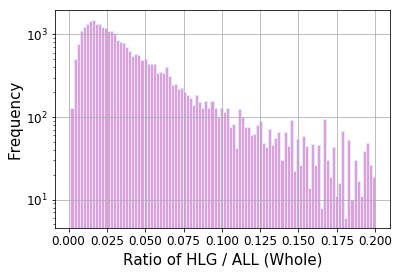

In [3]:
big = big[['IB' , 'gene' , 'R5-S#11-HLG_WHOLE_normalized_reads' , 'R5-S#11-ALL_WHOLE_normalized_reads']]
big ['Ratios: HLG / ALL (Whole)'] = big ['R5-S#11-HLG_WHOLE_normalized_reads'] / big['R5-S#11-ALL_WHOLE_normalized_reads']

# ~ 0 for not enriched
filter = big['Ratios: HLG / ALL (Whole)'] > 0
filter1 = big ['Ratios: HLG / ALL (Whole)'] <= 0.2
big.where(filter & filter1, inplace = True)

big = big.dropna()

histo = big['Ratios: HLG / ALL (Whole)'].hist(bins = 100, color = 'plum', edgecolor = 'lavender', grid = True, xlabelsize = 12, ylabelsize = 12, log = True)
plt.xlabel("Ratio of HLG / ALL (Whole)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

print histo


## Number of rows with a ratio between 0 and 0.2

In [4]:
big['gene'].count()

31329

## Number of unique values in the 'gene' column with a ratio between 0 and 0.2

In [5]:
big['gene'].nunique()

11504

## Time to go Fishing

In [9]:
matrix = df.to_numpy()

oarfish = pd.DataFrame(matrix, columns = ["Gene", "Ratio Median", 
                                          "Ratio Mean", "GO Term", 
                                          "Description"])
oarfish = oarfish.drop_duplicates()
# oarfish.reset_index(drop = True)

## Type of Ratio

In [17]:
data = pd.read_csv('TAG Data.csv')

data = data[['IB' , 'gene' , 'R5-S#11-HLG_WHOLE_normalized_reads' , 'R5-S#11-ALL_WHOLE_normalized_reads']]
data ['Ratios: HLG / ALL (Whole)'] = data ['R5-S#11-HLG_WHOLE_normalized_reads'] / data['R5-S#11-ALL_WHOLE_normalized_reads']

data = data.sort_values('gene')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.drop(columns = {"R5-S#11-HLG_WHOLE_normalized_reads", 
                            "R5-S#11-ALL_WHOLE_normalized_reads"})

data["Type of Ratio"] = np.where(data["Ratios: HLG / ALL (Whole)"] > 1, 
                                 "Hit", "Non-Hit")
data = data.sort_values("gene")
data = data.reset_index(drop = True)
data = data.replace(['unknown_chrom', 'no_gene_found', 
                     'gene_unknown'], np.nan)
data = data.dropna()

data

,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
0,GAACCCTGGAAATTGCGTCAAT,Cre01.g000017,1.017794,Hit
1,ACGGGGCCTGGGTCGAGATAAC,Cre01.g000017,0.003728,Non-Hit
2,AGGTAGGCACTCATAAGGCGCA,Cre01.g000017,0.063911,Non-Hit
3,GCGTCGCGCTACCTCGTCGTAC,Cre01.g000017,0.000000,Non-Hit
4,GGGGGGCAATTAGACCTCATTA,Cre01.g000017,0.000000,Non-Hit
5,CGGACCGGACTACTTGGAGGAA,Cre01.g000033,0.000000,Non-Hit
6,CGGACATAGACGGCCGACGAG,Cre01.g000050,0.000000,Non-Hit
7,TGGGTATCTATGGCTACAGAGT,Cre01.g000050,0.020298,Non-Hit
8,GACAAATCTGTTTTCACAGACA,Cre01.g000050,3.203204,Hit
9,CACCCGGTTTCAATCGGGCTAG,Cre01.g000100,0.000000,Non-Hit


## For unknown genes

In [8]:
unknown = data[data.gene.eq("unknown_chrom") | 
               data.gene.eq("no_gene_found") | 
               data.gene.eq("gene_unknown")]

unknown = unknown.reset_index(drop = True)

# unknown

## Iterate though entire dataframe to make dataframes for each unique gene

In [ ]:
# sep = (list(data.groupby('gene')))
# sep = data.groupby(['gene']).nunique()
# new = pd.DataFrame(list(sep), columns = ['IB', 'gene', "Ratios: HLG / ALL (Whole)",
#                                          "Type of Ratio"], index = True)

for gene,data_gene in data.groupby('gene'):
    display(data_gene)

,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
0,GAACCCTGGAAATTGCGTCAAT,Cre01.g000017,1.017794,Hit
1,ACGGGGCCTGGGTCGAGATAAC,Cre01.g000017,0.003728,Non-Hit
2,AGGTAGGCACTCATAAGGCGCA,Cre01.g000017,0.063911,Non-Hit
3,GCGTCGCGCTACCTCGTCGTAC,Cre01.g000017,0.000000,Non-Hit
4,GGGGGGCAATTAGACCTCATTA,Cre01.g000017,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
5,CGGACCGGACTACTTGGAGGAA,Cre01.g000033,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
6,CGGACATAGACGGCCGACGAG,Cre01.g000050,0.000000,Non-Hit
7,TGGGTATCTATGGCTACAGAGT,Cre01.g000050,0.020298,Non-Hit
8,GACAAATCTGTTTTCACAGACA,Cre01.g000050,3.203204,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
9,CACCCGGTTTCAATCGGGCTAG,Cre01.g000100,0.00000,Non-Hit
10,CTTGGGCGTTGTTCCCCTTACG,Cre01.g000100,0.00000,Non-Hit
11,TTAGTAATGCTCACAACTATGT,Cre01.g000100,0.00000,Non-Hit
12,GGGTCGGCACGTCGATGCCACA,Cre01.g000100,0.11632,Non-Hit
13,GCGTTAATGTGGGGGGGCATCGA,Cre01.g000100,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
14,GCAGTCTTGAGTTGTTAGACGT,Cre01.g000150,0.027064,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
15,TGGGACTAGCGCCGGGGTTCGG,Cre01.g000200,0.000000,Non-Hit
16,TTCTTATGCCATGAGATTCAAT,Cre01.g000200,1.050425,Hit
17,GTGTTTGGCTACGTGCGGACT,Cre01.g000200,2.340621,Hit
18,CTCCCGTGAACTCGCAGCCGGG,Cre01.g000200,0.006204,Non-Hit
19,GTTCCGGAACGGAAGGTACGCG,Cre01.g000200,0.000000,Non-Hit
20,GAGTGTCGGGCAATTAGTACGG,Cre01.g000200,3.419015,Hit
21,TAACTTGCTGTACCGGGTTAAT,Cre01.g000200,182.691724,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
22,GGGCGGTTGGTGGCGTCGACAT,Cre01.g000250,4.136515,Hit
23,TTTACGGTACATGAGTTGCAGG,Cre01.g000250,5.741446,Hit
24,TCGGACTCAGCCCGTGGCCAAG,Cre01.g000250,0.000000,Non-Hit
25,CTCTCGATCCGCAGGTAAGGCT,Cre01.g000250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
26,AGCCGAAATCAGGCGTCTCCAC,Cre01.g000250 & Cre01.g000300,0.042484,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
27,ATTTAGTGCTCGGCTTACCAGT,Cre01.g000300,0.014498,Non-Hit
28,CCGCTCGGACAAGCAGAACCGG,Cre01.g000300,274.502813,Hit
29,GGCCCCACGGACTGGCCCGGCA,Cre01.g000300,0.000000,Non-Hit
30,CAGTGGGGCATGCATCCCCTCA,Cre01.g000300,0.000000,Non-Hit
31,GGACACGGCGCCGGCTTTCGGC,Cre01.g000300,0.000000,Non-Hit
32,TGTTCATCGATTCCGCTAGCGT,Cre01.g000300,0.098746,Non-Hit
33,TTGTGGCCTGGGGACTTTAGGT,Cre01.g000300,1.256344,Hit
34,CTTAGGCCCTCATGCGGCCTCG,Cre01.g000300,0.000000,Non-Hit
35,AGTCGTCCGCGGGATTCGATAT,Cre01.g000300,0.000000,Non-Hit
36,TCTTGGCCAATACACAACGGTG,Cre01.g000300,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
44,ACAGGATTAAGTAAACTTATCT,Cre01.g000350,0.000000,Non-Hit
45,AGGTGTCGCGTCAGGGCGTTAA,Cre01.g000350,0.000000,Non-Hit
46,CTCCGGACAGTGCAGGTGCGAA,Cre01.g000350,0.041519,Non-Hit
47,CTATAAAGGGCGTAAGCGGGCT,Cre01.g000350,337.312704,Hit
48,GAATTGACACCGAGGCGTGGAA,Cre01.g000350,0.018175,Non-Hit
49,GACTCCCTTTCACGATTAAGCT,Cre01.g000350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
50,ACGTTGATCATCCTCGAACTCT,Cre01.g000400,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
51,CCCAGCGATTGACTAAGTCCAG,Cre01.g000450,467.690621,Hit
52,GGCGGGCAAAAACCGTGAGTGC,Cre01.g000450,0.000000,Non-Hit
53,CGTATGGGGCCGCCAAGTCCCC,Cre01.g000450,0.158618,Non-Hit
54,GGGATATGCTACTCAGTGTAGG,Cre01.g000450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
55,TGGTTTTAAAGTCTTTCATTTC,Cre01.g000500,0.014161,Non-Hit
56,GAGGTCCTGGATGCTCCCCGAA,Cre01.g000500,0.000000,Non-Hit
57,TCCTACGCGCCCCGGAGATTTC,Cre01.g000500,0.000000,Non-Hit
58,CTGGGGTATTGGCAGCCAGCAA,Cre01.g000500,2.455629,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
59,TGTATAGGTTCTTGGAACGCAC,Cre01.g000550,3.653793,Hit
60,GGATCTGGTTTCGAGGTAGTAC,Cre01.g000550,0.000000,Non-Hit
61,CCAAGTCGGCCTATGAGCCGTG,Cre01.g000550,3.397258,Hit
62,TTATAAATTGGCGTACAGGGGG,Cre01.g000550,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
63,TATGCAGGTCCTGGTGGGACG,Cre01.g000600,0.035249,Non-Hit
64,TCGGGGATCTATTGTGGGGACT,Cre01.g000600,0.000000,Non-Hit
65,CAGACCGGCAGAAGGCGCTCTA,Cre01.g000600,0.000000,Non-Hit
66,GATGATGTCTATATATGGCGAG,Cre01.g000600,2.855105,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
67,CCCCGACAAAGCTAGTAGGACA,Cre01.g000650,0.009123,Non-Hit
68,ATGGCGCTGGTCGATACGGCGT,Cre01.g000650,0.028721,Non-Hit
69,CAGCGATAGCCGTCGTGACCCG,Cre01.g000650,0.456701,Non-Hit
70,CCGTTCACCTGTTAACCCGGAG,Cre01.g000650,0.041052,Non-Hit
71,ATGATGTAGCAGCAAGCCCCGT,Cre01.g000650,0.000000,Non-Hit
72,GTGCAAATTATATCTTGGGGTA,Cre01.g000650,5.031257,Hit
73,CTTATCTCCAGTGTCGTCATGC,Cre01.g000650,244.806759,Hit
74,ACAACATGCGCAAAGTAGATAA,Cre01.g000650,0.000000,Non-Hit
75,CCGTTTTAATCGGCTTGTATTG,Cre01.g000650,1.475077,Hit
76,AACGCCCCCCAGATATAGGGGA,Cre01.g000650,0.011992,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
78,TTCTGTCAACGGGCGCGGTAAA,Cre01.g000700,0.012244,Non-Hit
79,TATAGCGTAGAGCCTTATTGGA,Cre01.g000700,0.030196,Non-Hit
80,AACGAATACGTGGGTATCCGTC,Cre01.g000700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
81,CTCCTCGTAGGCTCATCTTACA,Cre01.g000700 & Cre01.g000750,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
82,GACCACGGTTTTCCCAGGAGAC,Cre01.g000750,8.038040,Hit
83,GGTGCTGCGGGCGACAGATACG,Cre01.g000750,0.000000,Non-Hit
84,CAAGGATGACCGTTGGCATAGA,Cre01.g000750,0.608938,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
85,GCGCCAGACCCGACGAGTATGT,Cre01.g000750 & Cre01.g000800,0.070497,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
86,GGACAGACACAATGGGGCGGGG,Cre01.g000800,0.0,Non-Hit
87,CCGCTTTAGATGGCTCTTACAC,Cre01.g000800,0.0,Non-Hit
88,ACATGGCTCGATTTGGTGGTGC,Cre01.g000800,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
89,GACGCTATATGGTGCAGTTATC,Cre01.g000850,0.0,Non-Hit
90,GTGGTCGGACGTACCATTTGCG,Cre01.g000850,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
91,CAGGTCTGTGCATTGCGCACTA,Cre01.g000900,0.0,Non-Hit
92,TAGGCGCCCCGTCTGACCGGCC,Cre01.g000900,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
93,GTTTAGATATATCCGGCGAGAA,Cre01.g000900 & Cre01.g000950,0.000000,Non-Hit
94,GGGCAAGAACGATGTGAGTTGA,Cre01.g000900 & Cre01.g000950,2.336771,Hit
95,AAATTCTAGAGCTTTTTCAGGA,Cre01.g000900 & Cre01.g000950,3.301964,Hit
96,TTTGTGACTTGAGCTCGTAGCT,Cre01.g000900 & Cre01.g000950,0.050050,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
97,GCTCTGAGTAATCGCATGCTTA,Cre01.g000950,0.000000,Non-Hit
98,CCGGCGGACTAGCCATGACTAG,Cre01.g000950,2.125547,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
99,GCTAACTTCTATTGGGTCTGCC,Cre01.g001000,0.013999,Non-Hit
100,CGACAACCAACCTGAGAATTTG,Cre01.g001000,5.464731,Hit
101,CTTTGGGTTTACCGCAGCTCCC,Cre01.g001000,0.000000,Non-Hit
102,CTTTCGATATTATACTTTCGGC,Cre01.g001000,2.258620,Hit
103,GTTGCGTGGAGCGAGAACTCAC,Cre01.g001000,0.000000,Non-Hit
104,CACCGGGAGTGTTTGCTGAAGT,Cre01.g001000,0.017153,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
105,CGGGGAGCCGGTGCAGCCTAGC,Cre01.g001000 & Cre01.g001100,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
106,GGCATCGGCCGTTTGCGTCCCT,Cre01.g001100,2.387607,Hit
107,GAAAGGCCCGCCAATGCCTACT,Cre01.g001100,4.193827,Hit
108,ATTGGGCGTATTGATCGAATCT,Cre01.g001100,0.051130,Non-Hit
109,GAGTATTCAAGACTATAGCCCT,Cre01.g001100,0.267341,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
110,CCCCTCAATGTGGGGAGCTCTC,Cre01.g001150,1.279512,Hit
111,TTCTCTTGACATGGTGGACTGT,Cre01.g001150,0.000000,Non-Hit
112,AACGACTCCGTATATCTCCCT,Cre01.g001150,0.031771,Non-Hit
113,CGGTACAGGCGGTTCTCGGCGC,Cre01.g001150,0.000000,Non-Hit
114,CCTTGGTAGTCGTGGGGGGCTG,Cre01.g001150,0.019884,Non-Hit
115,GAGTTTGGAAACTGTCAGGAGA,Cre01.g001150,0.563972,Non-Hit
116,CCGGTGGCACGGGAAGCAAGAG,Cre01.g001150,8.620088,Hit
117,GGTAGAGGATTGGGACCCCCAC,Cre01.g001150,0.761178,Non-Hit
118,GTCCAGGGTGCGGGCGGTCCTA,Cre01.g001150,0.000000,Non-Hit
119,TCGACCTGGAACATGACCTCTT,Cre01.g001150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
124,GGGGGCGTATTGGGTCCAGTCA,Cre01.g001200,0.004199,Non-Hit
125,TAAGTAATCGCATATCAGCATC,Cre01.g001200,0.742149,Non-Hit
126,GGTATGCGGGGAACCAAGGTGT,Cre01.g001200,0.030213,Non-Hit
127,GCACCGGCATGAGTTCTTTGCG,Cre01.g001200,0.000000,Non-Hit
128,GTGTCTGTCAGACTGCCGTTAC,Cre01.g001200,12.403174,Hit
129,ATTCGCCGGGTCCTTCGGCACC,Cre01.g001200,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
130,CGACCCCGAGGGCAACGAGAGT,Cre01.g001200 & Cre01.g001250,0.017169,Non-Hit
131,TGAGGTACAATCGATTGGCCGC,Cre01.g001200 & Cre01.g001250,0.913417,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
132,GGTTCAATACTCGCCGCCTATT,Cre01.g001250,3.928158,Hit
133,CTTCCACGGGTCGTTACGGGTA,Cre01.g001250,0.000000,Non-Hit
134,GTACAATCTGGTGAGTGCCCGC,Cre01.g001250,0.016095,Non-Hit
135,CGTCTGTTTCTCTAACGTACTA,Cre01.g001250,0.011599,Non-Hit
136,CACGTTGACGAACCGGCCACGG,Cre01.g001250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
137,CTCGGTGCTTATGCGCAGATGA,Cre01.g001250 & Cre01.g001300,0.027531,Non-Hit
138,CGACCTGTCGATACGGAGTGTG,Cre01.g001250 & Cre01.g001300,0.027266,Non-Hit
139,CGCCTCCCTTTGTCCGACCACC,Cre01.g001250 & Cre01.g001300,0.121787,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
140,AACGGCGAGGGCGTGTTGATGC,Cre01.g001300,0.014498,Non-Hit
141,GTAGCGGGCCCCCATGCAGGAG,Cre01.g001300,0.000000,Non-Hit
142,CGGTATGGTCGTTTTCGGGCACA,Cre01.g001300,0.000000,Non-Hit
143,GTGGACGTAGGTCCCTACCGTC,Cre01.g001300,0.000000,Non-Hit
144,AGGCGGGGGCGCGCTGGCAGTG,Cre01.g001300,0.116320,Non-Hit
145,TAGAGTTGGCCAATTCTTTATC,Cre01.g001300,1.418895,Hit
146,GGATATTAAACCCCGGTTGCCT,Cre01.g001300,3.971360,Hit
147,TTGCATTTGCTCAGCGGATATC,Cre01.g001300,0.000000,Non-Hit
148,TCCGGATGAGTATCTTCGTATA,Cre01.g001300,0.000000,Non-Hit
149,AGTGGTGGCATTAGGACACCAT,Cre01.g001300,10.407365,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
158,ATCGCGGTACATGCCGGGATAG,Cre01.g001300 & Cre01.g001350,21.681933,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
159,GACTTTCATCGTGAGTTGGGAG,Cre01.g001350,0.024037,Non-Hit
160,ACGTCGTGTCGGTCGGGGTAT,Cre01.g001350,0.018177,Non-Hit
161,GGGCTGTGAATAATAGAGAGTA,Cre01.g001350,0.018833,Non-Hit
162,GAGCAGCGTTAGTCTGTCCCCC,Cre01.g001350,0.000000,Non-Hit
163,TCTCAGAGCTGCTCCTCCCGTG,Cre01.g001350,0.000000,Non-Hit
164,GCTATGTATACACTGGTCACGT,Cre01.g001350,0.000000,Non-Hit
165,GCGTGGGCCTTGTGATTAGGCG,Cre01.g001350,0.000000,Non-Hit
166,CTGGCGGCACGTCCGCCGCTGC,Cre01.g001350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
167,GCAAGGGTAGGGACAGAGTCGT,Cre01.g001400,3.762289,Hit
168,GCGGGCCGTAATCGTGCTGCCA,Cre01.g001400,0.000000,Non-Hit
169,GAAGTATACGAAAAGAATGAGC,Cre01.g001400,0.000000,Non-Hit
170,GAGTGGCGAGTGGCCTCGCGCG,Cre01.g001400,0.048977,Non-Hit
171,TCTGAATTTCAAACTTGTCTTG,Cre01.g001400,0.066431,Non-Hit
172,TACTTAGCTTGAGGTCGGGATC,Cre01.g001400,0.000000,Non-Hit
173,TGTATTTTGTCACGGACGTATT,Cre01.g001400,0.038059,Non-Hit
174,GCAATCATCAGCGTGTGGGGAA,Cre01.g001400,0.000000,Non-Hit
175,GAGGCGGGGCCAAGCAGCTTCG,Cre01.g001400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
176,GGGCTGGCAGGTATCGGCTTAT,Cre01.g001400 & Cre01.g001450,0.077738,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
177,AGTCCAAGTGTCGGCGAAACGG,Cre01.g001450,0.087789,Non-Hit
178,GCGACGCCGGGCCAAGATTATC,Cre01.g001450,0.018175,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
179,AGATATTGTCGTGCGCTAAATT,Cre01.g001501,0.056209,Non-Hit
180,CTTATACGAAGCGCCTACGCAA,Cre01.g001501,5.515388,Hit
181,CGACGCGCGTCATCTATGACGC,Cre01.g001501,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
182,CCGCGTCGATGTTACGGGGCCA,Cre01.g001550,0.00000,Non-Hit
183,CATCGTGATTAATTACGTCGTC,Cre01.g001550,2.86561,Hit
184,CCGGCACTTCGAAGCAGGCGAT,Cre01.g001550,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
185,CCCCGCAAAGAACCAGTCTAGC,Cre01.g001550 & Cre01.g001600,0.055769,Non-Hit
186,AGATGGGGTCGTCCAGTTGCAA,Cre01.g001550 & Cre01.g001600,0.000000,Non-Hit
187,TCCATAATCCCTTGTATGTCG,Cre01.g001550 & Cre01.g001600,85.859182,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
188,CAGAGATAGGATCCTGACTAA,Cre01.g001600,0.405958,Non-Hit
189,TGGCACGATTACGGGGATGGCA,Cre01.g001600,2.104827,Hit
190,GGTAAAACGTGCCATGCGTTTA,Cre01.g001600,10.755128,Hit
191,CGCCCATCAACGAACCCGGGG,Cre01.g001600,0.000000,Non-Hit
192,GCTGAGGACGCAGGACTAGATA,Cre01.g001600,0.004253,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
193,AAGGCGAGTCTGGGCCCAGAAT,Cre01.g001600 & Cre01.g001650,0.021246,Non-Hit
194,TATCCGTACAAATCAGTGTCTC,Cre01.g001600 & Cre01.g001650,0.043688,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
195,TCCCACATTGCCCTTCGGGCAG,Cre01.g001650,0.000000,Non-Hit
196,GAGAATGAGTGCGGGGGGTCGC,Cre01.g001650,15.882207,Hit
197,GCGGCGTAGTCTCAGTTGCATG,Cre01.g001650,0.000000,Non-Hit
198,GCAGATTTTGGATTCATACCA,Cre01.g001650,0.922640,Non-Hit
199,GCTTTCCTTCACGCGATGTTTT,Cre01.g001650,0.000000,Non-Hit
200,TGATAGGGACTTGTAGGTCACT,Cre01.g001650,0.063542,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
201,TTTATACCGTGTTACTATCGGT,Cre01.g001657,85.859182,Hit
202,AGCAGATAGCTCATACGCTGAT,Cre01.g001657,0.000000,Non-Hit
203,AAGATACCAGCACCCCCGTGCT,Cre01.g001657,0.034146,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
204,GAAGGGTCACGACCTTCGACAG,Cre01.g001657 & Cre01.g001664,0.010248,Non-Hit
205,GCCCTTCTGGATCGGTCAGCCG,Cre01.g001657 & Cre01.g001664,125.619964,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
206,TCCAAAACGTTTCTGAGGTGCC,Cre01.g001664,0.0,Non-Hit
207,GGGGTGGCCCGCGTTTGCGGCT,Cre01.g001664,0.0,Non-Hit
208,TTATACTGAGTTACCTAGTTGT,Cre01.g001664,0.0,Non-Hit
209,GAAGCCCGAGAGACGCATACGC,Cre01.g001664,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
210,GAGGAGCCTTAAGGATGGCTGG,Cre01.g001671,0.000000,Non-Hit
211,GCGCCTCCAACCGTTCGTCTGG,Cre01.g001671,4.365400,Hit
212,CTAGTTGCGGCGAAGATGGTAC,Cre01.g001671,0.025197,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
213,GCTTAGCTAAATTAGCTTCCCT,Cre01.g001671 & Cre01.g001678,0.000000,Non-Hit
214,TTTTAGATATGCGTTCGGCAGG,Cre01.g001671 & Cre01.g001678,541.662081,Hit
215,GCAATAAGACGATAACTGCAAT,Cre01.g001671 & Cre01.g001678,0.016994,Non-Hit
216,AGGTGCGTGGCTAAGTCCTGGA,Cre01.g001671 & Cre01.g001678,0.025015,Non-Hit
217,AGATGTGGCGCGCAGTCCAAAT,Cre01.g001671 & Cre01.g001678,0.033234,Non-Hit
218,GGCTGCAGCCGATGACGCACTG,Cre01.g001671 & Cre01.g001678,0.081191,Non-Hit
219,GGGAGAGGGACCGCCCGTGGGG,Cre01.g001671 & Cre01.g001678,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
220,TCGGACCGCGGCAAGGTGGAAT,Cre01.g001678,2.702716,Hit
221,GTGGCAAATTGAATCGTTGCGT,Cre01.g001678,0.000000,Non-Hit
222,GTTTTGCATCTTGCCGACTGAG,Cre01.g001678,0.000000,Non-Hit
223,TGCATCGATGGATACGCTCGAG,Cre01.g001678,0.000000,Non-Hit
224,ACGGGTGACACGACTAGACGGC,Cre01.g001678,0.000000,Non-Hit
225,CGTGGGCTGGCGGATTTATAA,Cre01.g001678,87.629076,Hit
226,CGTGGCGATACATAACTGAAAG,Cre01.g001678,75.606885,Hit
227,CGGGTAAGCACTCGCTGGGTCC,Cre01.g001678,0.000000,Non-Hit
228,TCAGGTCCCAAATGTAGCGCG,Cre01.g001678,0.000000,Non-Hit
229,GCACCGACTTTGGATGGCATAT,Cre01.g001678,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
243,GATAGGGCCCACGAAAGCCGGA,Cre01.g001700,0.011661,Non-Hit
244,GTTAAGCCCTGGCGTGTCAAGA,Cre01.g001700,0.007995,Non-Hit
245,CCAACGGCTCCCTGAGAGTGTA,Cre01.g001700,2.691748,Hit
246,AAATCTTCATTATATTACTCAT,Cre01.g001700,1.497809,Hit
247,GTGGTGTGCTACTCCAGATGA,Cre01.g001700,0.043894,Non-Hit
248,ACACCGCGGAGATCAGGCAGGG,Cre01.g001700,0.088345,Non-Hit
249,GTTGACGTTATGGTCGCGTGGG,Cre01.g001700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
250,GTTGCCGCTTATCCGCATAGTA,Cre01.g001700 & Cre01.g001750,0.158617,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
251,CCTAGGGGTGCGGAGTCCGCGC,Cre01.g001750,0.0,Non-Hit
252,GTGGCCCTCTTCGCGTGTGACA,Cre01.g001750,0.0,Non-Hit
253,TTATCCAGAAAGGGCCACGGG,Cre01.g001750,0.0,Non-Hit
254,TGCCAGATCCAGAAGTTGGTTG,Cre01.g001750,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
255,CCTTTTTAGAACAAGTGATCAC,Cre01.g001800,0.260972,Non-Hit
256,GACGTCTATGCGTGCGGTATAA,Cre01.g001800,6.108449,Hit
257,GCCCGGCGGGTCAGGCGAGTTA,Cre01.g001800,6.978947,Hit
258,CACCTGAACCTACTGCCCCCT,Cre01.g001800,0.000000,Non-Hit
259,CTTCACAGGACTCCATAATGTT,Cre01.g001800,0.000000,Non-Hit
260,GGTGTCGTTTCCCGACACCGTC,Cre01.g001800,0.029584,Non-Hit
261,GCCCTAAGCGTCTTCTCTCATC,Cre01.g001800,0.000000,Non-Hit
262,TTTCTTTTCTTTCTTTTACTG,Cre01.g001800,0.000000,Non-Hit
263,TTTATGGTAATTTGGCAGCGCC,Cre01.g001800,0.000000,Non-Hit
264,TACGCGAGGCAAAAAAGCTCCG,Cre01.g001800,9.875736,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
276,GGGAACATCCGCGCCAGGATGT,Cre01.g001950,0.000000,Non-Hit
277,GGACCCGTCGGGCGTGAACTGG,Cre01.g001950,2.293308,Hit
278,GGTCGTACGTCCGCGCGCGGAA,Cre01.g001950,1.249358,Hit
279,AGTTACCCTTGCTGATAGTTGT,Cre01.g001950,0.000000,Non-Hit
280,CGCTCTATCGTCGCCACCCGCC,Cre01.g001950,0.060894,Non-Hit
281,CTGATCGATTCCCCTCGATCGA,Cre01.g001950,175.384000,Hit
282,TCCCGTATGGCCATAATAAGAA,Cre01.g001950,11.614458,Hit
283,GCAAAATTGTGTGCGAGGGTGC,Cre01.g001950,0.000000,Non-Hit
284,GGGCTTCCGGAGGAACGGTCAA,Cre01.g001950,0.000000,Non-Hit
285,GGTACCCCGGTCCTGCGAGCCC,Cre01.g001950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
287,TGTCAATCGTTGTCACTCTGCC,Cre01.g001950 & Cre01.g001983,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
288,CTTAGTCTCGACGAACTCGCTT,Cre01.g001983,1.866540,Hit
289,GACACGCGGCGATGACGCCAGG,Cre01.g001983,0.000000,Non-Hit
290,ATCCCATGGTAAGTGCTGCCAT,Cre01.g001983,0.034687,Non-Hit
291,GGGGAGCATAGGGTGTGCGAGG,Cre01.g001983,11.631918,Hit
292,GGGAGGCCCTGTCGTCCCCGCC,Cre01.g001983,3.122211,Hit
293,TGTCATATTTTTCTTGGTCGGA,Cre01.g001983,0.000000,Non-Hit
294,GTCTGGTTTTCGGGTCACGCCT,Cre01.g001983,0.021878,Non-Hit
295,GTTCCGATTTCTCCCATTTAGC,Cre01.g001983,0.405961,Non-Hit
296,GCAGGCGGACGGGTTGAACGCG,Cre01.g001983,0.000000,Non-Hit
297,CATGGGATCCGGTTGACCAACT,Cre01.g001983,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
304,TCGGGCCCGGCCTACGTGGTTT,Cre01.g001983 & Cre01.g002050,4.300884,Hit
305,TGCTCGCTTCCTCTTTAAACCC,Cre01.g001983 & Cre01.g002050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
306,GCGAATGGGAAATCATTGGTTA,Cre01.g002050,0.000000,Non-Hit
307,CTGCTAAGCGGGAAATAGGGTT,Cre01.g002050,0.000000,Non-Hit
308,TCGTTCAGTATGGATCCGGGAG,Cre01.g002050,0.762092,Non-Hit
309,CTCCTAGTGTATTTTTGCGGCC,Cre01.g002050,0.000000,Non-Hit
310,AAATGCCTTGTTCCAAGCTTGC,Cre01.g002050,0.027266,Non-Hit
311,GGTATTATGCTGGCTCGATCTA,Cre01.g002050,0.000000,Non-Hit
312,CAATTGTGTCCCAGGAAGCTGG,Cre01.g002050,0.000000,Non-Hit
313,CGTTGCATACGCTGTCCAGCGC,Cre01.g002050,0.214919,Non-Hit
314,CCGGGATGAAACAAATTCTCCG,Cre01.g002050,0.433484,Non-Hit
315,TTTATGGAGCGGTCACGAGCAG,Cre01.g002050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
318,TCTCATGCCCTTTCAACCCACC,Cre01.g002100,7.256793,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
319,ACGGCCAGAGGGTTGCAGCGAA,Cre01.g002150,0.943479,Non-Hit
320,ACAGCGACGTCACGGCAGGAAG,Cre01.g002150,0.000000,Non-Hit
321,ATCACGTCCGGACATGGGCGGC,Cre01.g002150,0.000000,Non-Hit
322,GCTTTGGTGCAAGTCTTAGGGC,Cre01.g002150,0.008713,Non-Hit
323,GATAGTACGCAGCGCCCGGGGT,Cre01.g002150,0.000000,Non-Hit
324,CTCGCTTAGAATCCTCGGAAA,Cre01.g002150,0.013370,Non-Hit
325,AGGTGTACGCCGCTGGAGGGAC,Cre01.g002150,0.000000,Non-Hit
326,AAAGATAATGTGGGGCGCATAG,Cre01.g002150,10.535204,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
327,TCTGCAAATCGTGGTATTTAGA,Cre01.g002200,0.930560,Non-Hit
328,CTGCTGGAAGATGGGTTGTGCG,Cre01.g002200,1.489565,Hit
329,GTAGCCTCGCCCTGCGGAGCGT,Cre01.g002200,0.000000,Non-Hit
330,CATACTCGGCCCGCGCGGTTGC,Cre01.g002200,0.058896,Non-Hit
331,GGGTCTGCGATAGGGCGGATAG,Cre01.g002200,0.108894,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
332,TTTGCGAGTCTCCAACGGGTTC,Cre01.g002201,97.707341,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
333,GGTCAAGCGGATTTTACCGGCA,Cre01.g002201 & Cre01.g002227,0.023984,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
334,AGGGATAGCGACTACACAAGTT,Cre01.g002203,0.000000,Non-Hit
335,AGTCTCAATTCAGATCCCTTTG,Cre01.g002203,0.000000,Non-Hit
336,CCGACGCGGAGGACTAGCAGGA,Cre01.g002203,0.000000,Non-Hit
337,CTTATCTGATCGACGGTGCCCT,Cre01.g002203,1.330801,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
338,GGCGCTATGTGACTGGGCATAC,Cre01.g002227,0.000000,Non-Hit
339,TGGTCAATATACGAGACTTGTA,Cre01.g002227,0.052951,Non-Hit
340,TCGGTCATGCAACGTCTAATGT,Cre01.g002227,6.724278,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
341,TCCGTAGCCCTTATAAGCAGGA,Cre01.g002234,0.000000,Non-Hit
342,CAGACTATGCAGAGTCGCACCA,Cre01.g002234,0.016617,Non-Hit
343,GCCGTGTGTACCCAAAGGGATG,Cre01.g002234,1.716647,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
344,CGGTGACCGAGGGGTACGGACA,Cre01.g002250,1.491953,Hit
345,ATGGGACGGTGACTGCTAACAA,Cre01.g002250,0.000000,Non-Hit
346,CCTGTGGATCGCGCTGCGTAC,Cre01.g002250,0.000000,Non-Hit
347,ACGATCGTGCTTTCATATGCTA,Cre01.g002250,2.583047,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
348,TACCAAAGTGTGAAAATTGCTC,Cre01.g002300,0.885734,Non-Hit
349,AACGTCGGCGCAAACAGCGCAT,Cre01.g002300,0.121527,Non-Hit
350,CAGGGTGAAATGATAGAATCA,Cre01.g002300,0.004177,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
351,GGGTGCCGAAGTGCATAGAAGA,Cre01.g002350,0.000000,Non-Hit
352,CGCATACAGATAGACGGTGGTG,Cre01.g002350,0.019419,Non-Hit
353,GCACCTTTGCGGTTGTGCGAAA,Cre01.g002350,0.030411,Non-Hit
354,GTAACGGACACACGGATAGGCC,Cre01.g002350,1.092330,Hit
355,GGCCTCGGCGCATTGCTCCCGG,Cre01.g002350,1.953651,Hit
356,CAGTGCGGCACCAAGAGTTTCA,Cre01.g002350,0.712347,Non-Hit
357,GCTGAGACAGGTCCTTGAGGCG,Cre01.g002350,0.000000,Non-Hit
358,CTTCAAGTCCGTATCAGTCGT,Cre01.g002350,0.000000,Non-Hit
359,CGCCTACTCCGGTCTGGACGTG,Cre01.g002350,0.020230,Non-Hit
360,AACACGGGTAGAGGGTAAGGGG,Cre01.g002350,1.962886,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
362,GCATACAGGCTCGATCTTCAAC,Cre01.g002350 & Cre01.g002400,3.518418,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
363,AGAGTATCCGACCGCCGGTAAT,Cre01.g002400,0.021409,Non-Hit
364,CAGCCGGGGGCGCGGCTAGGGA,Cre01.g002400,0.000000,Non-Hit
365,TTTTCGGTACGTTTCTCAGCCC,Cre01.g002400,0.000000,Non-Hit
366,TGGGCGTCAGGCTTGGCGCAAG,Cre01.g002400,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
367,AGCACCTCGTCTACCGAGATA,Cre01.g002400 & Cre01.g002451,12.422349,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
368,GGAGCGTCGGAGGGGGGCGACA,Cre01.g002451,0.000000,Non-Hit
369,GCTCTTGCCGCCCTGATTGACA,Cre01.g002451,0.000000,Non-Hit
370,AGGCGGGCCACAACGCACCTGC,Cre01.g002451,0.000000,Non-Hit
371,TTACAGACTCTTTAAAGGGAGT,Cre01.g002451,0.000000,Non-Hit
372,CGGGCTCTCGGTGTCGGCGTAG,Cre01.g002451,0.000000,Non-Hit
373,CCGTATGGAAGTTGGCGGAGTA,Cre01.g002451,0.018175,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
374,TGAAAGGCGACCGTCAAGTGAA,Cre01.g002500,0.000000,Non-Hit
375,CGGGCCGTTTCGACTGACCAGA,Cre01.g002500,0.000000,Non-Hit
376,ACGGTTGTTAGGGGTAAGGACG,Cre01.g002500,186.345517,Hit
377,GGCTTTTCATAGAACGCGTGCA,Cre01.g002500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
378,CTATCTTGGCCTGCGTATATGT,Cre01.g002500 & Cre01.g002550,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
379,GGGTAAGCCTATAGGCGGAGTC,Cre01.g002550,0.008134,Non-Hit
380,TACTGTATCTTATTGAATTAAG,Cre01.g002550,3.138394,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
381,GGGGTGGGATGGCCTGTCGTCT,Cre01.g002600,0.801139,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
382,GGATTATGCGACAGTAGCCTCG,Cre01.g002600 & Cre01.g002650,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
383,ACTTTTAATGCTGCGGCTCTCG,Cre01.g002650,0.000000,Non-Hit
384,GACGGCTTTTGCGGCGCAACCG,Cre01.g002650,1.977665,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
385,CTAAATTGTATATGGGTGGACA,Cre01.g002700,0.0,Non-Hit
386,AGCTCAGAGAGCACTCACGCCG,Cre01.g002700,0.0,Non-Hit
387,CGGTGATACCGAGGGAAGGGCC,Cre01.g002700,0.0,Non-Hit
388,GGCCTGTGACTGTGGTTCGTGA,Cre01.g002700,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
389,TGGGGACTATCCCGTACGTACT,Cre01.g002750,5.761524,Hit
390,CCTATTACTGAGGCGTGCGAGC,Cre01.g002750,2.055181,Hit
391,GCTATTCCTTGCGCTGGTGGCC,Cre01.g002750,1.469404,Hit
392,GTGATGCCAGTCTGGGACTGAC,Cre01.g002750,0.319878,Non-Hit
393,TCGGCTGCAATGCTCCAGTTGA,Cre01.g002750,0.000000,Non-Hit
394,TGGTTTCACTCACGGTGGAATC,Cre01.g002750,0.000000,Non-Hit
395,TGCATTATAACTAACTGTCAGT,Cre01.g002750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
396,TCCCTTGGTCGGCAGCCGTTTC,Cre01.g002750 & Cre01.g002787,0.038138,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
397,CTAGGATTTACACCGCCTGGGC,Cre01.g002787,0.000000,Non-Hit
398,TTGCATTCTAGGGAGAATTTTC,Cre01.g002787,0.913413,Non-Hit
399,AGGGGATGATTGACTATCTGTT,Cre01.g002787,1.395840,Hit
400,GGCTCTGTCGAGTCGGGCGTGC,Cre01.g002787,0.000000,Non-Hit
401,GCCTGACCAAAGTTCTAACAAC,Cre01.g002787,0.025218,Non-Hit
402,CCGGTCCACGTCGGGTATGGTA,Cre01.g002787,0.000000,Non-Hit
403,GGCATCGCGTGATTGAGCGCCT,Cre01.g002787,0.000000,Non-Hit
404,GAAGGCTGGCGCTTGCAGAGTG,Cre01.g002787,0.000000,Non-Hit
405,TAGAGACAGCGAAAGAAGATCA,Cre01.g002787,0.000000,Non-Hit
406,GGTCAACGAGGGGCGTTAGTGT,Cre01.g002787,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
418,ATTAACAGTTCTGGACTATCGT,Cre01.g002824,0.0,Non-Hit
419,GGGCATTCCTTGGTAGATTCAA,Cre01.g002824,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
420,GCGCGGGGGTAGCGTGTGCGTCG,Cre01.g002861,0.000000,Non-Hit
421,CGGGGGCCCAAATTAGACGGGA,Cre01.g002861,0.000000,Non-Hit
422,GCGGCGTCGGGCAAGCAGAAGCC,Cre01.g002861,0.502884,Non-Hit
423,GAGCCGTCAGCCGCCGCACGA,Cre01.g002861,2.793971,Hit
424,TTTTCGGCGAACGGTCAAGTGG,Cre01.g002861,0.000000,Non-Hit
425,CGATGAATCGAGGTGGCATTAC,Cre01.g002861,0.000000,Non-Hit
426,GAACTCTCGGGTTAACAGAGAA,Cre01.g002861,0.000000,Non-Hit
427,ATGGCGTATGTGGTAAATGATC,Cre01.g002861,0.000000,Non-Hit
428,ACTAACGAGTCCATTGGTTCGA,Cre01.g002861,0.000000,Non-Hit
429,CGGGTGTATCATTGCCTAGGTA,Cre01.g002861,5.480479,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
442,ATTGAGTCGTTGGGTACCCCGC,Cre01.g002900,0.0,Non-Hit
443,GGAGCGAGGCTAGATAAAAGTC,Cre01.g002900,0.0,Non-Hit
444,ATTGCTGGCGTGACAAGAGCCG,Cre01.g002900,0.0,Non-Hit
445,CAGTTCGCCATTTGGTATGGGG,Cre01.g002900,0.0,Non-Hit
446,TATTCTCGATGCACTTGGGGAC,Cre01.g002900,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
447,GGGCCGGACGTTCCTGTCAGAT,Cre01.g002950,2.224747,Hit
448,AATGCCCTGACGGTATACCGGT,Cre01.g002950,0.028633,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
449,TTTTTCTTTTGGTATTTCTTGC,Cre01.g003000,0.044556,Non-Hit
450,TGCTAAGGCGCGGGGTCGGGCG,Cre01.g003000,0.000000,Non-Hit
451,GAGTGAACGTTGAGTCCTAATC,Cre01.g003000,0.607102,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
452,GACGGCAAGATGGGTCTGGCAT,Cre01.g003050,3.329926,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
453,GCGGTTCGATGCGAATATTGCA,Cre01.g003050 & Cre01.g003100,5.588123,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
454,AAATGCACCCTAATGAGCTTAT,Cre01.g003100,0.000000,Non-Hit
455,TGCGGACATCGGGTGGCCATTT,Cre01.g003100,0.000000,Non-Hit
456,CATGGCCGCTCTGATGAACGGC,Cre01.g003100,0.775486,Non-Hit
457,GACAATTCGGTGGCGTCGCGAA,Cre01.g003100,0.000000,Non-Hit
458,ACACACACGACCTCATGCCCGT,Cre01.g003100,12.366232,Hit
459,GGTAGTCCCAATCAGACAAACG,Cre01.g003100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
460,CATCGTCGCTGCTAAAAGCCGG,Cre01.g003150,0.000000,Non-Hit
461,GCACCATGGGCAGCTACGACTC,Cre01.g003150,4.100752,Hit
462,TGGGCTGCCGGATGGTTTTTAA,Cre01.g003150,0.000000,Non-Hit
463,TGCCTGATCAAGAATATCATC,Cre01.g003150,0.000000,Non-Hit
464,TCAACGAGCCGTACGCCTAGAA,Cre01.g003150,0.514687,Non-Hit
465,CGGTCCGGAGGTTCGTGTGCGT,Cre01.g003150,0.000000,Non-Hit
466,GGGGGCGTGCTGAGCGAATGAC,Cre01.g003150,0.000000,Non-Hit
467,GGGGAGTGTCAACGAAGATCTT,Cre01.g003150,0.000000,Non-Hit
468,GGGCCCTGGTTATGTGTTCCGT,Cre01.g003150,1.766875,Hit
469,TACCGCTCCTCGAAGCCGCTAG,Cre01.g003150,0.054954,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
474,TGTCCCTCACTAAGCCCCCCTA,Cre01.g003200,0.0,Non-Hit
475,TGCCCCTGGAGCGGACTCGGAA,Cre01.g003200,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
476,GAGTCGTTGAGTTTCGGGCCGG,Cre01.g003200 & Cre01.g003250,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
477,TTCAAGTGGTATTGCTCAATCT,Cre01.g003250,0.913417,Non-Hit
478,GCGGCAATGGCCACTAGAACAG,Cre01.g003250,126.048548,Hit
479,TGTTTCACCGTCTTTTGGATGA,Cre01.g003250,0.031771,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
480,ACGACGCGTAGTAAGGACCTAC,Cre01.g003300,0.086991,Non-Hit
481,CCACGTATACATGAACCATAAT,Cre01.g003300,0.038192,Non-Hit
482,CATGGCGTATTTCCGTCTGGAT,Cre01.g003300,0.000000,Non-Hit
483,CAAGAGTGGTGATACTTCAATG,Cre01.g003300,0.000000,Non-Hit
484,TCTGATGGGAAGCGTAGGGGAG,Cre01.g003300,62.115172,Hit
485,TGGAAGTAGCGAGCTGGTGAGC,Cre01.g003300,232.629583,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
486,TAATCGCTTTCATAGGAAAAGG,Cre01.g003376,0.000000,Non-Hit
487,GCAGGCCTCGAGCACCCTACTA,Cre01.g003376,2.875005,Hit
488,GAGCATGGTGGCTTCATCACCT,Cre01.g003376,1.803702,Hit
489,GGGCCCGCTTTACTATTTTGAT,Cre01.g003376,2.984677,Hit
490,TTCGCCGCAACGTACCCGGAGT,Cre01.g003376,4.652632,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
491,TGAAAGTGGGAGAAGTGGAGGG,Cre01.g003450,3.122807,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
492,ACCTATTGTGTAAGACTTCTTG,Cre01.g003450 & Cre01.g003463,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
493,GGCCAAGTTCGATAAGATGTAG,Cre01.g003463,0.804663,Non-Hit
494,TTTAGCTAACCGTGACAGCGTG,Cre01.g003463,1.160804,Hit
495,AGGGGGGTGGCCTCTGTAGGAA,Cre01.g003463,0.000000,Non-Hit
496,TCCGTATGGTTCCAGGGCCTTA,Cre01.g003463,0.017910,Non-Hit
497,TGTGCATTACTGCCTTATGTTC,Cre01.g003463,0.089112,Non-Hit
498,TGGGTTCGATCCTGTCAGCGAA,Cre01.g003463,1.913818,Hit
499,ACGAGGCAGATGCGAAACCAGT,Cre01.g003463,227.136178,Hit
500,GTGCTTGAACAATGTAGGGAT,Cre01.g003463,1.896790,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
501,GGGTGTCATCTTAGGGCCGCG,Cre01.g003475,0.000000,Non-Hit
502,TGAAGAGACGAGTGGCCGGAGG,Cre01.g003475,0.000000,Non-Hit
503,GCCGACACGTAATAAAACACTA,Cre01.g003475,0.065243,Non-Hit
504,GCCAAAGTTCGAAGAAGAATG,Cre01.g003475,18.327396,Hit
505,AAGGTGGCAACAGGGAAACGGT,Cre01.g003475,2.238043,Hit
506,AGACTGATTGGATGTCCTGTATG,Cre01.g003475,0.000000,Non-Hit
507,GATGGGTCGGGGACGGTGCGGA,Cre01.g003475,0.004887,Non-Hit
508,TTGGGGAAGTGGGAACAGCAGC,Cre01.g003475,0.000000,Non-Hit
509,CCCGGAGCTGTCTGCTCGTACC,Cre01.g003475,0.000000,Non-Hit
510,CAGGGGGGAGGTGGGCAGTGGA,Cre01.g003475,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
516,AGGTCTACATATCGATTCGATG,Cre01.g003487,1.041462,Hit
517,GGGTGGGTAGGGGGTCGGCTGG,Cre01.g003487,0.000000,Non-Hit
518,CTAGGCTCGGGGTATTGTGGCT,Cre01.g003487,0.000000,Non-Hit
519,AGGTGAGGCGAGGAGCAGAGAG,Cre01.g003487,0.000000,Non-Hit
520,CGTTACTCAACGTTATTAGAAC,Cre01.g003487,0.000000,Non-Hit
521,GCAGTCTGCGACGGGTTGGGTT,Cre01.g003487,0.034516,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
522,TCACCTGGTGCAGTGCCATCGC,Cre01.g003500,0.070263,Non-Hit
523,TAGGAATGGCAGGTTCAAGGGA,Cre01.g003500,0.013144,Non-Hit
524,GGGAAGTTAGTGTCCGACTCGC,Cre01.g003500,0.973451,Non-Hit
525,GGAGTGCGACTCGAACAGCAGT,Cre01.g003500,1.731031,Hit
526,ACGGTACGCAGTAGATGAGTGA,Cre01.g003500,1.163158,Hit
527,CTATCGTCGTATTCTCGTGCGC,Cre01.g003500,6.117542,Hit
528,CCGCCGCTGCCTTAGAGGTGCA,Cre01.g003500,0.011750,Non-Hit
529,GATGCTCAAACGGGGCGGTCAG,Cre01.g003500,237.282033,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
530,TTCTCAATGGTTCCCTTAAAGT,Cre01.g003500 & Cre01.g003508,0.000000,Non-Hit
531,TTTTCGATTGTCCCAAGTACCG,Cre01.g003500 & Cre01.g003508,2.368109,Hit
532,GATCCTCACTGACTGTATATAG,Cre01.g003500 & Cre01.g003508,0.000000,Non-Hit
533,TCGTTGGATGCCCCTCCGTCGG,Cre01.g003500 & Cre01.g003508,0.020230,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
534,GTGACAGCCAATGTTCTTACTT,Cre01.g003508,0.000000,Non-Hit
535,TGCGCGCATTAGGGTGAGTGGC,Cre01.g003508,0.000000,Non-Hit
536,GCCCTCTATTATAGAGCATAAC,Cre01.g003508,0.026475,Non-Hit
537,TCGTTTTCTGTCAGCGTATACG,Cre01.g003508,0.027471,Non-Hit
538,GTGCACGGTTCATTTCGCGGTG,Cre01.g003508,2.301895,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
539,AAGTTGCCGCGCTTGATGAGTG,Cre01.g003516,0.033234,Non-Hit
540,GAATTCCGTTAGACGTATGGGG,Cre01.g003516,0.000000,Non-Hit
541,GAACGGGGCGGGGAGCTGGGAT,Cre01.g003516,0.000000,Non-Hit
542,CCGGTCGCCACACGTCGACGAT,Cre01.g003516,0.000000,Non-Hit
543,TTTACACCGTCTTGCTCATTCC,Cre01.g003516,0.000000,Non-Hit
544,TCGAGAGTTCTCATATTTCTTG,Cre01.g003516,0.000000,Non-Hit
545,GGGGGAGACGGCGCGGAGGGGG,Cre01.g003516,0.000000,Non-Hit
546,GCTCCAGTCCCCGTTTGGGGTA,Cre01.g003516,3.189697,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
547,CATGGTGACGAATCCAACCGTG,Cre01.g003524,0.794375,Non-Hit
548,ATGATTGCTGGTGAAGCGCGTT,Cre01.g003524,4.324727,Hit
549,GCACCTAATGCCCCGTTCTGGC,Cre01.g003524,0.060895,Non-Hit
550,GACAAGCACGCAGCGGTGTGCA,Cre01.g003524,0.035791,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
551,GTCAGAAGGGAAGTCTCTCGGT,Cre01.g003532,0.000000,Non-Hit
552,CAATCGCAATCTGTTGCTGGCA,Cre01.g003532,0.664688,Non-Hit
553,TGCTGTGACTTAAATATCGTGT,Cre01.g003532,0.026865,Non-Hit
554,GGGCGCATCCTGCGGTGGCGTA,Cre01.g003532,0.000000,Non-Hit
555,GGACAGTGTGCTCACTAGGCCG,Cre01.g003532,182.614156,Hit
556,ACGTATCGCGAGGCACGTCGCG,Cre01.g003532,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
557,GGACCAGTCGGAAAGAGCGAAA,Cre01.g003541,0.038868,Non-Hit
558,GTTGGAGCCCTCGATGCTGGTC,Cre01.g003541,0.000000,Non-Hit
559,TCGCTGCTGGAATTGTCGAGCT,Cre01.g003541,0.000000,Non-Hit
560,GGCGAAAGGGGCTCAGGCCATC,Cre01.g003541,0.000000,Non-Hit
561,CCTGGCAAGCCTCCGTGTGAGT,Cre01.g003541,12.123476,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
562,GCACGTCGAAACACAACGGGCA,Cre01.g003550,0.00000,Non-Hit
563,TTACAACGACACGCGTTCTCC,Cre01.g003550,0.05373,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
564,TTCGCCCCCCGGTACACGGTGT,Cre01.g003550 & Cre01.g003600,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
565,CGTTTACGTCTTAGGCGGGCCG,Cre01.g003600 & Cre01.g003650,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
566,TGCTGCCCGGTACTTGTGAACA,Cre01.g003650,0.088040,Non-Hit
567,ATTTGGCATTATAAGTTGTAAC,Cre01.g003650,0.018268,Non-Hit
568,TCGGATGAGCTTGGCCATCGT,Cre01.g003650,0.000000,Non-Hit
569,GGCGGCCCAGTATATCGCTGCT,Cre01.g003650,24.229497,Hit
570,GTCTTGTTTCCCGTGACTGTGG,Cre01.g003650,1.591691,Hit
571,CGCTGCGGGCGAAGTCCATAAT,Cre01.g003650,0.019715,Non-Hit
572,TCGCTGGGTCTGGGCCCTATGG,Cre01.g003650,0.017998,Non-Hit
573,GTCAAACCCGCATGACACGTCG,Cre01.g003650,0.510670,Non-Hit
574,GACGAGTCAAGTGAGGAAGTAG,Cre01.g003650,17.447866,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
575,GGATCTCGGTTTACAGGCGGTC,Cre01.g003650 & Cre01.g003700,0.00000,Non-Hit
576,CTGCGGCGATTCCACTATTTTA,Cre01.g003650 & Cre01.g003700,0.00000,Non-Hit
577,GCTCGGCGCTGCATTCGGCCAA,Cre01.g003650 & Cre01.g003700,0.10226,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
578,TGCGCGCCCGTGCAGGGAAGTA,Cre01.g003700,1.068414,Hit
579,ATGTCTCAACCGGCTAGGAGAT,Cre01.g003700,0.003372,Non-Hit
580,GTGGGTTGCCAGGTTTGTGGGT,Cre01.g003700,15.573879,Hit
581,TGTCGGATTGACTTATTTGGTG,Cre01.g003700,0.000000,Non-Hit
582,CGCACGTGATACGGTGCCCAGA,Cre01.g003700,0.000000,Non-Hit
583,CAATGGACGTGAACGTGTTTCG,Cre01.g003700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
584,GTGGGTTACCGTTACTACAGGT,Cre01.g003700 & Cre01.g003751,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
585,GGCCAGCAGTGATGCGCCGTGG,Cre01.g003751,0.052279,Non-Hit
586,ACGAGCCCGCCAGATACGGTAC,Cre01.g003751,2.326457,Hit
587,GGGAGACGAACCCGCCATAGCT,Cre01.g003751,0.000000,Non-Hit
588,TCGGAAAGACCCGGTCGTAAAA,Cre01.g003751,0.000000,Non-Hit
589,TGTTACGTATCACTATTCCTGA,Cre01.g003751,0.000000,Non-Hit
590,CAGTCTAAATATATGCATATTT,Cre01.g003751,0.000000,Non-Hit
591,GGCGACTCACAGCGAAGTAACG,Cre01.g003751,0.000000,Non-Hit
592,GATCAAGCGGGACTGCGACCCA,Cre01.g003751,16.052016,Hit
593,GACATGTGACCGGTGACCGCGG,Cre01.g003751,0.000000,Non-Hit
594,GATACTGGCAGGCATGGAGAGC,Cre01.g003751,1.000345,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
595,TTCGAGCCCCTGACGAGAGGCG,Cre01.g003751 & Cre01.g003800,8.970001,Hit
596,TGCGCAAGAAGCGAGTCCGGCA,Cre01.g003751 & Cre01.g003800,0.000000,Non-Hit
597,GGCCGTAGAGTTCAGGGGGGGC,Cre01.g003751 & Cre01.g003800,48.272447,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
598,TGTCGGTTAGGGAGGGCGGAGG,Cre01.g003800,1.016263,Hit
599,ACTCATTGGGTGCCAGTTTAGG,Cre01.g003800,0.000000,Non-Hit
600,TGACTGCAGGCGCTGCGGACGT,Cre01.g003800,0.000000,Non-Hit
601,GTTTTAACTAAACATCTCTAC,Cre01.g003800,8.586096,Hit
602,ATTGCTTGGTAGGTACGCAGTT,Cre01.g003800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
603,GGCTCACCATCATCGGGCACCT,Cre01.g003826,0.000000,Non-Hit
604,CTTCGGCTGTTAATGAGGCGG,Cre01.g003826,0.056209,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
605,AAAGTTAAACTGTGCGGTCTTG,Cre01.g003850,0.029705,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
606,TAGATATAGGGAATATGTACGC,Cre01.g003850 & Cre01.g003950,0.087789,Non-Hit
607,GCGTTTGCGGTTACACTCATGC,Cre01.g003850 & Cre01.g003950,2.135922,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
608,TGATGACGTTTTTTGTACAGTC,Cre01.g003950,2.646556,Hit
609,AATCAATTTCGTTATTGAAGGG,Cre01.g003950,0.000000,Non-Hit
610,GGGGAGGGAACAGGGTCAGTCG,Cre01.g003950,0.000000,Non-Hit
611,GGACAGCCGGCGTTATGGGGTG,Cre01.g003950,0.000000,Non-Hit
612,CTTTGAGAACTCGCCAGGCCCG,Cre01.g003950,0.000000,Non-Hit
613,GGCGGAAATCACCTTGCTAGGC,Cre01.g003950,0.024196,Non-Hit
614,ATCGAACAAGGGGGGATACGAA,Cre01.g003950,0.021947,Non-Hit
615,TCCTGGCAATCATAGCCGGGCC,Cre01.g003950,215.561272,Hit
616,AGGTCGACCGCGGCTACTGAGA,Cre01.g003950,0.000000,Non-Hit
617,CGCAAGGATCCCGTTGACGCCG,Cre01.g003950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
625,TGAGATTCAAACCGTTCAGGGG,Cre01.g004000,0.000000,Non-Hit
626,TACCATCGAACGCACGGATACC,Cre01.g004000,2.326316,Hit
627,CAGAATTCCATTTGGAACGCGG,Cre01.g004000,0.000000,Non-Hit
628,GTGTAGGTAGATTGGCGGCACA,Cre01.g004000,0.000000,Non-Hit
629,GGCTCAGCGGTCGGACCTCCAC,Cre01.g004000,0.000000,Non-Hit
630,CATCGAGGCCCAGAGTGGTGTC,Cre01.g004000,0.893611,Non-Hit
631,GTATGTATTTTAGATTGGCGAG,Cre01.g004000,0.076118,Non-Hit
632,GAGGACGTGAGACGCGCCAAAT,Cre01.g004000,1.548119,Hit
633,TACGAGTGTACGCGCGTCGGTT,Cre01.g004000,0.063727,Non-Hit
634,AAGCTGTCAATCCTCGGTCTGA,Cre01.g004000,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
642,TCAGCGTGGGCCGCCAGGTTGC,Cre01.g004000 & Cre01.g004050,4.417999,Hit
643,CAGACTAACCAATCGATCGTGC,Cre01.g004000 & Cre01.g004050,0.722590,Non-Hit
644,GCTCTAAAGCGGTCATCCCGTC,Cre01.g004000 & Cre01.g004050,0.029080,Non-Hit
645,ATTCGTAGCGGGAAGGGCAGAG,Cre01.g004000 & Cre01.g004050,287.702523,Hit
646,GGATACGCCTGTCCCGGAGAAG,Cre01.g004000 & Cre01.g004050,0.000000,Non-Hit
647,CGATTGTCGTTCACCGAACGGG,Cre01.g004000 & Cre01.g004050,0.000000,Non-Hit
648,GGAATGGGTGTTCACTTCGAGT,Cre01.g004000 & Cre01.g004050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
649,GGAAATCGAAGGAGGGAATGGC,Cre01.g004050,960.759800,Hit
650,AAGATGACGAGGCATAGGAGCG,Cre01.g004050,219.229931,Hit
651,GCCTACGATAGCGTCAGATTTA,Cre01.g004050,0.059895,Non-Hit
652,GTGAAGCCAGGGACGTAGCGCC,Cre01.g004050,0.000000,Non-Hit
653,CGGACGATATCCGGTAGCGGCA,Cre01.g004050,0.000000,Non-Hit
654,TGCGTTTCGACTCAGACGGTGA,Cre01.g004050,0.011574,Non-Hit
655,TCTCCGGGGAGGGTCCCCCCC,Cre01.g004050,0.162307,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
656,CTTACCCGGGTATGGTTTCTA,Cre01.g004124,0.000000,Non-Hit
657,AGCCTGCTGCTCCGTTATCTGA,Cre01.g004124,0.000000,Non-Hit
658,GGCGGTTGCGAGACAAGGAGAG,Cre01.g004124,1.008101,Hit
659,TGCCGGCTTCCTCCGCCTCTC,Cre01.g004124,416.536966,Hit
660,GTAGCGGTGAATGCGGTTTCTC,Cre01.g004124,3.360335,Hit
661,CCGGCCTTTTACGTCACGTCGC,Cre01.g004124,0.290797,Non-Hit
662,GGTGAGTTGTTTAGGTGTTTTT,Cre01.g004124,0.000000,Non-Hit
663,GGACGTGGCGTGTCCGAATAGC,Cre01.g004124,0.000000,Non-Hit
664,GTTGTGACCTGCCCATGCCTCA,Cre01.g004124,1.623846,Hit
665,GCCGAGGGGTGGGGTAGCTCGG,Cre01.g004124,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
684,ATTACTTACAACCCGCCTTTCG,Cre01.g004124 & Cre01.g004157,0.0,Non-Hit
685,CAGCACGGGCCTAGGTCCGTGT,Cre01.g004124 & Cre01.g004157,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
686,ACTAGATATTTGCAGTATCCGA,Cre01.g004157,0.178227,Non-Hit
687,AATGTGCGTCATTGGGTGCTAT,Cre01.g004157,0.000000,Non-Hit
688,AGTCGCCAGGGGAGGGGGGGCA,Cre01.g004157,0.083086,Non-Hit
689,TGGGAGTAGCGGGGTCCGGTAG,Cre01.g004157,0.000000,Non-Hit
690,ACCTTTCTAATAAGTTGGATAT,Cre01.g004157,0.006110,Non-Hit
691,GAAACGGGCCTCCTTTTGGATT,Cre01.g004157,2.713109,Hit
692,CAGTAATACCAGAAACTGAAAT,Cre01.g004157,0.000000,Non-Hit
693,CTGCCTTGCCTACGAAAGTAGG,Cre01.g004157,0.000000,Non-Hit
694,GAAGCATGTTGACCCCGGGCA,Cre01.g004157,0.000000,Non-Hit
695,ATACGGCGGGAACTTGCTGGGA,Cre01.g004157,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
707,GGGATGCCAGGACTTCCGACAA,Cre01.g004200,1.744789,Hit
708,GACAACTTCTTAACGGCGAGGT,Cre01.g004200,0.000000,Non-Hit
709,TCGATGGCGTAGACGCACAGGG,Cre01.g004200,0.000000,Non-Hit
710,TGAGGTTTCACCGGGGCTTGCT,Cre01.g004200,0.054102,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
711,GTCTGCTGAAGGATGCGGCTTG,Cre01.g004250,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
712,CATGTACCTTGCTCTCGCCGTG,Cre01.g004300,0.008911,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
713,CAATCCGACGGCTGGCAGGTGT,Cre01.g004350,0.000000,Non-Hit
714,GGCTTCGCACCTGGGCGAGTCA,Cre01.g004350,68.162910,Hit
715,TATACGTCCACGGATGCACGGG,Cre01.g004350,0.013892,Non-Hit
716,AGGGAGTCTTTTTGCAGTACAG,Cre01.g004350,6.236404,Hit
717,GATGACGTCCGGGATCAAGACT,Cre01.g004350,2.163945,Hit
718,GGGCAGTAGGTTTTCGTTTCCT,Cre01.g004350,1.635444,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
719,CAGAGCATAATGCGCTATATC,Cre01.g004350 & Cre01.g004400,164.422483,Hit
720,GCTCAGATTGATGGGATCCTT,Cre01.g004350 & Cre01.g004400,0.000000,Non-Hit
721,GGCTCCAGATGGTGCAAGTAAG,Cre01.g004350 & Cre01.g004400,4.652632,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
722,GCCGCGATGTGTGGCTCTTATT,Cre01.g004400,0.021119,Non-Hit
723,CGGAAGGATCCGAGGAGAAGGA,Cre01.g004400,0.135322,Non-Hit
724,TAGGATGAGCTTGGACGGGTCT,Cre01.g004400,0.000000,Non-Hit
725,ACACAAGTTTGGTCACAGTTCT,Cre01.g004400,3.477998,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
726,ATTGAGGGCTTTATGTCGCGCC,Cre01.g004450,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
727,CTTTTCACTGATCTTGCTTTGT,Cre01.g004450 & Cre01.g004500,7.649848,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
728,AAGTCCTTCATTCTCACCAATG,Cre01.g004500,84.038207,Hit
729,TGTTCTTTGGGGTCGCGAGGTA,Cre01.g004500,7.792678,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
730,GGCCGACGCGCAATTGGCCCG,Cre01.g004500 & Cre01.g004550,0.03582,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
731,TCCGCTGACAAGTGGCAGTCGA,Cre01.g004550,0.000000,Non-Hit
732,GAGCGATGAGGCAGGCGAACGA,Cre01.g004550,0.497865,Non-Hit
733,TCCAGGGCGACAGACAGCTCGT,Cre01.g004550,0.040610,Non-Hit
734,TTGGCCTCTATGAAGTCCGAGA,Cre01.g004550,0.036350,Non-Hit
735,TTAATCAAGATCAGGATGGGGC,Cre01.g004550,0.000000,Non-Hit
736,AAGCGTCTCCTGACTCGGGTCG,Cre01.g004550,1.427553,Hit
737,GTGCGGTGCGAAACGCGCGGAG,Cre01.g004550,0.000000,Non-Hit
738,TCCGGAGACGCGACTGGGCATT,Cre01.g004550,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
739,AAACCGCTGATCAGGCAACTAA,Cre01.g004550 & Cre01.g004600,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
740,TCGCTACGACAAATTGGGTGGG,Cre01.g004600,0.000000,Non-Hit
741,TCCCGCGGCTGATCGGGAGGTG,Cre01.g004600,0.000000,Non-Hit
742,ATTGGGTCAACGTCCGACAGC,Cre01.g004600,0.192295,Non-Hit
743,CGTATACACGCGCGTCCCTTTT,Cre01.g004600,0.000000,Non-Hit
744,AGCGGATAAATTCTCGAATCAC,Cre01.g004600,2.081731,Hit
745,AGAGTTACCTCAGTCGGCCCAC,Cre01.g004600,0.018546,Non-Hit
746,TGACCTTTCGCCGAGGAAACGC,Cre01.g004600,0.000000,Non-Hit
747,GTAAGCGTCTGCCCCCCCGACT,Cre01.g004600,0.000000,Non-Hit
748,AGGAGATGCTGTGCACAGCGGA,Cre01.g004600,0.012924,Non-Hit
749,TAGAACTCTGGGGCTTGCTGCG,Cre01.g004600,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
754,GTCGCTGGTAGGTCGTATGTGG,Cre01.g004600 & Cre01.g004651,1.955025,Hit
755,CATCGGGCACGGCTGGAATTGC,Cre01.g004600 & Cre01.g004651,0.000000,Non-Hit
756,TTATCCCAGGGCGGTCCTTAGC,Cre01.g004600 & Cre01.g004651,0.000000,Non-Hit
757,ACGGACGGCGGGGCGGGGTAGG,Cre01.g004600 & Cre01.g004651,0.751228,Non-Hit
758,CGGATGGACCGAACTGTAACAC,Cre01.g004600 & Cre01.g004651,0.000000,Non-Hit
759,AGATGCAGGTTTCATTAAGGTG,Cre01.g004600 & Cre01.g004651,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
760,CCAGCGTGCTAGGTCAACATAG,Cre01.g004651,0.014724,Non-Hit
761,ATGTCGTGTAGGTATCTATACT,Cre01.g004651,0.046841,Non-Hit
762,CACTGCCTCGGGTTCGCAGGGG,Cre01.g004651,0.000000,Non-Hit
763,GCACGTAATGTCGGACCATCTA,Cre01.g004651,0.018975,Non-Hit
764,TGGCTAGCGTCAATGTGTCCGG,Cre01.g004651,0.000000,Non-Hit
765,ACGCAGAGATCTCGGGAGGGGC,Cre01.g004651,0.000000,Non-Hit
766,GCTTAGCCGCGAAAAGCGACAG,Cre01.g004651,0.050574,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
767,ACGGCAAAGGGAGGTCGGAAGG,Cre01.g004700,0.008399,Non-Hit
768,CCGTCGTTCTTTCCTCTCAAGT,Cre01.g004700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
769,GTTCATCACCTGGGTGGGCAAG,Cre01.g004750,0.062037,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
770,GATCTAATACAAGGGTCACGTT,Cre01.g004750 & Cre01.g004800,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
771,TGGAGCAGGAATTTTACTAGAG,Cre01.g004800,2.326316,Hit
772,CATGGGGCGGTCTACGACCGCA,Cre01.g004800,0.000000,Non-Hit
773,TTAAAGGTGGCTCCACTGAAAC,Cre01.g004800,0.000000,Non-Hit
774,CATCAACCAACCATGCGGAACA,Cre01.g004800,2.326316,Hit
775,CGGGTTGGCGGGTTCCCGGTAC,Cre01.g004800,4.946191,Hit
776,CTCTGCCGGGGGGGAAATGGCG,Cre01.g004800,0.343671,Non-Hit
777,CGTGGGTTTCACGGGTATAGG,Cre01.g004800,0.000000,Non-Hit
778,AGAGATGTTTGGCCTAAACAAA,Cre01.g004800,1.752263,Hit
779,TTACTCGTCATTTTAATGCGTT,Cre01.g004800,0.000000,Non-Hit
780,TTTTCATCTTTCTAAGTGCAGC,Cre01.g004800,0.132861,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
782,TGCTCGGCGTGATCGTTCCCTT,Cre01.g004850,0.000000,Non-Hit
783,CGCTCGTGAGGAACCATGCTTG,Cre01.g004850,0.000000,Non-Hit
784,CCTTTCGGTTAATCTTCGTCTG,Cre01.g004850,2.922921,Hit
785,TCCTTAAACCAGAGGGTGCTCG,Cre01.g004850,0.000000,Non-Hit
786,TTCTTTCTCAGTTCTTGATCC,Cre01.g004850,0.000000,Non-Hit
787,CGAAATCGTTGTTGCGGCCGGT,Cre01.g004850,0.000000,Non-Hit
788,ACGCAGTCACGGGTCCGGGGCA,Cre01.g004850,0.332345,Non-Hit
789,ACGTTTGTCCTCGCGCGTCTCG,Cre01.g004850,0.000000,Non-Hit
790,TTGTCGCACTCAGAGAAACCGT,Cre01.g004850,0.038138,Non-Hit
791,GTGGCTGTTTTTCTTCTACTAA,Cre01.g004850,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
795,CCCTGGGCTCAAGCTGCACCAA,Cre01.g004900,0.000000,Non-Hit
796,TAACTGTCCGTTCATCATCCAC,Cre01.g004900,1.284971,Hit
797,AATCACTGTCATCTGATTCTAG,Cre01.g004900,0.117859,Non-Hit
798,GTTCTCTCACTGGGTGTATGAA,Cre01.g004900,0.000000,Non-Hit
799,GTTCGTCAATACTATCCAAGTT,Cre01.g004900,584.613379,Hit
800,GAAGGCGGCGAAGAGTACCCGC,Cre01.g004900,0.000000,Non-Hit
801,CGTGAGTAACAGTCTCGACTCA,Cre01.g004900,0.024940,Non-Hit
802,CGGTGTGTCCGGAGCTGCCGA,Cre01.g004900,2.096357,Hit
803,GGAGGACGAGGCTCGGGGGATA,Cre01.g004900,0.000000,Non-Hit
804,CGTCAGCCCCTGCTAGGGAGAT,Cre01.g004900,0.008933,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
822,GTACAGGATGCTTCGTCCAGCG,Cre01.g004900 & Cre01.g004926,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
823,TGCAAACCAAATGCGCGCATGA,Cre01.g004926,0.700381,Non-Hit
824,ATGGCCTTAGGAACCCAGCGAC,Cre01.g004926,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
825,TGCATTATTTTATAGCGAGTGA,Cre01.g004926 & Cre01.g004950,0.000000,Non-Hit
826,TGACGGCTGGCACACACCGAGC,Cre01.g004926 & Cre01.g004950,0.000000,Non-Hit
827,TGGGGTGCGAAGGCGTACCCGGA,Cre01.g004926 & Cre01.g004950,960.759800,Hit
828,AGGGCCCGGGCCGAACGATGCG,Cre01.g004926 & Cre01.g004950,12.841660,Hit
829,GCAGAAGTGGCAGGAGGGAACA,Cre01.g004926 & Cre01.g004950,0.000000,Non-Hit
830,GTGACGCCATGCCAAGATGTA,Cre01.g004926 & Cre01.g004950,0.053481,Non-Hit
831,GACAACTGGTAGTGTCAAAAAC,Cre01.g004926 & Cre01.g004950,0.000000,Non-Hit
832,TTAATTAGTACGGCAATTCAAA,Cre01.g004926 & Cre01.g004950,51.153655,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
833,GGTGCCTTCGCGATCACTGCTC,Cre01.g004950,0.000000,Non-Hit
834,TTCCCGCCTAGTCACGGCACCA,Cre01.g004950,1.115496,Hit
835,AGATGCCTCGCGGCCCCCCCTC,Cre01.g004950,1.185419,Hit
836,GCCGAGTCTACGATGGGGTGGT,Cre01.g004950,0.005845,Non-Hit
837,TCGTACAGGGAGGCGTACGCGC,Cre01.g004950,0.000000,Non-Hit
838,TATCCCTGCATGTTCATAGAAC,Cre01.g004950,1.438744,Hit
839,AGGGGATGGGAGCTATGACTGT,Cre01.g004950,0.000000,Non-Hit
840,GCAGTGGGTTAAAAAGGCATGC,Cre01.g004950,6.833762,Hit
841,CGCTGCAACGGCTGATTTATGT,Cre01.g004950,2.881936,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
842,TTGAATCCAGTTTGTGTGCGAT,Cre01.g005001,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
843,CCCATTTCTGTTTCTATCTCCG,Cre01.g005050,162.584373,Hit
844,GTTGACCGGCTCCCTGGTGCG,Cre01.g005050,102.300255,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
845,TGCTTGATGGAGTCTAGGGAAG,Cre01.g005100,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
846,TGACGGTGTGCCCATTAATATT,Cre01.g005150,15.136406,Hit
847,CGCGTGCTACTAGGTTCGGTTA,Cre01.g005150,0.145401,Non-Hit
848,AAACACCTAGCCCTCCGGCCTT,Cre01.g005150,0.028997,Non-Hit
849,CCGGACCGAGCGGGGGCGCCAG,Cre01.g005150,0.038773,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
850,GCGAGTGGAGGGTTTGCTCGTG,Cre01.g005200,0.060391,Non-Hit
851,CGGGAACAAGCGTGCCCACTGA,Cre01.g005200,0.000000,Non-Hit
852,ATCAGACGATCAAACGTCCGCT,Cre01.g005200,0.000000,Non-Hit
853,CCCAATACGAATCCGGTACAGC,Cre01.g005200,0.911508,Non-Hit
854,TTGTAAGCCGTCACCGAAACCC,Cre01.g005200,0.135320,Non-Hit
855,TTCCGTACCCTTGGTTTACCGA,Cre01.g005200,2.304611,Hit
856,ATAGAAATAAGGGCTAGTCTGC,Cre01.g005200,3.039323,Hit
857,CGTAGGGAACGGGTGAGCGTAGT,Cre01.g005200,4.327074,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
858,GTTTGGGGAATATTGAGTGGGC,Cre01.g005200 & Cre01.g005250,1.826771,Hit
859,GGAGCCTCAGTGTGGCACTGGG,Cre01.g005200 & Cre01.g005250,0.000000,Non-Hit
860,GATGCTGCTCAGACGTTTACGC,Cre01.g005200 & Cre01.g005250,0.014498,Non-Hit
861,GTGATTCCCATACTTCTGCGCA,Cre01.g005200 & Cre01.g005250,0.000000,Non-Hit
862,GCCCGGAAGGCTGCCCGTAGGT,Cre01.g005200 & Cre01.g005250,2.326316,Hit
863,CTGGGATACACGGCTAGATGTG,Cre01.g005200 & Cre01.g005250,0.037074,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
864,CCTTTGTCCCCGAATCGGATAA,Cre01.g005250,1.520312,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
865,GCCGTCCTCACTAGCGGTCCGC,Cre01.g005250 & Cre01.g005300,0.536858,Non-Hit
866,ATCTGGCTGGGTTAATAGCATG,Cre01.g005250 & Cre01.g005300,0.000000,Non-Hit
867,GTAGGAGTCTCTGCCGTGGGTA,Cre01.g005250 & Cre01.g005300,0.048806,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
868,TACGACCACGGGAAGGCACGGC,Cre01.g005300,0.020588,Non-Hit
869,GCATACCTAAGGAACAGGTTCG,Cre01.g005300,0.000000,Non-Hit
870,CGTGCGAGTTTCACCGAATCAT,Cre01.g005300,0.058459,Non-Hit
871,ATGAAGCACGACCGGGGCAAAG,Cre01.g005300,0.455517,Non-Hit
872,TGTCCCTGCCTGCGGGTCATTG,Cre01.g005300,0.509653,Non-Hit
873,TGGAGGGTGAGCACCACCACCG,Cre01.g005300,0.022156,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
874,GGATTTGAGTCACTACGCGCGG,Cre01.g005350,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
875,TACCTTTCATTGGGAATATCTT,Cre01.g005400,0.713932,Non-Hit
876,GTGAAGGACCTCATGCGGACAT,Cre01.g005400,4.176284,Hit
877,TGCGGGATGGTGCCTTGTTTTA,Cre01.g005400,0.000000,Non-Hit
878,CTGTGTTTCGTGGCAGGGACGTG,Cre01.g005400,0.040459,Non-Hit
879,TTTCGGGCGTCGACGCGCGAGG,Cre01.g005400,0.000000,Non-Hit
880,GAGAAACGGGATATGCGGAGGG,Cre01.g005400,0.000000,Non-Hit
881,CCATGCCCGCCGTGTTCTTTGC,Cre01.g005400,0.664682,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
882,GTTGAGCGTGAGCCCTGGAGAC,Cre01.g005400 & Cre01.g005450,0.005204,Non-Hit
883,GCGTTGTACTCCCGGGAAGCTC,Cre01.g005400 & Cre01.g005450,2.149527,Hit
884,AAATTTCCCCTTGGATACGGGC,Cre01.g005400 & Cre01.g005450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
885,CACTTTCTCTTAGTGAGGCTCG,Cre01.g005450,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
886,CCCCATAAACTCGTCAGCCCCG,Cre01.g005500,0.054102,Non-Hit
887,ATGCTGGTTTCTAAGGGGCAC,Cre01.g005500,14.515878,Hit
888,CCTGTTGGGCACTTACTCTCTT,Cre01.g005500,0.000000,Non-Hit
889,TCTCCTTCCGACGGGCCACGGA,Cre01.g005500,2.326316,Hit
890,ATGTTCTGCCTCAGCTCACTCA,Cre01.g005500,0.000000,Non-Hit
891,GTGTGCGGTAGGGCGTGTCGCT,Cre01.g005500,5.473841,Hit
892,AAACGACTACGGTAACACGATT,Cre01.g005500,0.023820,Non-Hit
893,TGCCTACGCTCGGGCTGCGTCT,Cre01.g005500,1.810368,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
894,GCCTATAGGCTCTCGGGAAGCT,Cre01.g005534,0.070945,Non-Hit
895,TCAGAAATCATCAGATTTTGCA,Cre01.g005534,2.326421,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
896,TACCGGGCTCTGGCTCGCCAG,Cre01.g005534 & Cre01.g005543,0.018761,Non-Hit
897,GTGGGGGGGATACCAGACGAGG,Cre01.g005534 & Cre01.g005543,0.000000,Non-Hit
898,TAGAGGCCAAACGAATGGGAGC,Cre01.g005534 & Cre01.g005543,0.000000,Non-Hit
899,CAGCAAACGCGATCTCGCGGCG,Cre01.g005534 & Cre01.g005543,5.815966,Hit
900,AAATGGCTGACGCCTTGCCGTT,Cre01.g005534 & Cre01.g005543,0.000000,Non-Hit
901,TCACACGGTAAGGTTTAACAAA,Cre01.g005534 & Cre01.g005543,0.000000,Non-Hit
902,CAAAAGACCTCGGGCTTTGACG,Cre01.g005534 & Cre01.g005543,0.000000,Non-Hit
903,CCGTCAGGCTTGGCGCCTAGGG,Cre01.g005534 & Cre01.g005543,2.913039,Hit
904,CTGCTCGTCAGCGCCTACTTCA,Cre01.g005534 & Cre01.g005543,0.000000,Non-Hit
905,GTGTTATCCCCGTAGTGGCAGG,Cre01.g005534 & Cre01.g005543,9.450900,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
917,GCTTGCATGGGCTGATTTCTGT,Cre01.g005543,1.862646,Hit
918,TGCCCTGTAGAGACAGCCAGGG,Cre01.g005543,0.000000,Non-Hit
919,CCAATGCAAACTACGAGTTAAA,Cre01.g005543,1.074603,Hit
920,GGATCACGATCGGCACGATCGC,Cre01.g005543,0.000000,Non-Hit
921,CAGCGGGGGTAGCATAGGCACT,Cre01.g005543,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
922,TAACGCGCTACAAGTCAGTGCA,Cre01.g005550,0.000000,Non-Hit
923,GGTTCGTGGAGCACAGACAAGT,Cre01.g005550,224.695262,Hit
924,TACGAACCTAGCAGCACGTAGA,Cre01.g005550,5.908031,Hit
925,GCACTGCCTCTTTGTGGCGTA,Cre01.g005550,0.000000,Non-Hit
926,AGAATCATCTGCAGGCAAGTAT,Cre01.g005550,0.208120,Non-Hit
927,GTGCAAATCAGCAGTTGCCGGC,Cre01.g005550,1.942031,Hit
928,TGTTATTCCTGAGAGACACGGC,Cre01.g005550,0.014331,Non-Hit
929,TGATTATTTCTCGCATTTCAG,Cre01.g005550,0.000000,Non-Hit
930,TTCGAGAGGCGTCTGACAACCA,Cre01.g005550,0.067660,Non-Hit
931,CAGTGGCTCACGACCGCTGGGG,Cre01.g005550,0.537977,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
933,TTTGGTCTGGGAGCCGTCGGTA,Cre01.g005600,1.069362,Hit
934,AGTGGACAGCCATAAGTGATTC,Cre01.g005600,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
935,TAGCGGGATTAGTAGGGCATAA,Cre01.g005651,0.107461,Non-Hit
936,GCGGACGACTAATGGCGACTGG,Cre01.g005651,0.019227,Non-Hit
937,GGTTGGAACGTGAAAGCTGTCC,Cre01.g005651,1.796680,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
938,GCCAATGTGCAAGTCTGGGAGC,Cre01.g005701,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
939,CCCTAACCGCGAGGTGGCCTGG,Cre01.g005701 & Cre01.g005750,0.0,Non-Hit
940,GCGGTTTGATATACGATCGCGA,Cre01.g005701 & Cre01.g005750,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
941,ATTATGGTAAACGTATTCTTTT,Cre01.g005750,0.000000,Non-Hit
942,ATTGGTAACTAACATGGAGGGG,Cre01.g005750,0.000000,Non-Hit
943,ACGCACTTGGGAACCTGAACCT,Cre01.g005750,0.000000,Non-Hit
944,TAGGAGGGACGAGAGCAAGTCA,Cre01.g005750,0.131065,Non-Hit
945,AGGTAGGAAGGGTTGACTTGGC,Cre01.g005750,0.000000,Non-Hit
946,TGCCCCGCCCTTTCATTGCGGA,Cre01.g005750,0.025372,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
947,CAGCAGTTGCCGCAGATCTTGG,Cre01.g005813,0.000000,Non-Hit
948,CCTGCGGTAAGATCCGATCGAT,Cre01.g005813,0.000000,Non-Hit
949,GGCGGTACAGAATATTTAGGGT,Cre01.g005813,0.025849,Non-Hit
950,AGCTGAGTGCGTAGGTACGTTA,Cre01.g005813,0.000000,Non-Hit
951,CCTGGGCTTTTGCGTCATGTAG,Cre01.g005813,0.000000,Non-Hit
952,GTTAGCTGCTTAGAGGAGCTCC,Cre01.g005813,0.000000,Non-Hit
953,ACGTTAATGATCTCGGGATCCC,Cre01.g005813,1.742037,Hit
954,AGTGGAGGCAGCTTACCGGTTC,Cre01.g005813,0.000000,Non-Hit
955,GGGGCTCAGTGCCAGCGTTAAT,Cre01.g005813,0.000000,Non-Hit
956,AGTATGGGTTGCACGAAAGGAT,Cre01.g005813,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
959,ACTCTCTCGCTGGCCGTACTTA,Cre01.g005850,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
960,CGGTTACCCTCGTGGGGGCGCA,Cre01.g005900,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
961,TATACAGGATGTTTCTGCGTTC,Cre01.g005950,0.026097,Non-Hit
962,AGAATCGTGCTTTGTGTGTATA,Cre01.g005950,0.000000,Non-Hit
963,ACCTACTGTGCCCGACCTGCCA,Cre01.g005950,0.554985,Non-Hit
964,CCATACTAAATCTGGAATTTCT,Cre01.g005950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
965,TAACCGCCAGTCCAGAGGATAG,Cre01.g006000,0.000000,Non-Hit
966,AGGAGTGACCGGGAGGGTGACA,Cre01.g006000,0.000000,Non-Hit
967,TACTGGGCGATTCCGGTCGGT,Cre01.g006000,0.472170,Non-Hit
968,TAGTTAGAGGATGGGGCGATTC,Cre01.g006000,0.117859,Non-Hit
969,GCGCGGGGGGATGAACTTACAT,Cre01.g006000,8.887255,Hit
970,CCACCCGGGCCGACTACGCCT,Cre01.g006000,0.027165,Non-Hit
971,GACGTTTCGGATGAGAGTGCCC,Cre01.g006000,0.056742,Non-Hit
972,ATTCTTTTAGGACCAACTAGCA,Cre01.g006000,0.003305,Non-Hit
973,AGAAACTCGTGAATCAGTCGGC,Cre01.g006000,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
974,TACACGATGAGCCGATCTATGG,Cre01.g006050,0.0,Non-Hit
975,AACCTACAGGGAAGCGCAGCAG,Cre01.g006050,0.0,Non-Hit
976,TCGCGCGGCAGTGATTTGAAAT,Cre01.g006050,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
977,AGTGGTTCTACTCTAATAGGAA,Cre01.g006050 & Cre01.g006100,4.025212,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
978,TATCTATGAACTATGAGCATCA,Cre01.g006150,0.000000,Non-Hit
979,CTGCTTCATGGGGAGCATGGCT,Cre01.g006150,0.000000,Non-Hit
980,GTACGGCCGCCAGATCAGTAAC,Cre01.g006150,0.000000,Non-Hit
981,TCTGATTATTGGTTGACCGGGT,Cre01.g006150,0.000000,Non-Hit
982,GCTGACTGGGTGCTTCGGAGTG,Cre01.g006150,0.000000,Non-Hit
983,TCAGGAGCTTCATCAGAAACGA,Cre01.g006150,0.000000,Non-Hit
984,TCGCGTCACGTGGCCTGTGCTT,Cre01.g006150,0.000000,Non-Hit
985,GTGGTTATATACACGCGTTTTC,Cre01.g006150,5.364860,Hit
986,CCACGGTCATTTGCAGACCATA,Cre01.g006150,0.000000,Non-Hit
987,GGGGGCGGGTTGACTGTTATTA,Cre01.g006150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
991,GGTTAGACAGGGCCGGTTGGGA,Cre01.g006150 & Cre01.g006202,2.326316,Hit
992,GTGAAGGATCGGGTCGTTTTTT,Cre01.g006150 & Cre01.g006202,0.017106,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
993,TATCTCGCCAGGATGTATGAGC,Cre01.g006202 & Cre01.g006250,0.465280,Non-Hit
994,TCCGCGGGAACCCGCGCCCTCC,Cre01.g006202 & Cre01.g006250,0.000000,Non-Hit
995,TTCGATGCGCATGGTGGCTCCT,Cre01.g006202 & Cre01.g006250,0.000000,Non-Hit
996,TCTGGCTCCACAACCCCACCGG,Cre01.g006202 & Cre01.g006250,0.017073,Non-Hit
997,AGTTGTACCGCGCGCTTCGCGT,Cre01.g006202 & Cre01.g006250,3.163887,Hit
998,GCAGAAGCCTGCTGACTATACC,Cre01.g006202 & Cre01.g006250,0.000000,Non-Hit
999,ACGAGCCGGGCCGCCTAATATG,Cre01.g006202 & Cre01.g006250,0.000000,Non-Hit
1000,ATGATTATGTTCCTAACCCCTC,Cre01.g006202 & Cre01.g006250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1001,CAGTGCGGTTTAATCTTGAGTG,Cre01.g006402 & Cre01.g006450,149.807172,Hit
1002,CCCGTTGCATGGGTTGCTGGGT,Cre01.g006402 & Cre01.g006450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1003,AGCAACCGAGTAGCTCAGACAA,Cre01.g006450,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1004,ACTAGATTCATACGGCGCCGGC,Cre01.g006576,11.83084,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1005,CTGAACGGTTCGTAGGTAGCGC,Cre01.g006628 & Cre01.g006642,0.000000,Non-Hit
1006,TGTTCGCAGTAATATGAACAGC,Cre01.g006628 & Cre01.g006642,0.000000,Non-Hit
1007,TGTGGTGAGAGCGTGCCTCGTG,Cre01.g006628 & Cre01.g006642,0.076454,Non-Hit
1008,AAGAAGAGTAAGTAACGGGTGC,Cre01.g006628 & Cre01.g006642,1.975232,Hit
1009,TGGTAGATAGGGCCGGGAAGAA,Cre01.g006628 & Cre01.g006642,0.025015,Non-Hit
1010,GGGACCGAAATAAGGGCGTCAC,Cre01.g006628 & Cre01.g006642,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1011,ACTCTACGCGTTTCTGGTCACC,Cre01.g006656 & Cre01.g006670,4.110360,Hit
1012,CACCGTATGTGCATGGGGAATG,Cre01.g006656 & Cre01.g006670,0.000000,Non-Hit
1013,TACCGTCCTGTCAGCCATGCAA,Cre01.g006656 & Cre01.g006670,0.000000,Non-Hit
1014,GGTTGGCCGGTCTGAAGCCGAC,Cre01.g006656 & Cre01.g006670,0.000000,Non-Hit
1015,CTCGAGGGACAGAGAACAGTTT,Cre01.g006656 & Cre01.g006670,0.000000,Non-Hit
1016,GGGACTCAGGGCGCCACATCGG,Cre01.g006656 & Cre01.g006670,0.020998,Non-Hit
1017,ATTAGAGTCCCGAACCCGAGTG,Cre01.g006656 & Cre01.g006670,1.225897,Hit
1018,CCTGGTGACTGTGATGGTGCGG,Cre01.g006656 & Cre01.g006670,10.200336,Hit
1019,TGCGCGCATAGAGCCGTGGTGT,Cre01.g006656 & Cre01.g006670,0.000000,Non-Hit
1020,CCGACGCGCGGTGGTGCCGTTT,Cre01.g006656 & Cre01.g006670,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1036,TCGTGTTCTTCCTAGGATTGGC,Cre01.g006670,2.23691,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1037,CCTACGTTTCAGGCGCTAGAGC,Cre01.g006670 & Cre01.g006700,0.000000,Non-Hit
1038,AGAGCCTGGCTTGCCACTATCT,Cre01.g006670 & Cre01.g006700,0.038059,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1039,GGCTGTTCATTTAGCAAGGTGC,Cre01.g006700,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1040,GCACAGGTTTATCCACAGCGAA,Cre01.g006733 & Cre01.g006766,3.026533,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1041,GCTGAGCAACAAGCTCGTGATT,Cre01.g006766,0.000000,Non-Hit
1042,CACGACTTGTATATAGGAACGG,Cre01.g006766,2.326421,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1043,CAGGAGGTTAAGCGTCCCGGCA,Cre01.g006766 & Cre01.g006800,1.366406,Hit
1044,GGATAAGTGCAGTAGGGTGCTT,Cre01.g006766 & Cre01.g006800,0.033716,Non-Hit
1045,CGAGCCTTGTACTCCTTTAAAG,Cre01.g006766 & Cre01.g006800,0.000000,Non-Hit
1046,GTACGTGGTACGTTCGGACAAC,Cre01.g006766 & Cre01.g006800,0.075046,Non-Hit
1047,CGACCCACAACGGTAGGATTGG,Cre01.g006766 & Cre01.g006800,0.000000,Non-Hit
1048,AGCCCGCATGAGTCCGGACGGT,Cre01.g006766 & Cre01.g006800,0.000000,Non-Hit
1049,CGATGATATTCGGATCGGATGT,Cre01.g006766 & Cre01.g006800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1050,CGTGATGACAAGATCCGGACCG,Cre01.g006800,33.731307,Hit
1051,TGCCGCAGGTCGACACGATGTC,Cre01.g006800,0.228350,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1052,GGGTCGTGGAAATCGCGGTCCG,Cre01.g006850,100.03521,Hit
1053,AGGGGTACGGCCATACCCAAGA,Cre01.g006850,0.05373,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1054,GCAGGCGAGGACCGACGACTCC,Cre01.g006850 & Cre01.g006876,0.055391,Non-Hit
1055,AAGTATCGGGCGAGGTAACTGT,Cre01.g006850 & Cre01.g006876,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1056,CCGCCTGAAGTTTGGGAGCTTG,Cre01.g006900,0.000000,Non-Hit
1057,CCTTACCCCGGAGCGGCCGGCC,Cre01.g006900,1.639459,Hit
1058,CCAATTGGTACTGTTATATTTG,Cre01.g006900,6.634856,Hit
1059,GCATGTTCTCCTTACCGTGCA,Cre01.g006900,0.000000,Non-Hit
1060,TGGGTCACGCGCGCGAGCACCG,Cre01.g006900,0.037862,Non-Hit
1061,CGAGTGAACTACAAATGACGTC,Cre01.g006900,0.020642,Non-Hit
1062,GCCAGCTCCAGTGCAGTACGCC,Cre01.g006900,0.000000,Non-Hit
1063,GACATCCCACCCCCCCGCCGCT,Cre01.g006900,3.559969,Hit
1064,AAGTTGGCAGACACCAGGAACG,Cre01.g006900,0.000000,Non-Hit
1065,CGAAGGGTGCACTCCGTGTTG,Cre01.g006900,200.946969,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1080,TCCCAAATGGACTTTTCGTGCT,Cre01.g006950,0.036537,Non-Hit
1081,CGCCTGATCGGAGCAGCACGTT,Cre01.g006950,43.548842,Hit
1082,TTTGGGTTTGTCGTGAGACGCC,Cre01.g006950,0.000000,Non-Hit
1083,CGGGACCGTATCGAATCCCGG,Cre01.g006950,0.024854,Non-Hit
1084,CGGAGGTTCGGTAGCGCGGCAG,Cre01.g006950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1085,CCCTGTCGCTGCCAGCGTGGCT,Cre01.g006950 & Cre01.g007000,0.011869,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1086,CCAACGCTCTCTGGTGGGGTGG,Cre01.g007000,0.000000,Non-Hit
1087,GTCCAAAACTTGTGATCTGTTT,Cre01.g007000,0.020998,Non-Hit
1088,TTTAAGTCGGGTTCTCGGCCAG,Cre01.g007000,0.090214,Non-Hit
1089,TTCATCCTCCGACGTCCTTGTT,Cre01.g007000,0.041996,Non-Hit
1090,TAATCGCTCAAAGTGTATGCGG,Cre01.g007000,4.697555,Hit
1091,GGTATCAAGTTAGTTGGAAGAA,Cre01.g007000,0.000000,Non-Hit
1092,AGCCAGGATTGCGGCCGGGCGT,Cre01.g007000,0.004777,Non-Hit
1093,GAACGACGTCGCTGTCCGGGAG,Cre01.g007000,3.653610,Hit
1094,CACGGAGGTCGTGAACGGGAGA,Cre01.g007000,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1095,AATTTACGGCGCTCGATAAATA,Cre01.g007000 & Cre01.g007050,0.045106,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1096,TGCACGAGGGACGAACTGTTTT,Cre01.g007100,0.009232,Non-Hit
1097,GTTGCGCGGCACCGGACCTAGG,Cre01.g007100,325.191172,Hit
1098,GCTCTCTATACGTTGGTTGAGT,Cre01.g007100,0.000000,Non-Hit
1099,GTCGTTTAACGCGATAGACACC,Cre01.g007100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1100,GTTAGGCCCTTCTGTTTCCCGA,Cre01.g007100 & Cre01.g007150,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1101,CAGTACGGGCTCGCCAATTCGG,Cre01.g007150,1.585841,Hit
1102,GCGGGGGGGAAGTGTCTGATCC,Cre01.g007150,0.060894,Non-Hit
1103,CCACAAGCGCTACCGCTGGACA,Cre01.g007150,0.497519,Non-Hit
1104,TCACTCTCTTAGCTTTGAGAAG,Cre01.g007150,0.000000,Non-Hit
1105,GGTTGGAAAATAGCTGCCGTGA,Cre01.g007150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1106,GCGCCAAAAGGGGGGCGCGTCT,Cre01.g007200,0.011574,Non-Hit
1107,TGCTTACGTAGCCATGTTAGTA,Cre01.g007200,0.000000,Non-Hit
1108,CACAGGGTGCTGTCCTGTCATA,Cre01.g007200,3.653793,Hit
1109,TTTGTGCGTCTTCTCTGCGACC,Cre01.g007200,7.844612,Hit
1110,AAATTGCTTACATGTTTTGGAT,Cre01.g007200,0.398330,Non-Hit
1111,CGTCTCACAACCCGTGCCCGGA,Cre01.g007200,0.000000,Non-Hit
1112,CAGCTCAGGGTCCAAGCTTGCG,Cre01.g007200,0.000000,Non-Hit
1113,ATCTACTGATGAGGCTGTGTTT,Cre01.g007200,5.771710,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1114,GAGGGGGGGAGGGTGGCTGGAA,Cre01.g007200 & Cre01.g007251,0.029704,Non-Hit
1115,ACGTCTTGGATTTAACGTCTAG,Cre01.g007200 & Cre01.g007251,0.021878,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1116,CACGCACCGGTATTAGTGTGAA,Cre01.g007251,0.000000,Non-Hit
1117,AGTTCAGACTATCAACACGCCG,Cre01.g007251,0.045106,Non-Hit
1118,GTGGAAGCGTTTTTTCTTGTTC,Cre01.g007251,1.625708,Hit
1119,TCGTCGGGAACGATTATTTGTT,Cre01.g007251,0.000000,Non-Hit
1120,CGGATCCGCTCGGCGCAGCATT,Cre01.g007251,0.081154,Non-Hit
1121,GACCGCGGCGCAGGTCGGAAGC,Cre01.g007251,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1122,CGGCGCCATAGTGACGGAAGTT,Cre01.g007300,6.009997,Hit
1123,GTATTCCAGTACGCATACCTTA,Cre01.g007300,0.000000,Non-Hit
1124,GGTCTAATATGCCACCTGAGGC,Cre01.g007300,0.229880,Non-Hit
1125,GTTGACCTGCGCTCCACAGCGG,Cre01.g007300,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1126,TGTGGCACGCGTCCGTCCACAG,Cre01.g007350,7.927736,Hit
1127,TTTCAACGTTACCGTGCAGATT,Cre01.g007350,0.000000,Non-Hit
1128,CAAGGGCTCAATGTCGGATCTG,Cre01.g007350,0.072700,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1129,GTTAGTATCTTGGTTATCCGCC,Cre01.g007350 & Cre01.g007400,0.0,Non-Hit
1130,GGTTGCACCGAACTAGTTGTGA,Cre01.g007350 & Cre01.g007400,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1131,TCTTCCTCCTTGCCATGGTAGG,Cre01.g007400,0.000000,Non-Hit
1132,GGCGTTAGGGCAAACCTTTTAC,Cre01.g007400,0.014384,Non-Hit
1133,CTAACGTCCTCCTGCACCATCG,Cre01.g007400,0.000000,Non-Hit
1134,TCCTCGTACTGGGCCACTCTG,Cre01.g007400,0.000000,Non-Hit
1135,CTCGTCGATGGAAAGGCATTTG,Cre01.g007400,0.000000,Non-Hit
1136,TTGCGGAGGGGTGCTAATATTT,Cre01.g007400,0.000000,Non-Hit
1137,GGATAGATTGGCTAGCCCCTGC,Cre01.g007400,0.062993,Non-Hit
1138,TTGGCAACGAGTGGGCGTATGT,Cre01.g007400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1139,CCCTTGACAACATTCACTTTTG,Cre01.g007450,1.307378,Hit
1140,TATTACTTGTTGGGACTCCACC,Cre01.g007450,2.850957,Hit
1141,ACCGCATCGCTCACAATCTTAA,Cre01.g007450,0.071640,Non-Hit
1142,GTGCAGGGTCCAAGGGACGCAT,Cre01.g007450,3.171094,Hit
1143,CTGGAGGTACTAACTTCAAAAT,Cre01.g007450,2.062772,Hit
1144,ATGGTCGCGGTAGATGGACGAA,Cre01.g007450,0.000000,Non-Hit
1145,AGGCGTTGGCGATTTCAGTTGT,Cre01.g007450,0.000000,Non-Hit
1146,CTCGAGTCCGTTGTCATAATAT,Cre01.g007450,3.096904,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1147,GTGTAACTTATCAAGAATGGCC,Cre01.g007450 & Cre01.g007500,0.0,Non-Hit
1148,AGCGCGCCACCGCTGGCGCCAG,Cre01.g007450 & Cre01.g007500,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1149,GTGGCCAATGCTATAAGGCAGG,Cre01.g007500,0.000000,Non-Hit
1150,TGGTCACCCGCCCAGGCGTCTC,Cre01.g007500,0.015748,Non-Hit
1151,GGTCCGAATCTATGAGATAGCA,Cre01.g007500,0.007807,Non-Hit
1152,TGGTCGTTGCCGGAGGTCTGTT,Cre01.g007500,0.042239,Non-Hit
1153,GACTTGCAGGAGCGTGATATGC,Cre01.g007500,211.922345,Hit
1154,AGGGGGGTTTTGCTGGTAAGG,Cre01.g007500,4.567064,Hit
1155,GAGGTCGGCACACTGAAGTGAG,Cre01.g007500,0.000000,Non-Hit
1156,TGATGGTTGCTGCCATGAGAAG,Cre01.g007500,0.046528,Non-Hit
1157,GCAATCTGTCCCAAGTCTGGCG,Cre01.g007500,0.023421,Non-Hit
1158,GGTGGTACCATCGTGACGCGCG,Cre01.g007500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1170,CACCGGGAGCAATGATTGGGTC,Cre01.g007550,2.422385,Hit
1171,AAGGGGGAGCGACACACACGG,Cre01.g007550,0.020959,Non-Hit
1172,ACACATGGTAGGAATCCGGGAC,Cre01.g007550,0.000000,Non-Hit
1173,TTCTCCTGAGACTCGTCTCTTG,Cre01.g007550,0.034146,Non-Hit
1174,GATAGGCGCGTACGCGAGTGCG,Cre01.g007550,0.006171,Non-Hit
1175,TAGCGCATGAAAGAAAACCGGG,Cre01.g007550,10.007826,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1176,GGGTAAGGCCGCCACCGGTGAA,Cre01.g007600,0.000000,Non-Hit
1177,GGGAAATTCGCTGTCGAAGGTC,Cre01.g007600,0.000000,Non-Hit
1178,GGAGGTTAGAACTTCCGGGAGA,Cre01.g007600,0.000000,Non-Hit
1179,AGGAGCTCCGGCTCCGCGCGTA,Cre01.g007600,5.940593,Hit
1180,GGAGCTAAGGGTAGCACAGTAA,Cre01.g007600,0.022808,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1181,CGTAGCGAATGGTCTGGCCGGT,Cre01.g007651,0.000000,Non-Hit
1182,GCCGTTCGGGTATTCCAGCACG,Cre01.g007651,0.056209,Non-Hit
1183,CAGCCTCAAACGTGCAGAAGGA,Cre01.g007651,0.000000,Non-Hit
1184,TCCACGGGCCGGACACCTATCG,Cre01.g007651,0.000000,Non-Hit
1185,GCTCTTACTTGTACTGTGATTG,Cre01.g007651,0.055639,Non-Hit
1186,TTCGAGCGTTTTCTGTACTCTG,Cre01.g007651,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1187,TGCTATTGTTGATTTCCCGGAG,Cre01.g007700,5.592319,Hit
1188,TTGCGTTTTGCCGGGTCCCAAA,Cre01.g007700,0.385663,Non-Hit
1189,CGTGAGAGGCGATCAAACTCAT,Cre01.g007700,0.000000,Non-Hit
1190,GCCCACGGTCGTCGAGTCAAGA,Cre01.g007700,0.016044,Non-Hit
1191,AAAGTAACTGCGGTCCGATAAG,Cre01.g007700,0.000000,Non-Hit
1192,AGTGAGGCAGTCGTTAGAGACG,Cre01.g007700,3.490056,Hit
1193,GCGGTTATACGTGTATGTCTTT,Cre01.g007700,2.023561,Hit
1194,TAGGGGACGCGGCGGGCTCCCG,Cre01.g007700,0.059651,Non-Hit
1195,GCGGTACAGCCGTCCCAGCGCG,Cre01.g007700,0.000000,Non-Hit
1196,CAGGAGTGCCTGGAGCGGCGAC,Cre01.g007700,0.692700,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1203,GCCTCGAAATGCAAAGGAGAAC,Cre01.g007737,1.134112,Hit
1204,TTCTTGCCGGTCGCCCTAGTT,Cre01.g007737,8.890543,Hit
1205,TTGGCGTTGTTGTCATTCGACT,Cre01.g007737,0.000000,Non-Hit
1206,GATAAAGGAGTCGGGTCCGCAA,Cre01.g007737,12.900552,Hit
1207,CGCCCCGCGGTGGGGTTACTCA,Cre01.g007737,0.000000,Non-Hit
1208,GCGGATTCCACCTTAGACTGTT,Cre01.g007737,0.000000,Non-Hit
1209,CACAATGAAGTGAACGTCTAGC,Cre01.g007737,3.202319,Hit
1210,AATCGATTGACCCATTCGCCGC,Cre01.g007737,0.000000,Non-Hit
1211,CATTGGACAAACAGGGACACGC,Cre01.g007737,3.417935,Hit
1212,GGCGCCGACCCTCGCACGTAGG,Cre01.g007737,0.040110,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1216,AGCTCGCCGGCGAGATCCCTCA,Cre01.g007774,0.000000,Non-Hit
1217,TCCCCTGTGTCGGGGACCACGA,Cre01.g007774,3.526700,Hit
1218,AAGTTGGGCGATCAATCATGCC,Cre01.g007774,0.000000,Non-Hit
1219,CCGTTCCCCGGGCATGTAAAAC,Cre01.g007774,0.014673,Non-Hit
1220,TAACATGCTCTTCGCGATCCTA,Cre01.g007774,0.000000,Non-Hit
1221,AGGAAGGTGGAATTTTATGCGA,Cre01.g007774,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1222,ATCAGAGCCGCTTTTAATCTTA,Cre01.g007811,0.005158,Non-Hit
1223,TCAACGCCTACATTCTCGGGTC,Cre01.g007811,0.000000,Non-Hit
1224,TATTGACATACGCATACAGGTA,Cre01.g007811,21.971445,Hit
1225,GGATGGCTAAGGCGCGCATTTC,Cre01.g007811,9.305263,Hit
1226,GGCCAACGGGCGTAAACGCACA,Cre01.g007811,0.000000,Non-Hit
1227,GCTCCTTCTATGTTTCAGCTCT,Cre01.g007811,0.000000,Non-Hit
1228,ACGCAACCAGAATTGCGCGGTG,Cre01.g007811,0.775463,Non-Hit
1229,TATCTTATCTCGAAAGAATAT,Cre01.g007811,0.025550,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1230,ATTGCCGTGGTGGGCGCGGGGG,Cre01.g007850 & Cre01.g007901,0.048075,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1231,TATGCCAAAACCACTGCGGCGT,Cre01.g007901,0.023739,Non-Hit
1232,TTGCACCTGGTGGGTGCCCGCC,Cre01.g007901,0.000000,Non-Hit
1233,CTGTGGGCACTGGAGAGTCTT,Cre01.g007901,5.802866,Hit
1234,CCGAAGCCAAAGTATGCGTTAG,Cre01.g007901,0.000000,Non-Hit
1235,CCTTATGCTGCGACTGCTTCGA,Cre01.g007901,0.020130,Non-Hit
1236,TGATTGGGAGGGATGTGGTCTT,Cre01.g007901,0.029584,Non-Hit
1237,TGGACCTGGAGGTAGGTCCCCA,Cre01.g007901,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1238,ACTTTATTGACGATTCAAGGCG,Cre01.g007950,1.450305,Hit
1239,ACTTTTATAGAATCCCTACTAT,Cre01.g007950,2.479265,Hit
1240,AGCGGACTACTCGGCCCCACTT,Cre01.g007950,5.800170,Hit
1241,CCGCGGTAAGCATCCACCGATT,Cre01.g007950,0.009769,Non-Hit
1242,AGAGCGCAATGGCCCGGTGTCT,Cre01.g007950,0.000000,Non-Hit
1243,GCCAGGCCCTTTGAGCTGGGAT,Cre01.g007950,0.428754,Non-Hit
1244,TAGGCCTAACCCCAGATCGCGT,Cre01.g007950,0.025912,Non-Hit
1245,ACGCCTAATTACGTGCATGCCG,Cre01.g007950,8.810565,Hit
1246,AGTATAATACTGGGTGGATGTC,Cre01.g007950,0.023572,Non-Hit
1247,AACTATCCGGCGAACAATTTCA,Cre01.g007950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1249,CGATGCAGGTCGCTCGCGAGAA,Cre01.g008000,0.000000,Non-Hit
1250,ACGGGCTTTATTAAGCATCGAA,Cre01.g008000,0.000000,Non-Hit
1251,ATTCTATGCTTGTTTACTCATC,Cre01.g008000,0.081646,Non-Hit
1252,GGGGTTATGCTTGGAGCGGTAT,Cre01.g008000,0.000000,Non-Hit
1253,ACACTGGACGCAGGGCAAGTGG,Cre01.g008000,0.000000,Non-Hit
1254,GCAGCGGCTCCCGATCCACATC,Cre01.g008000,0.011347,Non-Hit
1255,GCCCTAGTGCAAGAAGTGAGTA,Cre01.g008000,0.000000,Non-Hit
1256,ACGTATCACATTGAGGATGCCT,Cre01.g008000,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1257,AACGGATGCTCCGATGACCCCG,Cre01.g008051,0.000000,Non-Hit
1258,ACCTAAATCGGCGCAGTCGGTC,Cre01.g008051,8.268790,Hit
1259,GGCCTCTGGGATAAAGCATTAC,Cre01.g008051,0.000000,Non-Hit
1260,TCTTGGGCGATAAAGTCCAGGC,Cre01.g008051,0.049373,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1261,GCGTCAAGGAACAGTCGATGGG,Cre01.g008051 & Cre01.g008100,9.220059,Hit
1262,ACGTCACTGTTTTAGTAGCGCC,Cre01.g008051 & Cre01.g008100,17.212771,Hit
1263,CACCATGTTCATGCTACGCTC,Cre01.g008051 & Cre01.g008100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1264,ATCGCACGGACAACGGTATAA,Cre01.g008100,0.748457,Non-Hit
1265,TCCATGCACTGCGACGACCCCG,Cre01.g008100,0.000000,Non-Hit
1266,ACCGTTCACCGGGGGGATCACC,Cre01.g008100,0.000000,Non-Hit
1267,GAGTCCTCAGTCCCAGCTCCCT,Cre01.g008100,0.009306,Non-Hit
1268,CTATGATGTACCGACTGGACCC,Cre01.g008100,0.000000,Non-Hit
1269,TGGATTGTCTACCACATTTTGG,Cre01.g008100,0.000000,Non-Hit
1270,CATTATAACCGAGCTCGTCGCC,Cre01.g008100,0.000000,Non-Hit
1271,GCCATGTTAGTAATTATGTCCT,Cre01.g008100,0.000000,Non-Hit
1272,TAGTCCAAGGAATTCAACGCGG,Cre01.g008100,1.408179,Hit
1273,AAGTCCAGATCGCTAATCGTCT,Cre01.g008100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1284,GGTCTGGGAGGTTGACTATTGA,Cre01.g008100 & Cre01.g008150,0.000000,Non-Hit
1285,GTGGGACTCCTCGATATCGGGG,Cre01.g008100 & Cre01.g008150,0.009088,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1286,GACCTGCATGACCGTCGGCGCT,Cre01.g008150,0.108710,Non-Hit
1287,CAAGAAAGTGTTATCGCGGCTC,Cre01.g008150,1.795805,Hit
1288,CATTTTCATGGTGAGTCTTAAC,Cre01.g008150,0.000000,Non-Hit
1289,CTTAAAGGTGATCGAATACGTC,Cre01.g008150,5.135554,Hit
1290,ACACTCCATCCCGAATGTGATG,Cre01.g008150,0.037282,Non-Hit
1291,ACCGACTGGGGCTTCTATGCGT,Cre01.g008150,0.061221,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1292,GTGCGCAGTTGGTGGAGAAGTA,Cre01.g008150 & Cre01.g008200,0.000000,Non-Hit
1293,AGCTCGCCAGAAGTAACCGAAA,Cre01.g008150 & Cre01.g008200,3.829386,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1294,CACCGGTTGAGGGTGTAATGAG,Cre01.g008200,0.000000,Non-Hit
1295,AATAACATCTCGCACTCGAGAG,Cre01.g008200,0.028545,Non-Hit
1296,GCACTAGCCACCATAGTTGCAGA,Cre01.g008200,0.000000,Non-Hit
1297,GTTGGCGATGGGATGTGGGCTA,Cre01.g008200,0.020771,Non-Hit
1298,GACTTCAGTCTACGATTATTCT,Cre01.g008200,69.418040,Hit
1299,GTTACATTGGTTTCGGCTGTTA,Cre01.g008200,0.015817,Non-Hit
1300,AGTGTTCGGTCGCTTTATTAGG,Cre01.g008200,0.000000,Non-Hit
1301,GGAACACGTAAAGGTGTGATTA,Cre01.g008200,0.014961,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1302,GTCGTCACGGGGTCCCCAAGAA,Cre01.g008250,0.0,Non-Hit
1303,CGATTTGCCACGCTTGCTTGGT,Cre01.g008250,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1304,AGTTGCTAAAACCACCGAACGG,Cre01.g008250 & Cre01.g008300,124.456806,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1305,CATTCCGTTCACGGCACACGTG,Cre01.g008350,0.117860,Non-Hit
1306,TGGTGTGGCGAACAGTACACTC,Cre01.g008350,2.740238,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1307,CGGTGCGCGCGAAGTAGGATGT,Cre01.g008350 & Cre01.g008402,3.827280,Hit
1308,CATCCGTAATGGGTCGTCCTCG,Cre01.g008350 & Cre01.g008402,0.000000,Non-Hit
1309,CAAGGTCAGGCATTCTAGATGT,Cre01.g008350 & Cre01.g008402,3.877307,Hit
1310,TGGCTCGTGGGGCAACAGGGCT,Cre01.g008350 & Cre01.g008402,0.000000,Non-Hit
1311,TACCAGTCAAGCGTGCGTCGTC,Cre01.g008350 & Cre01.g008402,0.000000,Non-Hit
1312,GCCCAGATGAGGGGGGCGGCGC,Cre01.g008350 & Cre01.g008402,0.000000,Non-Hit
1313,AACCGAAGCTCCGTTTGGCTTC,Cre01.g008350 & Cre01.g008402,0.000000,Non-Hit
1314,CGATCGTTTACTCCTCGCTATC,Cre01.g008350 & Cre01.g008402,0.851973,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1315,GCCGACTCGCAACGGATCCCGG,Cre01.g008402,1.033960,Hit
1316,CGCTTTGGAAGTGATTCCCCGT,Cre01.g008402,0.000000,Non-Hit
1317,AACTCTATGTACGTAAGTTTTC,Cre01.g008402,0.000000,Non-Hit
1318,ATAACCTCAGGCCTGGCGGATG,Cre01.g008402,0.035791,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1319,AGCCCCGGGGGTCAAGGGTTTG,Cre01.g008402 & Cre01.g008450,0.000000,Non-Hit
1320,GGTTGTTAGTGCTGCCACGAC,Cre01.g008402 & Cre01.g008450,19.486231,Hit
1321,CGGCTTACTCGGTTTTGGCTG,Cre01.g008402 & Cre01.g008450,0.000000,Non-Hit
1322,CCGATTCCTCCTGCAGTTAAAG,Cre01.g008402 & Cre01.g008450,0.000000,Non-Hit
1323,GTAGGGTAATTGAGAGGGGCCA,Cre01.g008402 & Cre01.g008450,0.000000,Non-Hit
1324,GTAGCGTGGCCGGTGGTTACCC,Cre01.g008402 & Cre01.g008450,0.000000,Non-Hit
1325,CTTGGTACGGGCGCGTTTGGCC,Cre01.g008402 & Cre01.g008450,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1326,TATAATATTGGACTTTTAATCC,Cre01.g008450,0.055358,Non-Hit
1327,CTGAAACGGAGGCCACGGCGGA,Cre01.g008450,0.000000,Non-Hit
1328,CGAGTTTGGGTTCTGGCGTCAT,Cre01.g008450,14.195335,Hit
1329,CTCTGCGTGGTGCACTGAACAG,Cre01.g008450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1330,ACATATGATAGATCAACCACTT,Cre01.g008500,0.000000,Non-Hit
1331,CATAAGATCTGGGGTCGACGAG,Cre01.g008500,0.000000,Non-Hit
1332,CAATTTGGCCCAGCGTAAGTCG,Cre01.g008500,2.616802,Hit
1333,GTTCACAGGTAGACTGGTCAAC,Cre01.g008500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1334,CCGATTTTGTTGCGTCAGGCAC,Cre01.g008550,0.000000,Non-Hit
1335,AAGGCAGGGGTCGGTGGTCCTG,Cre01.g008550,0.178954,Non-Hit
1336,GCAGCCAGCCGATGAAAGGTAG,Cre01.g008550,0.029465,Non-Hit
1337,GCTTGGTGTGGGCTCTCTGTGC,Cre01.g008550,0.027051,Non-Hit
1338,CGGGTTGAGTGACTTCTCGCAC,Cre01.g008550,0.417149,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1339,ATGGGGAGTAAGAGAGCGGATG,Cre01.g008550 & Cre01.g008600,0.025849,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1340,GTCCGCGCTGCTAGAGACGAGG,Cre01.g008600,0.813422,Non-Hit
1341,CGGTCCCGCTCCACATCCGTCC,Cre01.g008600,0.000000,Non-Hit
1342,CGGCCGGAGTTGTGACAGCCAA,Cre01.g008600,0.000000,Non-Hit
1343,GGTATTCACTCGTGCCGTGGCC,Cre01.g008600,0.000000,Non-Hit
1344,GACGCCACTCGTGGTTCTGCAT,Cre01.g008600,0.065243,Non-Hit
1345,TCTTATGCCCTAAAGACAACGC,Cre01.g008600,0.000000,Non-Hit
1346,GAGCCGACGGGAATATAACCTG,Cre01.g008600,0.000000,Non-Hit
1347,AGAAACCTGATGACGTGGTTGC,Cre01.g008600,7.283056,Hit
1348,CTCTGTGGTCGAATTCATTTTG,Cre01.g008600,0.057995,Non-Hit
1349,CTTGGAGGCACATTACAACCGG,Cre01.g008600,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1350,ACGCTGCGTCGAAACCAGGACG,Cre01.g008650,0.000000,Non-Hit
1351,GACAGCGCTTCATGCAGAGCGT,Cre01.g008650,0.016981,Non-Hit
1352,CGTCAATAGGTGGCTCTATGGC,Cre01.g008650,0.000000,Non-Hit
1353,GGAGCGTTTGCAAGACTGAACC,Cre01.g008650,8.612182,Hit
1354,CATGCATTGCGATCATGACTAG,Cre01.g008650,5.956372,Hit
1355,CGGCATTCCCTCGTTATTTGGT,Cre01.g008650,237.499172,Hit
1356,CTTGGTTGCGGTCAAGAAAATA,Cre01.g008650,0.000000,Non-Hit
1357,GAAGTACGCGTCCGGTAGCACA,Cre01.g008650,0.007967,Non-Hit
1358,GCGCATGCTCGGACGACATTTC,Cre01.g008650,0.000000,Non-Hit
1359,GCGTCGTGCAGAGGCGATCGGA,Cre01.g008650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1365,TACGTGAAACGAGGTTACGTCC,Cre01.g008700,0.029636,Non-Hit
1366,GAAGAGAGTTCTGAGTAACTAA,Cre01.g008700,0.101148,Non-Hit
1367,TACCAGCCGAGTATTTCAGACT,Cre01.g008700,0.000000,Non-Hit
1368,TCCGCCGGGGCACTGTCAGCTT,Cre01.g008700,0.344185,Non-Hit
1369,AGACGCAGCAGACGAGGCGGGA,Cre01.g008700,0.000000,Non-Hit
1370,CTCATATCCCCCATCGACTAGC,Cre01.g008700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1371,CACCGCCTTCCTTGGCCCTATT,Cre01.g008750,0.000000,Non-Hit
1372,CTCAGCTGTGGTCCAAGTGGGT,Cre01.g008750,0.024196,Non-Hit
1373,GGGCCCCGTGGTCGTTCGAGGG,Cre01.g008750,0.122442,Non-Hit
1374,TTTCGAAGGGTAACCGGCCGCA,Cre01.g008750,2.915735,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1375,CCCTTAGGTTCGGAGGTGGATT,Cre01.g008750 & Cre01.g008800,0.070262,Non-Hit
1376,CTTGGTATTGGCCTAATTTATT,Cre01.g008750 & Cre01.g008800,0.017998,Non-Hit
1377,CCACCTAGTCGCGAGATTAGGA,Cre01.g008750 & Cre01.g008800,257.586359,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1378,CTGGACCCGGTGCCGACCGGGG,Cre01.g008800,2.364128,Hit
1379,TGATTTGGCACACTCTAACAT,Cre01.g008800,0.128199,Non-Hit
1380,GGAAAAAGGGGGACATAGCTAC,Cre01.g008800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1381,CAGCCAGCGCCGAACCGCAGAC,Cre01.g008850,0.000000,Non-Hit
1382,TTCTATGCTTGCCGTCCGTTGT,Cre01.g008850,0.000000,Non-Hit
1383,ATAGGTGGTGCGTTTTCTCACG,Cre01.g008850,0.000000,Non-Hit
1384,TTCGCCCGGTTGGGGTGGGCGC,Cre01.g008850,0.598702,Non-Hit
1385,CCATAACAGCAAGGGTGGAGCG,Cre01.g008850,0.000000,Non-Hit
1386,GGGCGGGTCGGGCCGTAAAGGG,Cre01.g008850,4.652779,Hit
1387,TCAGGGGGCCACGAAAGCGTGA,Cre01.g008850,0.000000,Non-Hit
1388,TGGCTCGGAGGAAATAAAGCA,Cre01.g008850,0.059651,Non-Hit
1389,GATGGGCGCTGACCGGCAGGTG,Cre01.g008850,0.000000,Non-Hit
1390,GGACGAGTGCCAGCGTGTTCAC,Cre01.g008850,0.498512,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1393,CCGAGATAGATGATATCTAGGC,Cre01.g008891,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1394,CGGCCGGTGTCTGGGATTGGGA,Cre01.g008900,0.031771,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1395,GCTCGCTAGCTTTGCACGGGCT,Cre01.g008900 & Cre01.g008950,0.000000,Non-Hit
1396,AGTGGAGGCAAAGGATGGAAAA,Cre01.g008900 & Cre01.g008950,1.388172,Hit
1397,ACTTCCTGGGCCGGCGTTTCTT,Cre01.g008900 & Cre01.g008950,0.030963,Non-Hit
1398,CCGTTCTGACCCGTTCCTAAA,Cre01.g008900 & Cre01.g008950,0.040596,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1399,CCGTCACCAGACCGGCCCATCC,Cre01.g008950,1.007904,Hit
1400,GTAGTAGAGGGCTCCACTACCC,Cre01.g008950,3.653654,Hit
1401,GTCTCTGGCTAATTATTCCACT,Cre01.g008950,0.045670,Non-Hit
1402,GTTCGAATACACCTTTATTTAG,Cre01.g008950,0.041518,Non-Hit
1403,GTACGGGTGTCCGTTGGGGCAG,Cre01.g008950,3.552160,Hit
1404,TGTGGTTGGGGGCGTTACCCGG,Cre01.g008950,0.000000,Non-Hit
1405,CGAGATCTCAATGCCGGGGGTT,Cre01.g008950,0.016915,Non-Hit
1406,ATGGGCGTGCGTCTGAAGATC,Cre01.g008950,0.018087,Non-Hit
1407,GACAAACCGTTTTCAACTGGAG,Cre01.g008950,31.690586,Hit
1408,GTAAGTGAGTCTAGGGTCCTCA,Cre01.g008950,0.089112,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1412,CAGTGGGCAGGGTGGACGCACG,Cre01.g008950 & Cre01.g008976,0.000000,Non-Hit
1413,GAATCTCACGAAATGAATTAAT,Cre01.g008950 & Cre01.g008976,0.000000,Non-Hit
1414,GCTTAGGGAGCGAACGGTGGTGA,Cre01.g008950 & Cre01.g008976,0.073272,Non-Hit
1415,GGTAAACGCAGTCCTCGTCGAT,Cre01.g008950 & Cre01.g008976,0.000000,Non-Hit
1416,GCGGTAGGGGAGACGCCAAACG,Cre01.g008950 & Cre01.g008976,2.816149,Hit
1417,AGGGATATGGCATTAAGTAAAG,Cre01.g008950 & Cre01.g008976,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1418,GGCTACTGCTGGAGCAACGAGT,Cre01.g008976,0.000000,Non-Hit
1419,TTGTTGAGCGCCCTTCCGAGTG,Cre01.g008976,0.025565,Non-Hit
1420,TAGCTCATCCGCTGACTGCGGC,Cre01.g008976,0.000000,Non-Hit
1421,AGCAAAACCTTTAACCAACGCA,Cre01.g008976,0.000000,Non-Hit
1422,TCTGTCGAACGGTCTAATTGCC,Cre01.g008976,0.684205,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1423,GATCACAGACTTAAATAGTCAG,Cre01.g008976 & Cre01.g009000,22.984711,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1424,TCTTCGGGCAATAATGATGTCG,Cre01.g009101,0.000000,Non-Hit
1425,CGTATTCGGGGTTAACAACAGT,Cre01.g009101,235.656024,Hit
1426,GACCAGGGTTCCTGGCCTGTGC,Cre01.g009101,0.016760,Non-Hit
1427,GGGGTTATTGGTGCTAAGATTA,Cre01.g009101,0.000000,Non-Hit
1428,CCCGCGGGGCCTCTCCGAGTCT,Cre01.g009101,0.000000,Non-Hit
1429,GATCTTCGGCAAACGGATTGTT,Cre01.g009101,295.940073,Hit
1430,GAGGGTAATGGCGGCGACCGTC,Cre01.g009101,0.000000,Non-Hit
1431,GTGCCACTTTCTTTGCTACGCG,Cre01.g009101,0.022415,Non-Hit
1432,TCGCAGTGACCGTGGCGTTTTC,Cre01.g009101,1.059559,Hit
1433,CCGACTCGCAAAAAGGGAAGCG,Cre01.g009101,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1434,CCCGGTTCCAATCTGCGATCAT,Cre01.g009150,0.000000,Non-Hit
1435,CCTCAGTGCGGGGGAGCCTACG,Cre01.g009150,0.000000,Non-Hit
1436,CTTCGGACGGAGCGCTCTAGGC,Cre01.g009150,0.017998,Non-Hit
1437,GCGAAGGGGCGCGCGCTCAGAT,Cre01.g009150,74.441379,Hit
1438,GACACGTATGCCGCTCCATTTG,Cre01.g009150,0.822895,Non-Hit
1439,TGTGTATTGCGTGGCGGCGCCT,Cre01.g009150,445.767586,Hit
1440,ATTGTACGCTACCAGCTTCGAT,Cre01.g009150,0.000000,Non-Hit
1441,TAGATCACGTATCATTTTCCTG,Cre01.g009150,0.000000,Non-Hit
1442,TCGCCGACGTCCCCTCGATTCT,Cre01.g009150,0.000000,Non-Hit
1443,AATCTACAAAGGATCTGACTTT,Cre01.g009150,0.039713,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1453,GCCCAGTTCGCGGGCGTCCTGA,Cre01.g009150 & Cre01.g009200,1.952814,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1454,ATCAGCTGGACTTTACTTGTTT,Cre01.g009200,0.009615,Non-Hit
1455,CTGTTCGCTGTGTACGCTCACT,Cre01.g009200,0.034468,Non-Hit
1456,ATTACACTGGCATGCTCAGTTC,Cre01.g009200,0.000000,Non-Hit
1457,AGACTGCTAATGACGCGAAAGT,Cre01.g009200,2.360325,Hit
1458,TCTGCTTCTACGAATGTAGCGT,Cre01.g009200,0.347967,Non-Hit
1459,CTCAGTTTTTGCCGTTCAAGTG,Cre01.g009200,1.163182,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1460,CCGCGTGTGGCGACTGGAGGAG,Cre01.g009250,4.462084,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1461,TTTAATTTCGCCAGGCTGAGCC,Cre01.g009300,429.295773,Hit
1462,ACACTCGGCATCAGAGTTGTCG,Cre01.g009300,2.470564,Hit
1463,TTACTCACTCCGGATCCTGCCC,Cre01.g009300,1.163158,Hit
1464,CCGGCGAAGTGCGGGTTGAGCT,Cre01.g009300,0.000000,Non-Hit
1465,ATCACGTTTGGCGGGCTGTCGT,Cre01.g009300,0.944909,Non-Hit
1466,GACGGTCGATGATGGTAAGGTC,Cre01.g009300,1.826771,Hit
1467,CTCATGTGCCTGTGTAAGGGAC,Cre01.g009300,0.023034,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1468,CGGATTGTCTCGGGGGCTTGCA,Cre01.g009325,0.000000,Non-Hit
1469,GGGATATGGATCATCGTTTGGG,Cre01.g009325,0.775486,Non-Hit
1470,GTAGCGGGGATAAACGTCACTC,Cre01.g009325,0.000000,Non-Hit
1471,GCGATGATGGTCATGCCTCTGG,Cre01.g009325,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1472,GGACCCCGGGGCCCCCAGCGAC,Cre01.g009325 & Cre01.g009350,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1473,CCGAAGGTCTAGTTTCTATACA,Cre01.g009350,0.000000,Non-Hit
1474,ACGGGAGATAGGGGGGGCATAA,Cre01.g009350,0.793708,Non-Hit
1475,CCTTTCCGCCGCTGGATGGCGA,Cre01.g009350,0.000000,Non-Hit
1476,GCGGTTTTAATTTACAAGCTTC,Cre01.g009350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1477,GACCTTCTGTAACCGATCTCGC,Cre01.g009400,0.000000,Non-Hit
1478,AAGTATTCTATTGATCCTGGTC,Cre01.g009400,1.561390,Hit
1479,ACTGCGAGGTCATCGGTCCCCG,Cre01.g009400,0.020679,Non-Hit
1480,TTGGACGTAAGTTAGATGTATA,Cre01.g009400,1.979062,Hit
1481,ACGCCGGTTTGGGGGATCCGAC,Cre01.g009400,0.021366,Non-Hit
1482,GGGGTATCCAAGGCTACTATAG,Cre01.g009400,0.000000,Non-Hit
1483,TCGTTAACGCACAGTCCGTCAG,Cre01.g009400,0.000000,Non-Hit
1484,GTTGGCGGGGGGCCCCGTCAGG,Cre01.g009400,0.000000,Non-Hit
1485,AGGCGCAGGGAGGTTACGGTTG,Cre01.g009400,0.000000,Non-Hit
1486,GCCATTTACGATTGCCGCACCA,Cre01.g009400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1506,TGTCTTGGACCACTAGGGGCGG,Cre01.g009450,0.028721,Non-Hit
1507,TGGCGAGCTCTTGCTACATGCA,Cre01.g009450,0.000000,Non-Hit
1508,GCAGTCTTGTCTTCTTAAAACG,Cre01.g009450,0.029465,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1509,ATCACCAAGGGAAGGGAATAAA,Cre01.g009500,0.010159,Non-Hit
1510,GGCCCAGTCCGTAGCCGTTTAA,Cre01.g009500,0.000000,Non-Hit
1511,CTAAGGATTGCGCCATATTTCA,Cre01.g009500,0.010810,Non-Hit
1512,GCGGGACGAACGGCACAATCGC,Cre01.g009500,0.000000,Non-Hit
1513,GGGTTTAGGTCTTTGGTTTAAA,Cre01.g009500,6.159003,Hit
1514,TGACTGTGTTTTCAGGCCGCA,Cre01.g009500,0.070262,Non-Hit
1515,ATCGGCACGCTCTCCATGGGTC,Cre01.g009500,1.299076,Hit
1516,AATAGACGCACTTGGGTCAGA,Cre01.g009500,7.580810,Hit
1517,GGCTTTGATCGGGAACGTGTCT,Cre01.g009500,0.000000,Non-Hit
1518,CCTTCCATTTGTGGTAATACCA,Cre01.g009500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1580,TGGGTTACTTAGGACTCGAGAC,Cre01.g009500 & Cre01.g009550,0.000000,Non-Hit
1581,GCCGATGACGAGGCGCAGGGAC,Cre01.g009500 & Cre01.g009550,0.000000,Non-Hit
1582,TAACAAGACCCGACCGGTCGGA,Cre01.g009500 & Cre01.g009550,12.517139,Hit
1583,ATGCCCTCCAGGGTCACGAAGG,Cre01.g009500 & Cre01.g009550,60.483666,Hit
1584,CGTCGTGATGCGGGTGAAATGA,Cre01.g009500 & Cre01.g009550,0.000000,Non-Hit
1585,ACACGCTTAGAAAGAGGGGCGG,Cre01.g009500 & Cre01.g009550,0.000000,Non-Hit
1586,TGCTATGGGTTCAGATCGTCGG,Cre01.g009500 & Cre01.g009550,0.017823,Non-Hit
1587,TGAAGCCGATGGTTCGGCCACG,Cre01.g009500 & Cre01.g009550,3.116475,Hit
1588,TTTGCGGTTGCGGCAATAGGAA,Cre01.g009500 & Cre01.g009550,0.000000,Non-Hit
1589,TTCGAGTCGCATATCGGTTAAC,Cre01.g009500 & Cre01.g009550,0.006172,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1602,GTTGAGCGAGAAATTGAGCGTG,Cre01.g009550,0.000000,Non-Hit
1603,CGTACGCCGCCCGATTTTTACA,Cre01.g009550,1.329392,Hit
1604,ACTATGCCATTGTGCCTCTATA,Cre01.g009550,0.000000,Non-Hit
1605,TTCTGATTGACTGGTTAGAGG,Cre01.g009550,0.000000,Non-Hit
1606,GTCGGTGCCCAGAGGAGACGAG,Cre01.g009550,0.046528,Non-Hit
1607,CATTCACTTTACCTTCGGGTGT,Cre01.g009550,0.215472,Non-Hit
1608,AGGACGACCGTGCCAGGACCGT,Cre01.g009550,0.025397,Non-Hit
1609,GGTACCCCCGTCCGGGTTGGTA,Cre01.g009550,11.830877,Hit
1610,CAATATCTTATCGTAGCGCCG,Cre01.g009550,0.000000,Non-Hit
1611,GCCTCCTCGGGAACGTTAGTTG,Cre01.g009550,3.213658,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1678,TCTTGAGTGCGGCCCGGCTCGT,Cre01.g009550 & Cre01.g009575,0.099703,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1679,CGTGGCCGCCGTGTCGGAACGG,Cre01.g009575,0.000000,Non-Hit
1680,AGGCGGATACTAAGGACTGCCT,Cre01.g009575,1.531199,Hit
1681,AGAAGAGTTCTTCACCGAGAAT,Cre01.g009575,0.000000,Non-Hit
1682,ACGAGGGCGCACACGAAAAACA,Cre01.g009575,0.000000,Non-Hit
1683,CCCCTCGTCTCGTTGAGATATA,Cre01.g009575,0.000000,Non-Hit
1684,TTTGGTCAAGTACGAGGGGCGT,Cre01.g009575,0.000000,Non-Hit
1685,TCACGACGGTAGCCGCTTGGCT,Cre01.g009575,1.688662,Hit
1686,TGCACGCTGGGTACTTTTGTCT,Cre01.g009575,0.000000,Non-Hit
1687,ATTGGAGTAGGCGCGCTACGTT,Cre01.g009575,0.000000,Non-Hit
1688,TGAGCACAGCCGAGTCACACAT,Cre01.g009575,1.839961,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1689,TCTCAAGTGCCGGCACTTGCTG,Cre01.g009601,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1690,GCACTGTGTGGGAGACGAGGGC,Cre01.g009650,0.000000,Non-Hit
1691,TCGGACACCGAGCAGAAGGTTG,Cre01.g009650,0.110782,Non-Hit
1692,AGGTATAGATCCACTCGGGCAA,Cre01.g009650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1693,CGGGTCCGAGGTCTAGTAGCTG,Cre01.g009676,19.614317,Hit
1694,CTCATCTCACTCGATCTGGCGT,Cre01.g009676,0.019332,Non-Hit
1695,CAAAAACATAGGGTTGTCAGAG,Cre01.g009676,0.145400,Non-Hit
1696,CGGACGGGGTTGTACTTTATCT,Cre01.g009676,0.000000,Non-Hit
1697,CAGCAAGCCCAAAAACACAAGG,Cre01.g009676,0.000000,Non-Hit
1698,ACGGGGATCCGAAATTGAGTAC,Cre01.g009676,2.929816,Hit
1699,CTTTGAAACAAAAGATCTAACA,Cre01.g009676,0.000000,Non-Hit
1700,AGACGAAGGGTGCTCCACATGC,Cre01.g009676,0.032766,Non-Hit
1701,CTTACGCCAACGCGTGGGCACA,Cre01.g009676,1.988019,Hit
1702,TCCGGGAGTCGAACGGGACTCG,Cre01.g009676,0.461725,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1703,GGTTGGACGGCACTGCCATTCA,Cre01.g009676 & Cre01.g009700,0.045106,Non-Hit
1704,TTTAATCTTCTAGGCGCGTTTG,Cre01.g009676 & Cre01.g009700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1705,ACCCGGCTGCAAATGGTTTTAA,Cre01.g009700,0.010093,Non-Hit
1706,GTCACAACCGGTTGGTGCGCCC,Cre01.g009700,0.804263,Non-Hit
1707,TCGCTTCATCTCTGCGGGAAC,Cre01.g009700,6.727355,Hit
1708,TCTATGTGACCGCGCGCGAGG,Cre01.g009700,0.000000,Non-Hit
1709,TCCGGATATTGCTAGCGCCCGC,Cre01.g009700,0.040372,Non-Hit
1710,TAGTGTTGTTTTGAATCTGGGA,Cre01.g009700,0.000000,Non-Hit
1711,TCCTACGATTATGGAGCCAATG,Cre01.g009700,237.482794,Hit
1712,AGCGGAACATGACAGTGCCATG,Cre01.g009700,0.926437,Non-Hit
1713,GTTCGTAGGTTTAGACTCGTC,Cre01.g009700,0.045106,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1714,ACAAGCGGACAGGGGGCGTACA,Cre01.g009731,0.000000,Non-Hit
1715,TACGGCTGTCCGGTCGTCCGGG,Cre01.g009731,0.000000,Non-Hit
1716,GTAGTAACAGGAGGACCGGTAT,Cre01.g009731,0.000000,Non-Hit
1717,AGTGACACATTGTTCCGCTGAC,Cre01.g009731,94.993104,Hit
1718,CGGGCTTCCTAGCGATCCTAGC,Cre01.g009731,0.000000,Non-Hit
1719,TCTGACATGATGTTTCTCACAG,Cre01.g009731,0.000000,Non-Hit
1720,CCCTACGTTTCCGTACTGTCAC,Cre01.g009731,0.000000,Non-Hit
1721,AAGAGGGGATTAGGATCAAGAA,Cre01.g009731,0.070371,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1722,CACTGCGTGCCTGGACATGCGT,Cre01.g009765,0.000000,Non-Hit
1723,CTACGGAAAACCGGGGGCGTTG,Cre01.g009765,1.255836,Hit
1724,ACATTTGTTTCACCCTCGTTCT,Cre01.g009765,0.000000,Non-Hit
1725,TGCACAGGTGGTTTGCGTTGGA,Cre01.g009765,0.000000,Non-Hit
1726,AGCGCGAATGCATGAGAAGTCG,Cre01.g009765,0.000000,Non-Hit
1727,GTCCGCGCGATCAATCACAGGT,Cre01.g009765,0.000000,Non-Hit
1728,GGGGAATGGAGCAGTGATACCC,Cre01.g009765,0.027890,Non-Hit
1729,GCTCATGGGGAGGGGGGTGTGG,Cre01.g009765,0.025015,Non-Hit
1730,TTGGGATTGCTTCCCGACGGCC,Cre01.g009765,0.465280,Non-Hit
1731,CGTATTGCCCCTGGTTTGTTAG,Cre01.g009765,0.017558,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1735,GACTGAGTAGACCAATCCCGCG,Cre01.g009765 & Cre01.g009800,0.000000,Non-Hit
1736,GGCCGGGTGCTTACCGCATTGG,Cre01.g009765 & Cre01.g009800,0.930433,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1737,GGCGGGAGTCCCCTGGATGTAG,Cre01.g009800,2.326316,Hit
1738,TGTCTATCTGATTGTTGTAAT,Cre01.g009800,0.000000,Non-Hit
1739,CATTGGCTAGGTGCGCGCAGAT,Cre01.g009800,0.000000,Non-Hit
1740,CTAACCGCCGCTCGTATCAATT,Cre01.g009800,0.000000,Non-Hit
1741,GCGCTCATGATCACGTTAGAGT,Cre01.g009800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1742,AGCATATCATACGATTTGTCTA,Cre01.g009850,0.0,Non-Hit
1743,CCGGTCGCAGGCCTGAGACGAC,Cre01.g009850,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1744,GCTGGCTTCCGTTGTCCATCTT,Cre01.g009900,0.000000,Non-Hit
1745,CTTCGGTCCTCTGTAGTTACGT,Cre01.g009900,0.041052,Non-Hit
1746,TGTGTGCGGTGCCACGGGCCCC,Cre01.g009900,0.000000,Non-Hit
1747,CCCTCCCGGCGGCGACTACAAA,Cre01.g009900,0.000000,Non-Hit
1748,CGCTACGGCGGTCCCGGCCGGA,Cre01.g009900,0.010623,Non-Hit
1749,CGGTGCCTCTAGGGCCAATTGT,Cre01.g009900,0.000000,Non-Hit
1750,GCGGGGAGCGGGATGTGCTGAG,Cre01.g009900,0.000000,Non-Hit
1751,GAGTGCCGGGTAATCTCAATT,Cre01.g009900,0.000000,Non-Hit
1752,ACCGGTTCTTAAGGGCCGGCAA,Cre01.g009900,2.517642,Hit
1753,TTACCGTGTGGATTAGTTGTCT,Cre01.g009900,4.871524,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1756,TTACGTCGGTGAGGCCGGAAAT,Cre01.g009950 & Cre01.g010000,2.40143,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1757,CTCTCATCAGCCATCTAACTGC,Cre01.g010000,0.730718,Non-Hit
1758,CGTGCCACGTCGCGTACGGAAA,Cre01.g010000,0.872408,Non-Hit
1759,TCGACCCGTAAGATTCAGGGCG,Cre01.g010000,1.274380,Hit
1760,CGCCGGTGCATCGCACTACGTT,Cre01.g010000,54.803738,Hit
1761,TACAAACCTTTGACGCGCCGAG,Cre01.g010000,0.211806,Non-Hit
1762,ATATGGGATGATGACCAGGCGC,Cre01.g010000,18.790022,Hit
1763,CCGCCACCTCATAAAATAAACG,Cre01.g010000,0.033473,Non-Hit
1764,GCTTTTTGCACGGATGTTGCAC,Cre01.g010000,8.596836,Hit
1765,ACTGCGGTGCCCCGGTTCTGCT,Cre01.g010000,0.000000,Non-Hit
1766,GAAAGGCTGTTCGTTCTGCTCG,Cre01.g010000,9.305546,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1770,TGCCGACCGGGGAAGCGCATCG,Cre01.g010050,0.000000,Non-Hit
1771,GGTGGGATATCTACTGAGCTCC,Cre01.g010050,0.000000,Non-Hit
1772,TGCTCTGCCTCTCGCAAATGGC,Cre01.g010050,0.041996,Non-Hit
1773,CAGGCTGCGTAACTACGACGCA,Cre01.g010050,0.010974,Non-Hit
1774,CGTTTCAGCCAGAGTCTCACGG,Cre01.g010050,0.000000,Non-Hit
1775,TGGACCATACGGTGGAAATCTC,Cre01.g010050,0.000000,Non-Hit
1776,GCGATCTACGCGCCCCTATTGC,Cre01.g010050,0.914871,Non-Hit
1777,CAATTGGGCCCTGACGGGCGGG,Cre01.g010050,0.031019,Non-Hit
1778,GCATCTATGCTTTACAAATGAC,Cre01.g010050,0.750480,Non-Hit
1779,TGTGCTGTGTGGTCTTCGACCG,Cre01.g010050,0.055510,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1787,CAAGTCAGGCCCGACCGTTCTG,Cre01.g010050 & Cre01.g010100,0.000000,Non-Hit
1788,CTTTAGTAATTCCAGGTCCGT,Cre01.g010050 & Cre01.g010100,0.060894,Non-Hit
1789,AATTGGGGGCTGCGCGCAGTCC,Cre01.g010050 & Cre01.g010100,0.000000,Non-Hit
1790,TCTGGGCCGGGTTCGTCGTTCG,Cre01.g010050 & Cre01.g010100,0.162386,Non-Hit
1791,GCATAAGTACCTTTACAGATT,Cre01.g010050 & Cre01.g010100,0.041052,Non-Hit
1792,TTTTGTTATTTAGGCATCACGA,Cre01.g010050 & Cre01.g010100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1793,GTCATCACCTGGACCTACCCGA,Cre01.g010100,0.707159,Non-Hit
1794,GGCATTGACGCGCGGAGGGCGC,Cre01.g010100,0.273696,Non-Hit
1795,CGCCCGACGACGAGTAAAGCGT,Cre01.g010100,0.000000,Non-Hit
1796,GGTACTCACATATTAGGGTGTA,Cre01.g010100,0.033519,Non-Hit
1797,TGGTGGAGTGGGTTCTTCGATG,Cre01.g010100,3.967318,Hit
1798,TTGGATGTCATTACAATTCCG,Cre01.g010100,0.000000,Non-Hit
1799,CCTTGCTGTTTTGAATCAACTG,Cre01.g010100,0.000000,Non-Hit
1800,TTTACATGATAGATTACATGTC,Cre01.g010100,7.778747,Hit
1801,CAGGTACTCTTTGTGTGGACAG,Cre01.g010100,174.766976,Hit
1802,CATTCAAGCCGCCCGGTCATGA,Cre01.g010100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1807,CGGACTCGAGCGCTCGTTAATA,Cre01.g010150,4.283601,Hit
1808,GTACTCGCATGCTTTCTGCCAA,Cre01.g010150,0.000000,Non-Hit
1809,TTAAATAGCAGCCTGGAGTATA,Cre01.g010150,0.000000,Non-Hit
1810,CCTTTCTAACAGAGAAACGTTT,Cre01.g010150,0.000000,Non-Hit
1811,TGTTATCCACGGCCCTTTACAG,Cre01.g010150,2.285137,Hit
1812,GCACGGCCGAGATATCGCGTGG,Cre01.g010150,103.815622,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1813,CCATGTCCACAAACCCTCTGTT,Cre01.g010150 & Cre01.g010201,1.385868,Hit
1814,AATGGGGTGGCAGGGCAAGCTG,Cre01.g010150 & Cre01.g010201,1.460971,Hit
1815,GATGGACCCGTGAGCTTAAAAG,Cre01.g010150 & Cre01.g010201,0.016858,Non-Hit
1816,TTTTGGATTTGCATCCCCAATC,Cre01.g010150 & Cre01.g010201,0.048715,Non-Hit
1817,GCCATAAACCAGTGGCGAGAGA,Cre01.g010150 & Cre01.g010201,0.077547,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1818,CGCTCCGTTTAATCACTACCGC,Cre01.g010201,0.000000,Non-Hit
1819,TCAAGACGGGCACTTGTCACCG,Cre01.g010201,0.000000,Non-Hit
1820,CTGGGGAGCAAGCTGGGGGAGA,Cre01.g010201,0.052873,Non-Hit
1821,GGTATTGGATCGTATTGGGCCT,Cre01.g010201,0.033215,Non-Hit
1822,TGGAGGGGTATCGACAATCCCT,Cre01.g010201,0.049373,Non-Hit
1823,GTTGCGCGCCGCGCCTCGGTAA,Cre01.g010201,0.000000,Non-Hit
1824,GACGGCCGGACGTCCGTTTGTA,Cre01.g010201,0.019230,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1825,AGGGGGAAGTGGGTGAGAGAGA,Cre01.g010201 & Cre01.g010250,0.032311,Non-Hit
1826,GGGACTCGTCAGGATCCCCGCT,Cre01.g010201 & Cre01.g010250,0.000000,Non-Hit
1827,CTCGTCTCCGGGATCAGACTG,Cre01.g010201 & Cre01.g010250,0.193867,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1828,ATATATGCATTATGCCCGGCCG,Cre01.g010250,0.037282,Non-Hit
1829,AAATGCCTGTGCACCGCGCATC,Cre01.g010250,0.000000,Non-Hit
1830,TAGGTCGCTTACCTCGGTCACA,Cre01.g010250,0.224666,Non-Hit
1831,AAGCTATTGGATTGTCGTGTAC,Cre01.g010250,0.339875,Non-Hit
1832,TTTTGATGCATCGGTAGGGCTT,Cre01.g010250,0.000000,Non-Hit
1833,AGGCGAAACGGCCAAACCATGG,Cre01.g010250,0.852415,Non-Hit
1834,CGATTCACCTCCAGATTTATTT,Cre01.g010250,0.000000,Non-Hit
1835,GTACTGTCGTGAATGTTGAAGT,Cre01.g010250,0.000000,Non-Hit
1836,TGAAGGGGAATACTGCTTTGTA,Cre01.g010250,0.032311,Non-Hit
1837,TCTTGCTGGCGGACTAAAGTTT,Cre01.g010250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1840,CGGAGCGGATCTCTTTATTTTT,Cre01.g010296,2.406063,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1841,AATTTGAGCTAGTTTTGTTGGC,Cre01.g010296 & Cre01.g010300,0.00000,Non-Hit
1842,TTCTATTTTCTCGTTAGGTTCG,Cre01.g010296 & Cre01.g010300,8.87313,Hit
1843,CTCGCCGTTAGGGGCCATTGAT,Cre01.g010296 & Cre01.g010300,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1844,CATTCGCCTAAGACTTAAGCT,Cre01.g010300,0.000000,Non-Hit
1845,TGTACGTGGCGAGCTTCCCACC,Cre01.g010300,0.030963,Non-Hit
1846,TGAGTGATAATGTCGGATAAAT,Cre01.g010300,0.710432,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1847,TCGATGGCACAATCGCTTATCA,Cre01.g010300 & Cre01.g010350,0.029704,Non-Hit
1848,ACCAAGAGTCGACCTTTATGC,Cre01.g010300 & Cre01.g010350,0.000000,Non-Hit
1849,CTCGAGCACAGACGCCGTAAAG,Cre01.g010300 & Cre01.g010350,0.068424,Non-Hit
1850,ACTTTATGGGTACGGTCGGATC,Cre01.g010300 & Cre01.g010350,0.024854,Non-Hit
1851,GCGCGATCTCCAGCGCGCAGCA,Cre01.g010300 & Cre01.g010350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1852,CACATCGTTGTGGAATTCGTGG,Cre01.g010350,0.027064,Non-Hit
1853,CTCCCGCGACATGCACAACCAC,Cre01.g010350,0.000000,Non-Hit
1854,GTGTATTCTGTGACACACAGGC,Cre01.g010350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1855,AGCCACCGTGAGTATGCACATG,Cre01.g010350 & Cre01.g010400,0.040814,Non-Hit
1856,GCCAAGAAACGCAACTAACGTT,Cre01.g010350 & Cre01.g010400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1857,AGAATGCATGCCGTGGGATATG,Cre01.g010400 & Cre01.g010450,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1858,TTTCATTCAGGAGGTATTTTAC,Cre01.g010450,0.0,Non-Hit
1859,CCGGTCAGGCACCGTGATCGCT,Cre01.g010450,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1860,CGTCTCCTATGCTTGCTACACC,Cre01.g010550,0.000000,Non-Hit
1861,AGTTTTAAAGTGGCTGGCCTTC,Cre01.g010550,0.070262,Non-Hit
1862,TCGTTGATGCAATTAGGTTAAT,Cre01.g010550,0.000000,Non-Hit
1863,CGGGTCCTGATTAACAAGGGGA,Cre01.g010550,0.000000,Non-Hit
1864,CTAATGGGGGTTTGCTAAGGCCG,Cre01.g010550,0.048467,Non-Hit
1865,GACTACCGGCCTGTTGCAAGTG,Cre01.g010550,0.000000,Non-Hit
1866,TGGTGAGGTGCCTCGAAGAAAG,Cre01.g010550,0.000000,Non-Hit
1867,ACGTTAGCGCCGGGCATATAGCG,Cre01.g010550,1.625486,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1868,AGAGGTCCTGGGGCAACATTTT,Cre01.g010550 & Cre01.g010650,0.928514,Non-Hit
1869,TGTTCGGGACGATCTGCGGTCG,Cre01.g010550 & Cre01.g010650,0.027369,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1870,GTCGTGTTTGAATCGTCGGTT,Cre01.g010650,0.000000,Non-Hit
1871,AGAACGGGTTCGGGTATTACG,Cre01.g010650,9.613296,Hit
1872,CACATGTTTGTCCACGGGGGTA,Cre01.g010650,0.000000,Non-Hit
1873,GTGAGTTATCATCGCTGGCCT,Cre01.g010650,3.338109,Hit
1874,TGGGCTGCAGGTTATTTTATAT,Cre01.g010650,0.027679,Non-Hit
1875,CAGAGGCGAATATAAGGCAGCA,Cre01.g010650,2.834729,Hit
1876,GTGCGACAGAGAAATCCTCGGA,Cre01.g010650,0.000000,Non-Hit
1877,CCGCATTCGATCCTGAGTATCG,Cre01.g010650,0.000000,Non-Hit
1878,TTACGTGGGAAGAGAATGGTAT,Cre01.g010650,0.017650,Non-Hit
1879,TCTGGTTTGCCGGGGGCACGTC,Cre01.g010650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1886,CTGTGCGTGTCCGCTCCGGTGT,Cre01.g010700,0.013478,Non-Hit
1887,AAGAGGGAATCCTGCGCAATGG,Cre01.g010700,0.000000,Non-Hit
1888,TCCAGGGTCCAGTACGGAGCTG,Cre01.g010700,0.025730,Non-Hit
1889,GTCGATGTGTCGACATGATGTC,Cre01.g010700,4.697555,Hit
1890,CTCGCATCGCCTCCCGGGTTGC,Cre01.g010700,0.000000,Non-Hit
1891,GCAGAACGTATAACTATAAGA,Cre01.g010700,1.076866,Hit
1892,CCACAGGCCGAGCCTGGTTAAC,Cre01.g010700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1893,GAAGGCCCCTTCTCAAGGGCAG,Cre01.g010700 & Cre01.g010750,0.000000,Non-Hit
1894,TCGTTGGCGCTGTACTATACGG,Cre01.g010700 & Cre01.g010750,5.212834,Hit
1895,TAGCCCGACAGGGAACTCCGGT,Cre01.g010700 & Cre01.g010750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1896,AAGGGTCTTCGCTTGAAGTCGT,Cre01.g010750,0.000000,Non-Hit
1897,TACGGCAGGTCTGCTTCACTGC,Cre01.g010750,0.000000,Non-Hit
1898,GCGTACCGGTTCCCCGACGAAA,Cre01.g010750,0.000000,Non-Hit
1899,ACTAGTTTCGCTGGCGAGACGG,Cre01.g010750,0.000000,Non-Hit
1900,GGAACATGTTCCTATGAAATCG,Cre01.g010750,0.000000,Non-Hit
1901,GGTTGGCCGGCGCGCCGCGCAG,Cre01.g010750,0.000000,Non-Hit
1902,CCCACAGCGTCCGCGGGCGAGG,Cre01.g010750,4.759804,Hit
1903,ACGTGCCGGCACGACGCGACGAC,Cre01.g010750,2.789161,Hit
1904,CTGCTGAAACGCTCTTGCCGC,Cre01.g010750,0.015160,Non-Hit
1905,GTATCATTGTACGTTCATAATC,Cre01.g010750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1915,GACGAGATCCGCGAGAAAGGTC,Cre01.g010800,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1916,GGGCACCGCTCCGTACGGGGGG,Cre01.g010800 & Cre01.g010816,0.015772,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1917,AGCGGTACATGCCGTACGGTCA,Cre01.g010816,1.550971,Hit
1918,GAACCTAACTTCTAGGCCCCGC,Cre01.g010816,0.035131,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1919,TTACAGTCGAAAGGCCAAGGGC,Cre01.g010832,0.000000,Non-Hit
1920,CGACCCTGTGCAGGTATTGGCC,Cre01.g010832,3.890680,Hit
1921,GCGGGGTGGCTTCGGAGCGTAT,Cre01.g010832,0.000000,Non-Hit
1922,ACGGTAGTCGCAGCGCATTCCC,Cre01.g010832,0.000000,Non-Hit
1923,GCGTTGGACATGTGGTGGGCAA,Cre01.g010832,3.360334,Hit
1924,GTCCGAGCCTGCTGCATCTCCC,Cre01.g010832,0.000000,Non-Hit
1925,GTCGGGCGCCGGTCACGGGATA,Cre01.g010832,0.000000,Non-Hit
1926,GTAGATCGATGATTTGTTTAGG,Cre01.g010832,0.000000,Non-Hit
1927,TAGGTCTATCTCCCCTTACTGC,Cre01.g010832,0.000000,Non-Hit
1928,TGATGGAGGTCGTAGGGTGCGC,Cre01.g010832,1.142545,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1931,GTGAACTCGAGTCGTCACAACT,Cre01.g010848,0.028544,Non-Hit
1932,GTTAGAGGTTACTGGAAGTTAG,Cre01.g010848,0.000000,Non-Hit
1933,TAGTTTTGGCGGGAACTTTTAA,Cre01.g010848,0.000000,Non-Hit
1934,ACGCAACACAAGCACCGGCGAG,Cre01.g010848,3.232774,Hit
1935,AGACAACAGCGCGGGCGAGTTA,Cre01.g010848,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1936,CGGTGCCTGGGCCTGAATAGGG,Cre01.g010864,0.005935,Non-Hit
1937,TTATGTAATATCGACAGTTGTT,Cre01.g010864,0.048715,Non-Hit
1938,ATTTAGCGCTGACGGAGAACG,Cre01.g010864,9.875717,Hit
1939,AACTTGCCGCGTGTCGACCAAA,Cre01.g010864,0.000000,Non-Hit
1940,CCTGACCACATACCGCGTCAAC,Cre01.g010864,0.000000,Non-Hit
1941,AGGGGGCGTTGCGCCGCCGTA,Cre01.g010864,53.508016,Hit
1942,GCGGTAGCTGAAAATTGTACTT,Cre01.g010864,4.723008,Hit
1943,GGCCGGCTGATAAGCCTGTTGC,Cre01.g010864,1.280985,Hit
1944,ACGAACCGCCTGGTGTGGGTGG,Cre01.g010864,4.293135,Hit
1945,TGGACCGTCTGGAAAGGAGATC,Cre01.g010864,36.014226,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1950,TGGTGAATGAACGTACGCGACG,Cre01.g010880,0.000000,Non-Hit
1951,GATGCCGTAGTTTTTACTATTC,Cre01.g010880,0.000000,Non-Hit
1952,CGACGGGCGATCCAGGATTTG,Cre01.g010880,1.550971,Hit
1953,GCCAGTGACGATTTCGGGGCTA,Cre01.g010880,0.000000,Non-Hit
1954,GGGGAAAGAAGTGAACGACAGC,Cre01.g010880,1.172967,Hit
1955,TTCAGTGTTTCGGGGTGGTAAG,Cre01.g010880,0.000000,Non-Hit
1956,AATGAAGTGGCGAGTCTTGATT,Cre01.g010880,0.000000,Non-Hit
1957,TCGACCTGAGAATTCCTTGTAG,Cre01.g010880,0.000000,Non-Hit
1958,GGAATCCTCGGTGTGCTCAGGG,Cre01.g010880,0.084597,Non-Hit
1959,GGGCGTTTACCCTTCCCATCAG,Cre01.g010880,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1968,CTATGGCCTAAGGAATGTTTTG,Cre01.g010950,0.000000,Non-Hit
1969,ATAGTACTATAACGCATTTCTC,Cre01.g010950,0.000000,Non-Hit
1970,AGGGATTAGCACCCACGCGTAG,Cre01.g010950,0.087789,Non-Hit
1971,AACCCTCCAGAATATCTAGTG,Cre01.g010950,0.000000,Non-Hit
1972,GACAAGGAACTCCCCTTGCGTG,Cre01.g010950,7.380610,Hit
1973,AGCAAAGTTACTTGGGCCGTGT,Cre01.g010950,0.000000,Non-Hit
1974,GCGTCACGCCGGCCTGGGATGA,Cre01.g010950,0.000000,Non-Hit
1975,GCCCCACTTACGTTGGGCTTCA,Cre01.g010950,0.000000,Non-Hit
1976,GTTTCCGTTCACCCAGGTTCAG,Cre01.g010950,0.029347,Non-Hit
1977,GCATCGTCGCAGGCTAAGGGGA,Cre01.g010950,1.171561,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1983,GGCGAAACTTTTACAGTGGCCG,Cre01.g011000,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1984,GAGTTGATCCAAGGGGGGGGCA,Cre01.g011000 & Cre01.g011050,0.031869,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1985,GATCCCTTGGCCTCATCACGTG,Cre01.g011050,0.000000,Non-Hit
1986,GACAGAAGTTCTGCTGTACGGT,Cre01.g011050,0.000000,Non-Hit
1987,GATTTATGATGACGGCGCGTTA,Cre01.g011050,0.000000,Non-Hit
1988,AACGGTGCCACGCATGTGCGAT,Cre01.g011050,5.158511,Hit
1989,CTGCCGCCTATCTAGGGAATCC,Cre01.g011050,0.000000,Non-Hit
1990,AGAGATGCTGTATGGGTGGAGG,Cre01.g011050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
1991,GATACGGACCGATGGCGGTCTA,Cre01.g011100,0.011072,Non-Hit
1992,TTTTAGTGATGTTGTAATTATG,Cre01.g011100,0.000000,Non-Hit
1993,CGTGTCCGTGCCGGACAGCAAC,Cre01.g011100,0.016025,Non-Hit
1994,TTAAATATATACAGAAATTTTT,Cre01.g011100,0.000000,Non-Hit
1995,AGCCCAGATAGGTTAGCTTGGT,Cre01.g011100,0.000000,Non-Hit
1996,GACAGCCTAATCGGATTGGAGG,Cre01.g011100,0.202979,Non-Hit
1997,CAAGCCTGGCCGGCTAACTTTA,Cre01.g011100,9.300198,Hit
1998,ACGTACCGGGGGGCACACGGCC,Cre01.g011100,1.163158,Hit
1999,AAAGGGGGTGGCATGTCCATGC,Cre01.g011100,40.920666,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2000,GGGAGTACTGAGAAGAAAGGGC,Cre01.g011100 & Cre01.g011150,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2001,TCAGAGCGGAAATTTATTCCTG,Cre01.g011150,0.083086,Non-Hit
2002,CGTTCTGGTAGTTTCGCCCATC,Cre01.g011150,2.756268,Hit
2003,TTTATCAGTAAGTGCCATTCCG,Cre01.g011150,0.000000,Non-Hit
2004,GTTAAAGTCCATCTCGGTGCCA,Cre01.g011150,458.280036,Hit
2005,GTTTCGGGTTGCAACAACTCGA,Cre01.g011150,0.860834,Non-Hit
2006,ATCTCCTACAGTGCCGACGCGC,Cre01.g011150,0.000000,Non-Hit
2007,TCACCTGTGTGGATAAGTCTCT,Cre01.g011150,7.307302,Hit
2008,AAGTTACTCGATGTACAACGGC,Cre01.g011150,1.301669,Hit
2009,CTCACTTCTGAACACTGCCCAC,Cre01.g011150,0.000000,Non-Hit
2010,GGAGAGATAGGAAGACTCAGAA,Cre01.g011150,1.360402,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2016,AGTGATATGTCGCTTTTGACTC,Cre01.g011200,2.094169,Hit
2017,TCGACGTTGGAAGAAGCGAGGC,Cre01.g011200,0.035791,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2018,TGTCCGCACGTATTCCGTGGCA,Cre01.g011250,0.026895,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2019,CTAGGCTTGTAAGCTCGTACTC,Cre01.g011300,0.000000,Non-Hit
2020,CGGCCCTCTGCGGCGACAGTTA,Cre01.g011300,1.244820,Hit
2021,GGGGGTAACTGAATTGCGTCTC,Cre01.g011300,0.000000,Non-Hit
2022,GAGTAACTCTAAGTGCTTTCGG,Cre01.g011300,0.000000,Non-Hit
2023,GCGTCCCGAGTCGGGGGGCTGC,Cre01.g011300,0.000000,Non-Hit
2024,TTTTCGTTCATAAGTTAATGGA,Cre01.g011300,0.025372,Non-Hit
2025,TGCCATGGTCAGTATAGGTAAT,Cre01.g011300,0.020642,Non-Hit
2026,TGGCATAGGGCCGATCCCACA,Cre01.g011300,0.014161,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2027,TGGAGAGTTGTTGGTGTGCGTC,Cre01.g011350,204.614621,Hit
2028,CGCGGGGGGTATGCTGGGCCCT,Cre01.g011350,5.083589,Hit
2029,AACGGATTACGGGCGACGCCAC,Cre01.g011350,1.372567,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2030,GGCAAGCGCCATACATAGCCGA,Cre01.g011350 & Cre01.g011376,2.950276,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2031,ATAACTTTTTTGCCACATCTCC,Cre01.g011376,14.614605,Hit
2032,GAGCCTCGCCTAAGGATCGACA,Cre01.g011376,5.376799,Hit
2033,TTTCAGTTCAGGTACATTGTAG,Cre01.g011376,0.761178,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2034,CTGTTTTTATCAGTCTCCCTTA,Cre01.g011400,0.521940,Non-Hit
2035,GCCAGCGCCACCTGGTGGTAAC,Cre01.g011400,0.000000,Non-Hit
2036,CGATTATAATCGAGGCTCCGAC,Cre01.g011400,0.041756,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2037,GCCGGCATCGGACCGATGCATA,Cre01.g011400 & Cre01.g011450,0.000000,Non-Hit
2038,CCCGGTTTTTTCGTGTGGCGGG,Cre01.g011400 & Cre01.g011450,0.320495,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2039,TTAGCACGTATCCCTTTCACCC,Cre01.g011450,0.649539,Non-Hit
2040,TTTCTCGGCACTCCGCGTATCG,Cre01.g011450,0.000000,Non-Hit
2041,ACGTGCAATCGCTGTCATTCTT,Cre01.g011450,1.490306,Hit
2042,GTACTTGTGAGCGTGCATGCGT,Cre01.g011450,10.230234,Hit
2043,CGTACGCGCCTGGTCTGGGGTT,Cre01.g011450,0.042298,Non-Hit
2044,GAGGACATGGACTGCATCTAAT,Cre01.g011450,0.029826,Non-Hit
2045,TATCTAATGAATGACCTTTATC,Cre01.g011450,0.025025,Non-Hit
2046,GCCGTCCTGCGCGGCTAACTGG,Cre01.g011450,0.000000,Non-Hit
2047,CTGGGGTCTGAAGATCCTAAAG,Cre01.g011450,0.000000,Non-Hit
2048,CGTGGCTTTTCGCCGACATCCC,Cre01.g011450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2052,GGATAGCATCCGTCTCAGGAGG,Cre01.g011450 & Cre01.g011500,0.01785,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2053,TAAAAGGGAGCTTTAGCAAGTG,Cre01.g011500,0.000000,Non-Hit
2054,ATCCTTCGTACGGTCGTCTAGG,Cre01.g011500,0.000000,Non-Hit
2055,CATAGGCTCCTAAGTAGTGACA,Cre01.g011500,0.000000,Non-Hit
2056,GGTCCGTCCCACCTGTCTTATG,Cre01.g011500,15.862184,Hit
2057,AGGTGTTGTGTTATGTTCCTTC,Cre01.g011500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2058,AGGATCGGCTCGATGTAGTCGG,Cre01.g011500 & Cre01.g011550,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2059,TTTGTTTGGGCACTCAATCGTA,Cre01.g011550,0.000000,Non-Hit
2060,CGCGGTGACCTCGTACCGCTGT,Cre01.g011550,0.037223,Non-Hit
2061,CTTTAGTCGCGTACTCGGGGGG,Cre01.g011550,0.000000,Non-Hit
2062,TGTATCATACTCTGTCTCGCGT,Cre01.g011550,0.963601,Non-Hit
2063,GGTACGCGAGGCTTCCATCTT,Cre01.g011550,0.243577,Non-Hit
2064,GAGGGATATATTTGCTTTGCTT,Cre01.g011550,19.486231,Hit
2065,AGCAGCGGCTGCTCGCCGGAGA,Cre01.g011550,0.000000,Non-Hit
2066,GGGCCAAGATTCGCAAATACAT,Cre01.g011550,0.000000,Non-Hit
2067,CTATACTGATCTCGTACTACAT,Cre01.g011550,7.724854,Hit
2068,TACGGACGGACTCGGCAACAGC,Cre01.g011550,1.757077,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2072,GTGTTAGCACTCGCGTCGTGTA,Cre01.g011600,0.043495,Non-Hit
2073,GGCTCCAACCTTCGTACCTGTC,Cre01.g011600,0.007178,Non-Hit
2074,ATGAAGGCTCGGGTTTACTCCC,Cre01.g011600,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2075,CGACAATTTGTAGCCGGTCTTT,Cre01.g011600 & Cre01.g011630,2.015814,Hit
2076,GGCCATAACACACGTCCCTGGC,Cre01.g011600 & Cre01.g011630,0.016311,Non-Hit
2077,GGGTAGCCTGTCCTAGGGATCC,Cre01.g011600 & Cre01.g011630,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2078,CTAGGCGGGCACGTGCCACGAG,Cre01.g011630,0.014185,Non-Hit
2079,TGGTGGCTTCGGGATGCAACGA,Cre01.g011630,0.000000,Non-Hit
2080,ATGGGCACTAAGAGAAGTTCAA,Cre01.g011630,1.826831,Hit
2081,TCTATAGGGTGTATGGATGATT,Cre01.g011630,0.000000,Non-Hit
2082,AAACCCGGCAGCAACCATCGGC,Cre01.g011630,1.895571,Hit
2083,TGGTAATGGTACCTGAAGTTAA,Cre01.g011630,0.534681,Non-Hit
2084,GGTTGATGTTGGTACATCGGTG,Cre01.g011630,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2085,GTCCCGCTGTAACGGACACTAT,Cre01.g011660,7.942737,Hit
2086,GTCGTCTAGTTAATCAGAAGCG,Cre01.g011660,0.000000,Non-Hit
2087,CGTATACATCTTTGGGGTGGAG,Cre01.g011660,0.016915,Non-Hit
2088,GGGCAGGTGTCAGTCGGACGAA,Cre01.g011660,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2089,GGAGGTTACTGGCCCGGGTTCG,Cre01.g011750,0.000000,Non-Hit
2090,CGGGGGGGGCCCGGCGTAGTCG,Cre01.g011750,0.000000,Non-Hit
2091,CATGACTGGGGTGGATGCGCAG,Cre01.g011750,2.160216,Hit
2092,AGGGCCGTTATGGTTTCTGCTC,Cre01.g011750,0.000000,Non-Hit
2093,TCGGCCATGTCCCGGTAATACA,Cre01.g011750,0.000000,Non-Hit
2094,TAATGCGCATCGTACCGTTTTC,Cre01.g011750,0.000000,Non-Hit
2095,CGCCCGTTTCCAGATGCGCGAG,Cre01.g011750,0.000000,Non-Hit
2096,CAACAGACTCCGGGCCCCTGAT,Cre01.g011750,2.502156,Hit
2097,GTGCCACATTTCGCGTTTGCAC,Cre01.g011750,2.783736,Hit
2098,CGCGGGAGAGAACTTGAATATA,Cre01.g011750,0.045106,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2101,GGACTCGCGTGTGCCCGCTCTT,Cre01.g011800,0.000000,Non-Hit
2102,CGGGCTCGCAGGGTGGCTGTCG,Cre01.g011800,0.000000,Non-Hit
2103,AACCCCAGCGGGAAGCATGTAG,Cre01.g011800,0.003488,Non-Hit
2104,TGGCTTTATGCTGTACGCCCTA,Cre01.g011800,0.000000,Non-Hit
2105,ACGAGCTACTTAGAAGAGAGCT,Cre01.g011800,0.000000,Non-Hit
2106,CCCGACGGTTCTACGTGGTTTA,Cre01.g011800,0.012117,Non-Hit
2107,GGGCCGAAGGTCAGGGCGGGGG,Cre01.g011800,0.000000,Non-Hit
2108,AGAGAGCGTCCCGTGTTGTTGG,Cre01.g011800,0.000000,Non-Hit
2109,GGGCAGGAAAAATTGAGAGTGG,Cre01.g011800,0.000000,Non-Hit
2110,CTACGCCCCACACCGTTTGGGT,Cre01.g011800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2114,TGCGTACATGTCAGTGCCATCA,Cre01.g011850,4.261607,Hit
2115,GTGTCCTACAAGACTACGCCCC,Cre01.g011850,2.239145,Hit
2116,GCGTATCGGCACGAGCCAAGGG,Cre01.g011850,5.433234,Hit
2117,TCCTTACATTGGCGGCCTCTCG,Cre01.g011850,4.470311,Hit
2118,AACCTCGAAAGTGTGAGTGAAT,Cre01.g011850,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2119,CTGTGGGCCAGTGGGATTCACG,Cre01.g011850 & Cre01.g011901,0.101489,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2120,CTCTTTTATGCACTGGACGAAC,Cre01.g011901,0.521940,Non-Hit
2121,AGTTGACTCCGGCTAAAAGCGC,Cre01.g011901,252.097097,Hit
2122,TCCTGAGCGGCTCTGCCCTCCT,Cre01.g011901,0.025849,Non-Hit
2123,TCCAAGGGCAATGCGAGGGGA,Cre01.g011901,10.219631,Hit
2124,GACGTTTGTCTCGGTACCCTAG,Cre01.g011901,0.017624,Non-Hit
2125,GTTATGAAGTGTTACACAACAA,Cre01.g011901,0.000000,Non-Hit
2126,TTTATTTACGGCAGACCCGTTT,Cre01.g011901,0.000000,Non-Hit
2127,TGTGGGTGCTGACAGACTCTGA,Cre01.g011901,3.215213,Hit
2128,TGAGCCTGCGACTGTCCCGGCC,Cre01.g011901,0.000000,Non-Hit
2129,GTCCGCCATCCAGAGAATGTGA,Cre01.g011901,0.005336,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2133,TCGGTTGAATGATCGTTTCTAG,Cre01.g011950,0.309632,Non-Hit
2134,AACCCCGGTCACGTGACCGGGA,Cre01.g011950,10.363016,Hit
2135,GAGCAACGACTACAAACTGCTA,Cre01.g011950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2136,AAGTGTCGGGGGGCGTGCGTGG,Cre01.g012000,0.000000,Non-Hit
2137,CAAGGGATATAAGGGAAAAAAG,Cre01.g012000,1.083720,Hit
2138,GCATGCAGTGTTGCAGGAAGAG,Cre01.g012000,0.000000,Non-Hit
2139,CAGATACCAGCGTTCAGCTCGT,Cre01.g012000,0.000000,Non-Hit
2140,GCCAACCCGGGCCCTGGGGATA,Cre01.g012000,3.974243,Hit
2141,ACAGCTGCCCGGGTGTGTTTGA,Cre01.g012000,0.304469,Non-Hit
2142,CCCCCTCCCGCGGGCGTTGAGC,Cre01.g012000,0.000000,Non-Hit
2143,GTCTGGCGCTATCTCCCTAGCT,Cre01.g012000,2.424388,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2144,GGCTGTATAGAGTTGATCTGAC,Cre01.g012050,0.000000,Non-Hit
2145,TGAAAAGACAGGTCACTTAGCC,Cre01.g012050,0.066429,Non-Hit
2146,GAAGACTCGGAAGTTCGCGACC,Cre01.g012050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2147,GCATTGCGGCCAGGCAACACCA,Cre01.g012100,0.0,Non-Hit
2148,CGGCGCCCTATTGTCCTGCTAA,Cre01.g012100,0.0,Non-Hit
2149,TGTTAAAAACCACACCACTGGT,Cre01.g012100,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2150,CCCACCGGGGGGTTCACAAGGC,Cre01.g012126,0.000000,Non-Hit
2151,CTGGGCGACATTATTGCGACCG,Cre01.g012126,0.000000,Non-Hit
2152,GACTCAGAGGCGGACCGGAGAC,Cre01.g012126,0.038242,Non-Hit
2153,GGGCGTCTTAAGGCACCTGTCA,Cre01.g012126,0.000000,Non-Hit
2154,ATCGGGGCCCCGGCTGCAGTCC,Cre01.g012126,5.525167,Hit
2155,AATGCGGAATTGGACGCGTGGA,Cre01.g012126,0.027368,Non-Hit
2156,TCGGCGTATGGGCCGGGTTGGC,Cre01.g012126,0.891135,Non-Hit
2157,ACTGTGGGACCTTTAACCCCCC,Cre01.g012126,22.586200,Hit
2158,CGATTTCCTCGCGTTCTCGCCA,Cre01.g012126,0.052009,Non-Hit
2159,CCGGACGCCGATACTCGCACGG,Cre01.g012126,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2163,ATTGGTCAGATTCATACCATTT,Cre01.g012150,0.000000,Non-Hit
2164,GGACGACGGGGATCGCAGAAGC,Cre01.g012150,22.477616,Hit
2165,GCCTATATGTTGCTGTAGAAAA,Cre01.g012150,0.000000,Non-Hit
2166,CTTAGTACGGGTGACAATAGCG,Cre01.g012150,0.301002,Non-Hit
2167,GCCCGCTTTATTGCTCACAGCG,Cre01.g012150,0.000000,Non-Hit
2168,GTGGAGCGTTGTTCCAGACAAG,Cre01.g012150,0.072699,Non-Hit
2169,TGTGTCTGGGTGTATTAGTAAT,Cre01.g012150,9.399851,Hit
2170,ACGGCGAGCACGGTGTCACGCC,Cre01.g012150,1.163193,Hit
2171,GACGGATCACCAGTCGGCATTC,Cre01.g012150,0.062202,Non-Hit
2172,ACGGCGGCGTAGGGAGCGAATG,Cre01.g012150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2189,CCCCCCAAGTATATCCTCAGTA,Cre01.g012175,0.00000,Non-Hit
2190,GATCTGTGGAGCAAGGGTCAGG,Cre01.g012175,0.09134,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2191,ACGAGTACGGCAGCAAAGCGGC,Cre01.g012200,0.000000,Non-Hit
2192,ACTCCGTATCGCGGGCGGGAAC,Cre01.g012200,0.000000,Non-Hit
2193,GTTGCTCTTCCGCCCCGCCGGA,Cre01.g012200,0.010380,Non-Hit
2194,CAGACAGAACATGAAAGTCGGC,Cre01.g012200,0.000000,Non-Hit
2195,TCATTGACGGCTTATGGACTGG,Cre01.g012200,0.000000,Non-Hit
2196,GGGTCGTCGCCATAAGTGTGCT,Cre01.g012200,1.642728,Hit
2197,ACCTTCTCCTGCCTTAACGAAA,Cre01.g012200,0.000000,Non-Hit
2198,GGACCCCTGGTATAGGTATAGC,Cre01.g012200,0.000000,Non-Hit
2199,TTCAATCTCGTCCTCCTGGTGC,Cre01.g012200,0.092498,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2200,CGGTGGTGGGGCGTCATCTGGG,Cre01.g012200 & Cre01.g012222,0.0,Non-Hit
2201,TAGTTGGATCACTACGATAGTA,Cre01.g012200 & Cre01.g012222,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2202,GTGGCGGCTTCTAATTGTTGGC,Cre01.g012222 & Cre01.g012244,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2203,ATTAAGTACAGCGTGGACCGGG,Cre01.g012244,0.000000,Non-Hit
2204,ACGACGACCTCTGCAATCCGGT,Cre01.g012244,0.023880,Non-Hit
2205,TATCAAAAGTGTCTCACTCCGT,Cre01.g012244,0.057089,Non-Hit
2206,CAATGTTTACGGCGCTTTTGTT,Cre01.g012244,0.050050,Non-Hit
2207,AGGGGAGCGAGGCCCGCGTAGG,Cre01.g012244,0.076276,Non-Hit
2208,TGGTGTCGTCATGTACGTGCGC,Cre01.g012244,9.584682,Hit
2209,CCGTAGGACCACTTTCAGAGGG,Cre01.g012244,8.576369,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2210,GGCGCGGCGCTGGGGGACCGGG,Cre01.g012244 & Cre01.g012300,0.059651,Non-Hit
2211,ACCTCATTCGGGAGCAGCATTCT,Cre01.g012244 & Cre01.g012300,0.045173,Non-Hit
2212,CGATGGCGTGCGACCATGCTTT,Cre01.g012244 & Cre01.g012300,0.000000,Non-Hit
2213,GCCGTCCGTGACCATAAGGGAG,Cre01.g012244 & Cre01.g012300,0.000000,Non-Hit
2214,AAGTGGATCGGGCGCCAGCAGG,Cre01.g012244 & Cre01.g012300,0.022477,Non-Hit
2215,TTTACGCGTGGGGCGGTCAATG,Cre01.g012244 & Cre01.g012300,0.051220,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2216,GAGGACGCACGGGTCGACCTAA,Cre01.g012300,0.038773,Non-Hit
2217,CCCTGCTGTGTCCACTGGCATT,Cre01.g012300,3.830668,Hit
2218,ATGATCCGTCGATTGGGGGCTT,Cre01.g012300,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2219,TGTCGGCGAATGAGTCCGCTCT,Cre01.g012300 & Cre01.g012350,1.958252,Hit
2220,ATTTTCTTGAGCGTCGGTTTCG,Cre01.g012300 & Cre01.g012350,1.890801,Hit
2221,GTTAAGTGGTTCCGCTTGAAAT,Cre01.g012300 & Cre01.g012350,0.000000,Non-Hit
2222,TTGCGGTCTATTATGGCAATCT,Cre01.g012300 & Cre01.g012350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2223,ACGCTAAGCAGGGCGGGAGTAA,Cre01.g012350,0.022808,Non-Hit
2224,GCTTAGACGCCCGTGCGAAGCA,Cre01.g012350,0.000000,Non-Hit
2225,GATGACAGTGACGGGCAGGACA,Cre01.g012350,0.000000,Non-Hit
2226,ATGTTATGGCCACGGATAGGTT,Cre01.g012350,0.023124,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2227,ATCTGGTCAGCCAGGCTCTCTG,Cre01.g012400,0.000000,Non-Hit
2228,GGCCGTACTGGGGTTAGGGCTC,Cre01.g012400,0.846770,Non-Hit
2229,TCTTGTATTCGAGGCGCGAAC,Cre01.g012400,0.031227,Non-Hit
2230,GACGGCGCGTAACTCCGCCCTG,Cre01.g012400,0.000000,Non-Hit
2231,GGCCCGAGTTCTAGTGTTCTTC,Cre01.g012400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2232,GGGGCGCGTACGCTCCCTCCAT,Cre01.g012400 & Cre01.g012450,0.045616,Non-Hit
2233,GTGCGTCCCGTATTTTGGTTCC,Cre01.g012400 & Cre01.g012450,0.017234,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2234,GACCCGAGTGACCCTACCCCTC,Cre01.g012450,0.00000,Non-Hit
2235,AAGCTGACCGAAAGCGACACTG,Cre01.g012450,0.00825,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2236,TATGAACGCCGAAAAGGGTGTC,Cre01.g012500,1.260126,Hit
2237,CCCCACTTCTAGGTCCGGTCAC,Cre01.g012500,0.000000,Non-Hit
2238,ATGCTGTACCCAAGTTCCAATT,Cre01.g012500,1.920510,Hit
2239,AGATCGGTTTATAACGGTGTAA,Cre01.g012500,103.520145,Hit
2240,CGCGACGGGCAAGCCTAGCGGC,Cre01.g012500,0.000000,Non-Hit
2241,AGTACAGCTGACTTGAGGGAGC,Cre01.g012500,1.525003,Hit
2242,TCGGCATGTATGGGGCCAGGGT,Cre01.g012500,0.000000,Non-Hit
2243,TCTGCAAGACCGTGCGGGTCTT,Cre01.g012500,2.368375,Hit
2244,GGGTTGAAGGACGGGGTTGTCT,Cre01.g012500,0.150150,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2245,CCCGACGATCTCGGACATCCGG,Cre01.g012500 & Cre01.g012550,0.046249,Non-Hit
2246,GATTCGTGCTTAGAAGCCACCC,Cre01.g012500 & Cre01.g012550,0.000000,Non-Hit
2247,CGATCCGCTCGGTTCCTTTACT,Cre01.g012500 & Cre01.g012550,8.742668,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2248,CGATTCGCGAACACACGGGATC,Cre01.g012550,0.000000,Non-Hit
2249,GAGCGAACGGTCCACCTGAATA,Cre01.g012550,346.617967,Hit
2250,AATACTCGTATTTAACAGCGCA,Cre01.g012550,0.000000,Non-Hit
2251,TATCGCTTAGCTTCAAATCGTA,Cre01.g012550,0.000000,Non-Hit
2252,GGCTATACGGGCAACTACGTTG,Cre01.g012550,0.000000,Non-Hit
2253,GTTGCTCTACCTTTGTTGCCGA,Cre01.g012550,0.000000,Non-Hit
2254,GTCATGTAGCATTGTAAGGAAA,Cre01.g012550,0.075075,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2255,GGTAAACGAACACATCACAGGT,Cre01.g012600,0.010906,Non-Hit
2256,TGGCGTAGGCATCAGAGCGACT,Cre01.g012600,3.653610,Hit
2257,GCCTCTGTGGGTCGATCCCTAG,Cre01.g012600,1.861107,Hit
2258,GGCGAGACACCCAAATCACGGC,Cre01.g012600,4.982250,Hit
2259,ATACGCGGCGTCGCCTGTGAAA,Cre01.g012600,0.000000,Non-Hit
2260,AGTGTACTGATCGGGGTCCGGT,Cre01.g012600,0.000000,Non-Hit
2261,CCATTAAATTTGTTATCATGTT,Cre01.g012600,0.000000,Non-Hit
2262,CATATACACATCTCTATTCGTG,Cre01.g012600,19.486130,Hit
2263,TCTATTGCTGACCCTTCGTTTT,Cre01.g012600,0.000000,Non-Hit
2264,CGGGGCAAGAGCTATTGGTGCC,Cre01.g012600,0.026669,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2265,GCAATGGCTTCTGTTTCGTTTT,Cre01.g012650,1.282665,Hit
2266,GCGCCCGTGGCCATCGCCCTAC,Cre01.g012650,0.000000,Non-Hit
2267,GTGGCTTCTTTAGCCGTCCGA,Cre01.g012650,1.291140,Hit
2268,GGGTACTCGGTAGCAATGAGTG,Cre01.g012650,1.835497,Hit
2269,GGACATCTCGTATCAGTACTG,Cre01.g012650,0.000000,Non-Hit
2270,TCTCGCGACTCTGTTTGGTCGC,Cre01.g012650,0.000000,Non-Hit
2271,CCGGCTAGAAGCTTTGATTTCG,Cre01.g012650,0.000000,Non-Hit
2272,TACGGAAGCAGGAAGATGCCAG,Cre01.g012650,0.000000,Non-Hit
2273,TCGACTCTCCGTGTTACGAACC,Cre01.g012650,4.825578,Hit
2274,GGCTCCGTACTTGTGAAGGCCT,Cre01.g012650,0.091232,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2282,CGCTGTACTATGGGGCCAGGAT,Cre01.g012700,0.000000,Non-Hit
2283,GCAAGCGTACCGTGCGCCGGCT,Cre01.g012700,0.000000,Non-Hit
2284,CTTGTCTGGTCGGAATGGCGGC,Cre01.g012700,0.016156,Non-Hit
2285,GAGCAGTGTTCGGCCATTGCCC,Cre01.g012700,7.409970,Hit
2286,GTTGGGCATGAGACGCGACTGA,Cre01.g012700,46.528019,Hit
2287,ATCGCGTTGTGCTCCCCTTTCC,Cre01.g012700,0.012470,Non-Hit
2288,TTCTGTTACCTAGAAGGCGCCG,Cre01.g012700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2289,GATCATCTAACCTGGAAACTCG,Cre01.g012750,0.370533,Non-Hit
2290,GGATGAAATGGGCGTCATGCCT,Cre01.g012750,0.225922,Non-Hit
2291,GGTCCTGACCATTTCGCTGGGT,Cre01.g012750,0.023984,Non-Hit
2292,GGGGATAGCCGGTCGGGGGCTC,Cre01.g012750,0.010922,Non-Hit
2293,ATTGGAATGCGCAATAGCCTGT,Cre01.g012750,144.321437,Hit
2294,GGGATAGGGGGGCTCTTTACGA,Cre01.g012750,0.000000,Non-Hit
2295,GGAGAGGCGATGGCTAGGTGTT,Cre01.g012750,1.291144,Hit
2296,CAAGCCGAATATGACTGGGACC,Cre01.g012750,0.000000,Non-Hit
2297,GCTGTGGCAGCGTGAGTGGCC,Cre01.g012750,0.000000,Non-Hit
2298,GGCCCATGAACTGGCGCCGACC,Cre01.g012750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2307,CGGAGGGCTGGGCCTCCCCGTAT,Cre01.g012800,0.000000,Non-Hit
2308,CCCGAACTGGTTAGACCCTGTG,Cre01.g012800,0.000000,Non-Hit
2309,GGCGAACTCTAGCGGCATCGGC,Cre01.g012800,29.078675,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2310,GGGATCCTGCCGCATATTCCAG,Cre01.g012850,6.416175,Hit
2311,CTGATATTGTACTACTATACA,Cre01.g012850,0.045387,Non-Hit
2312,ATATTGCTCTGACGTGGCCGGA,Cre01.g012850,4.052233,Hit
2313,GAAGGTCCTACAGTTAGCACTA,Cre01.g012850,5.339958,Hit
2314,CAGGGGCGGGAACGGAGGCATG,Cre01.g012850,2.143476,Hit
2315,TTCGTCGACGCGGCCCTTAAAT,Cre01.g012850,0.000000,Non-Hit
2316,GGCTCGGGGACCGGCCATTCAG,Cre01.g012850,0.000000,Non-Hit
2317,TAATCAATACCCTGGTTAGTG,Cre01.g012850,0.019538,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2318,TCAGCGCCAAGCGGGTACGGCG,Cre01.g012900,8.185441,Hit
2319,AGTCGAGTGGAAGTAAGGGCGT,Cre01.g012900,0.000000,Non-Hit
2320,TAATCGCAAGCTTTCGTGGCTA,Cre01.g012900,0.281049,Non-Hit
2321,CAAGGGCTTGTGTACGTATTCA,Cre01.g012900,0.000000,Non-Hit
2322,GGGGGTGTCCGGAGCAGGGAGC,Cre01.g012900,0.012508,Non-Hit
2323,GTCGGTCCTAGCGGCCCGGAGC,Cre01.g012900,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2324,TCAGAGTCTGAATTTGCTGGGC,Cre01.g012950,0.000000,Non-Hit
2325,TTTCTGAACACATGCAATACTA,Cre01.g012950,0.000000,Non-Hit
2326,GCGACTCACTGAACCGCCTGCA,Cre01.g012950,0.000000,Non-Hit
2327,CCGGGCCAATGAGAAAGAGAGG,Cre01.g012950,0.000000,Non-Hit
2328,GGTCAGGAACTCAAGGGCGGAT,Cre01.g012950,2.766988,Hit
2329,GTAGCTAGGTGCGGCATCATGT,Cre01.g012950,1.204043,Hit
2330,GTTCGGGGCGAGTTACCGACGG,Cre01.g012950,0.000000,Non-Hit
2331,TTCCTAGAAGCCGCCCGATTGC,Cre01.g012950,0.000000,Non-Hit
2332,GGTAGAGGAATGTAAAGCATAG,Cre01.g012950,0.000000,Non-Hit
2333,TGGTGCAATCCTGTGACTGGCG,Cre01.g012950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2335,GAGGCACATCATTTGCGGAGTA,Cre01.g013000,0.025565,Non-Hit
2336,ATGGCTTGCGGTTCCTCTCGCA,Cre01.g013000,0.000000,Non-Hit
2337,TGGTGGTACCCGTTCTAAACAC,Cre01.g013000,0.000000,Non-Hit
2338,TGGCCCGAGGAAAAGGAACAGT,Cre01.g013000,0.000000,Non-Hit
2339,GCCACCGTGACATTTTGGGGCC,Cre01.g013000,0.057207,Non-Hit
2340,GATGTCTCCGACTGGTCCTCTG,Cre01.g013000,0.000000,Non-Hit
2341,ATTACGGATCAAAAAGGTACGT,Cre01.g013000,3.767828,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2342,GAAACTACTCGAGGGGTCGTTC,Cre01.g013050,0.000000,Non-Hit
2343,TATGTTCGCCCTCTACTAGGCT,Cre01.g013050,0.026476,Non-Hit
2344,CGAGGGTTCACGCAATTGCCCG,Cre01.g013050,0.025150,Non-Hit
2345,GTGCGGTAATAGCCCCCGCGAG,Cre01.g013050,0.000000,Non-Hit
2346,GTTTAGGCGACCTGTACCTAGG,Cre01.g013050,0.484333,Non-Hit
2347,AGTGGTTACGCTTCGGGCTTGG,Cre01.g013050,0.049922,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2348,GCGCCCAACCGGGTGCAGTGAC,Cre01.g013050 & Cre01.g013100,0.000000,Non-Hit
2349,TTATGCCTCCGCTCCTAGAAGA,Cre01.g013050 & Cre01.g013100,0.022369,Non-Hit
2350,GCACTCACGTTATTGCTCCATT,Cre01.g013050 & Cre01.g013100,0.000000,Non-Hit
2351,GTTCTTTGGTTGCCCCGCTTGG,Cre01.g013050 & Cre01.g013100,11.935304,Hit
2352,ATTGTTTTTCGACTTTTTTGCC,Cre01.g013050 & Cre01.g013100,6.098181,Hit
2353,GGGGGGCCCGATATATCAAGCT,Cre01.g013050 & Cre01.g013100,0.000000,Non-Hit
2354,CGGTCGAAGGTTGGGTAGTCTA,Cre01.g013050 & Cre01.g013100,3.799798,Hit
2355,ACGCCACGGTGTTGCGATTGTC,Cre01.g013050 & Cre01.g013100,0.012997,Non-Hit
2356,CTGAAACCCAAGGCGCACGGAG,Cre01.g013050 & Cre01.g013100,0.058789,Non-Hit
2357,GGTAAGGGCTGGAAGACAGGCT,Cre01.g013050 & Cre01.g013100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2421,TGGAGTCCTAAAAAACATTCCT,Cre01.g013100,7.404734,Hit
2422,ACTGGCAAGGATCCGAGGGCGC,Cre01.g013100,0.000000,Non-Hit
2423,GTCCTGGTCAATAGTTCCCGTG,Cre01.g013100,0.020411,Non-Hit
2424,GTGGAAAGAGCAGATTAACAAG,Cre01.g013100,0.008681,Non-Hit
2425,TGGGCGACGACAGCACGCAGTA,Cre01.g013100,7.692937,Hit
2426,AACCGCTTCCATGCCGGGAAAT,Cre01.g013100,0.015334,Non-Hit
2427,TACTAACTTCATTTTAATATCC,Cre01.g013100,0.021748,Non-Hit
2428,CCAAAAGGCAATTATTCGACGT,Cre01.g013100,0.062993,Non-Hit
2429,GAAGCAGGTGGTATGTCCGTGG,Cre01.g013100,0.000000,Non-Hit
2430,GTTGGAGAACTCGCAAATTTGG,Cre01.g013100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2434,CGCCGCGCCTTAGACGGGAGTG,Cre01.g013200,0.0,Non-Hit
2435,AATTCATGTAGGCTTTCTGTCT,Cre01.g013200,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2436,AGCAGCATTTAAACCTGTTACC,Cre01.g013250,2.205978,Hit
2437,ATGGATTGCTCAATCTGTTCGG,Cre01.g013250,0.000000,Non-Hit
2438,CGCTTAGCGCTGCAGGGTGCGC,Cre01.g013250,1.971813,Hit
2439,ATGTCGGATTCGTAGTCATTGG,Cre01.g013250,8.829641,Hit
2440,CGGTGTAGTCGGAGCAGCGTCG,Cre01.g013250,0.000000,Non-Hit
2441,AGCAGAGCGTGAACAATTTTT,Cre01.g013250,0.000000,Non-Hit
2442,GTGTTGACCGCCCTTATCCCGG,Cre01.g013250,5.857437,Hit
2443,ACCTCCGGTTTCGAATCTGTTA,Cre01.g013250,0.067660,Non-Hit
2444,GGTGTAAGTGTGCATCCGTCCG,Cre01.g013250,0.000000,Non-Hit
2445,TGTAACGATTAGTGGCTGCATC,Cre01.g013250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2447,GCGTATTAGCTGACACGGGTCG,Cre01.g013300,0.000000,Non-Hit
2448,GTATGGACGGCCGTACACGTAG,Cre01.g013300,0.000000,Non-Hit
2449,TTAGACCCCGCCGTGCGGGGCC,Cre01.g013300,0.000000,Non-Hit
2450,TGCTGTCACAGGGATCCGGCAG,Cre01.g013300,0.000000,Non-Hit
2451,TGAGACGGCATACCGCCTCCGA,Cre01.g013300,0.000000,Non-Hit
2452,CCTCGCCACGGGTGACCTTGCC,Cre01.g013300,0.660748,Non-Hit
2453,GGTGGCACTTGACAAGGGGCCC,Cre01.g013300,4.134392,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2454,GCTAATATCTGTATGCTAGAAA,Cre01.g013350,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2455,GCAGTCTAAACCTCAGGTATGA,Cre01.g013400,3.015689,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2456,GTGTTATTCGTCATACCCAGCG,Cre01.g013450,0.000000,Non-Hit
2457,TCAGACACTATGTAGGGAATGC,Cre01.g013450,0.024037,Non-Hit
2458,ATGGGGGCCACTGTGATGGTGT,Cre01.g013450,2.968746,Hit
2459,GACGTACATGCGCCTGTCTAAA,Cre01.g013450,0.000000,Non-Hit
2460,GCACCGTACGTGCCCTATTACG,Cre01.g013450,0.040150,Non-Hit
2461,GTAAGCGGTGGGGCCGAGGGTG,Cre01.g013450,10.270149,Hit
2462,GCGCCAATTCCGTAGGGGAACC,Cre01.g013450,1.402674,Hit
2463,AAAGGTCTTTATTGCGATTCAG,Cre01.g013450,8.070755,Hit
2464,GTCGAAACCCCTATATGAGGGT,Cre01.g013450,1.796437,Hit
2465,TAATGTGGCACTTTAATTCATA,Cre01.g013450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2469,AGAAGGTGGCGCAGCCGAGCCA,Cre01.g013450 & Cre01.g013500,0.042298,Non-Hit
2470,ACAGCGTCGGAGATCGGGGTAG,Cre01.g013450 & Cre01.g013500,1.956016,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2471,TTAGAAGTGCGGGCGTCAGCTG,Cre01.g013500,0.092890,Non-Hit
2472,TCACCCACAGCTCAATCAGGAG,Cre01.g013500,0.004960,Non-Hit
2473,TCTCGGGCTATCGTCTGGAGGC,Cre01.g013500,46.528019,Hit
2474,GGTGGTCTGCGGAGTCACGAGA,Cre01.g013500,0.000000,Non-Hit
2475,GCTGGGCGTTACGTGACACGTC,Cre01.g013500,0.000000,Non-Hit
2476,CTCTCTCCCGGCCGAGGCGGTT,Cre01.g013500,1.262896,Hit
2477,ACGGGGCCGTCAAAAGAGTTTC,Cre01.g013500,0.105746,Non-Hit
2478,GTGAGCCTTTATAGGCTCCGG,Cre01.g013500,0.000000,Non-Hit
2479,GTATACGGTTCGGGCGGGTCTT,Cre01.g013500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2480,CGGACCACGCATGGGGGGGCTC,Cre01.g013550,0.014185,Non-Hit
2481,ACGTGTGAGCGTCGGATGCGG,Cre01.g013550,1.546361,Hit
2482,AACGAGATCTCGGCACTAGCCC,Cre01.g013550,6.590908,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2483,CAGGTTTACGCGCGCGTGGCCA,Cre01.g013600,0.000000,Non-Hit
2484,TCTGTAACCCACACGGGGTGCG,Cre01.g013600,0.000000,Non-Hit
2485,GTCGGATTTCCGGCGGGTCCCC,Cre01.g013600,6.812982,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2486,TGGCTCTCGGGCTTCCGAAACT,Cre01.g013600 & Cre01.g013650,14.371082,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2487,TGCTCTTGATTGCAACACCTGA,Cre01.g013650,0.000000,Non-Hit
2488,CTAGGCCCGTCTCGGACTCACC,Cre01.g013650,0.000000,Non-Hit
2489,GGAACAGAGCGTTTAACGCGTA,Cre01.g013650,0.000000,Non-Hit
2490,CGAGTATATGACGGGCTAAAGA,Cre01.g013650,0.000000,Non-Hit
2491,ACGGGAAGCCAACGCAAAATGA,Cre01.g013650,0.000000,Non-Hit
2492,TACCGCAATCGTGAGACGACCG,Cre01.g013650,8.840248,Hit
2493,AGAAATTCTACTACAGGCTTCC,Cre01.g013650,0.000000,Non-Hit
2494,AAGAAGGACCTTTTTTGTTTCG,Cre01.g013650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2495,GGGGAGCTACTCTCAGCAGCAT,Cre01.g013700,0.009983,Non-Hit
2496,GATGAAACTGGATATAGCAAAT,Cre01.g013700,0.025111,Non-Hit
2497,ATCTTTCCCGTTTCAAGACGTG,Cre01.g013700,0.036927,Non-Hit
2498,ATAACCGTTGCGATGACGCGTA,Cre01.g013700,0.020411,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2499,CGCTTGTCAGGGTAAAAGGTTT,Cre01.g013750,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2500,ACGACAGTCCCAGAGAGGCATT,Cre01.g013800,1.123084,Hit
2501,GGGCACAAGTCTATCACACCTG,Cre01.g013800,0.386991,Non-Hit
2502,CTTCTAGGCTAGAGTGTGCTAC,Cre01.g013800,51.150128,Hit
2503,TCTGGACGACAGTAGTTGATAC,Cre01.g013800,3.511946,Hit
2504,GTGGGTGGGTTGCGGAGGGCAA,Cre01.g013800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2505,AGGTGGGGGACAGCGCACCGCA,Cre01.g013801,0.033830,Non-Hit
2506,AGGCGGTGAGCCGGGAGGAGGG,Cre01.g013801,0.024881,Non-Hit
2507,CCCTGACTGGACCCGAGACGCG,Cre01.g013801,0.000000,Non-Hit
2508,GCGTATGGTCATGCACACAGAC,Cre01.g013801,0.025015,Non-Hit
2509,GGTTGGGCCAATGGGATGTGTT,Cre01.g013801,0.020186,Non-Hit
2510,GCCGTACGGGGATTTTTCTTT,Cre01.g013801,0.000000,Non-Hit
2511,TGCCACAACTCCGGGCAATTCT,Cre01.g013801,0.019306,Non-Hit
2512,GGCAAGAAAGTGTGACCCTATT,Cre01.g013801,0.757795,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2513,ACCCGCGGATGCCTTGTCAGGT,Cre01.g013850,14.539874,Hit
2514,CAGTATTAGGGACGTATTATGT,Cre01.g013850,6.476924,Hit
2515,TTGGCTGACCTGACGCCGACTA,Cre01.g013850,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2516,TTATCCCTTATTATGGGTAAAC,Cre01.g013900,14.577331,Hit
2517,GCCCGGCTCAGCCCAGTAGTAC,Cre01.g013900,3.446494,Hit
2518,TGCCAACGGGGGGGTGATAAAC,Cre01.g013900,0.000000,Non-Hit
2519,TTTGAGGATGTTGTTATTCAGC,Cre01.g013900,0.013684,Non-Hit
2520,TGCGCTAGAGGATTGGACCTTC,Cre01.g013900,0.000000,Non-Hit
2521,CGCTTCGCCGAGCGGTTTAATC,Cre01.g013900,0.016683,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2522,CGGCCTCGAAGTGTTAGCCCCG,Cre01.g013900 & Cre01.g014000,0.013565,Non-Hit
2523,GGTCCAGTTTGGGGCATATCG,Cre01.g013900 & Cre01.g014000,0.000000,Non-Hit
2524,TATCTCAGTTGTCGTCTGCTTA,Cre01.g013900 & Cre01.g014000,2.913044,Hit
2525,CGGCGCCCACAATAGTTACATA,Cre01.g013900 & Cre01.g014000,1.758008,Hit
2526,CCCTGGGTCCGAGTCGTTATCC,Cre01.g013900 & Cre01.g014000,0.543519,Non-Hit
2527,CAGAATGTTGGAACGACGTTCA,Cre01.g013900 & Cre01.g014000,4.160124,Hit
2528,CGGGGCATGCGATCTAGAAGTG,Cre01.g013900 & Cre01.g014000,660.667695,Hit
2529,GGGTGGACGGTTATCTCCTGGG,Cre01.g013900 & Cre01.g014000,0.000000,Non-Hit
2530,GGGCCAAGAACATGTCGAGGGT,Cre01.g013900 & Cre01.g014000,0.812835,Non-Hit
2531,GTAAGGTACAAAGAAAGGAACT,Cre01.g013900 & Cre01.g014000,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2532,GACCGATCTGTATGACAAGCAA,Cre01.g014000,0.026285,Non-Hit
2533,GAACGCCAGTTCGATGGCAGTG,Cre01.g014000,0.000000,Non-Hit
2534,GCGGCTGATTACAGGGGCCTCT,Cre01.g014000,0.000000,Non-Hit
2535,TCCTCACGGCGCACGGGGTAAC,Cre01.g014000,0.000000,Non-Hit
2536,ACGGTCGCCCGGAAGTCATGCG,Cre01.g014000,1.131443,Hit
2537,CTCAGATTACTCTACATGACGT,Cre01.g014000,1.217875,Hit
2538,GCTGATGACGTCCGAAGTTTTC,Cre01.g014000,0.199404,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2539,GTCCCTACTAGTTAGTGTATCG,Cre01.g014050,0.000000,Non-Hit
2540,GTCTGTTAGAAGGAGTGGGGCG,Cre01.g014050,5.473865,Hit
2541,CCATTTTTTTGCGACTCTATGA,Cre01.g014050,0.000000,Non-Hit
2542,CTACGTGGAGAGTGTCGGGCCA,Cre01.g014050,0.024855,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2543,CGTGACGACTCCTCGGGACCGC,Cre01.g014100,118.644635,Hit
2544,ACGGACTACCGGCATATGGTGT,Cre01.g014100,0.000000,Non-Hit
2545,GTGGACGAGCTTTTAGGGGGCG,Cre01.g014100,0.000000,Non-Hit
2546,CTATTCGTGATCGCTAGGTAAC,Cre01.g014100,0.030195,Non-Hit
2547,ACGCAACTTGTTGTTCGTTCGT,Cre01.g014100,0.000000,Non-Hit
2548,CTAGGGACCAGGAGGCGGCGAG,Cre01.g014100,0.000000,Non-Hit
2549,ACGGATGGCCCGGACCGGTGGG,Cre01.g014100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2550,TTTTAGCGTTCGTCATGCGCCT,Cre01.g014150,0.000000,Non-Hit
2551,AGGCGGGTGTTTCCAGATGTAT,Cre01.g014150,18.784087,Hit
2552,GGCCAGGTCAGGTCCTGTCGAG,Cre01.g014150,4.053549,Hit
2553,GCTAAATAAGTCGGATGGTCCA,Cre01.g014150,0.077547,Non-Hit
2554,GCTCTGTCAACATACCGCCAAC,Cre01.g014150,0.000000,Non-Hit
2555,GCGCACACGTAGGCTCTCGTTC,Cre01.g014150,0.829767,Non-Hit
2556,AATGGGTATCTGATTGGTCCTC,Cre01.g014150,0.075045,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2557,CGCCGGATAAATAGAGGCGGCC,Cre01.g014200,0.967408,Non-Hit
2558,GCGTTAGTCCAGCGACACAAAC,Cre01.g014200,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2559,GACGTTCGCGCAGTTCTGTCAG,Cre01.g014250,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2560,CGCTCAGTGCGAGTTACCCTT,Cre01.g014300,0.148121,Non-Hit
2561,CGCGTGCACTTAGCCCATATTT,Cre01.g014300,0.000000,Non-Hit
2562,ACAACGACATACACGACGACAA,Cre01.g014300,0.000000,Non-Hit
2563,ACAAAACGCCTCCGTTTTCGAT,Cre01.g014300,2.295008,Hit
2564,GCTGGCTCGCGGCATATTGCGA,Cre01.g014300,0.012180,Non-Hit
2565,GCGACAGGAGATGGCGTCCCGT,Cre01.g014300,0.000000,Non-Hit
2566,CCTGTTTAAGCGGCCGCGGTGG,Cre01.g014300,0.019749,Non-Hit
2567,TGGTTGATCTAAGCTGTTTTAC,Cre01.g014300,0.705091,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2568,CCGCTAAAGGGTATTAAGATAA,Cre01.g014350,0.000000,Non-Hit
2569,GTTCTTGCACCCCGTGGGGCAG,Cre01.g014350,0.000000,Non-Hit
2570,GCGTTTCTCGGGGACCCACTCA,Cre01.g014350,0.323741,Non-Hit
2571,GGCCTACTTGCAGTTGCTGCTT,Cre01.g014350,6.835062,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2572,GTACCAGACGAAGGACGTAGAG,Cre01.g014400,0.000000,Non-Hit
2573,CTGCGGGAATCGAGAAAAAGGC,Cre01.g014400,0.000000,Non-Hit
2574,AAAGGTTTATTATAAGTAGTTC,Cre01.g014400,0.000000,Non-Hit
2575,CGGCTCTACAATATTCGTGAGC,Cre01.g014400,0.083834,Non-Hit
2576,TAACTTCGTAGAGCAGATACA,Cre01.g014400,0.616851,Non-Hit
2577,GGGATATTGGTCGGCGCTTATT,Cre01.g014400,2.374187,Hit
2578,TTCTTGACTTAGGTCGTTCATG,Cre01.g014400,3.753754,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2579,GGAAGGAGAGTGCCCTGGCCCA,Cre01.g014400 & Cre01.g014450,0.664696,Non-Hit
2580,ATTGGGGAGTACGTCTCCTCGG,Cre01.g014400 & Cre01.g014450,0.100060,Non-Hit
2581,GGCTCACGGCGTACGCAGTTCT,Cre01.g014400 & Cre01.g014450,0.000000,Non-Hit
2582,CTTGAATCGCTAGAAGGCTCAT,Cre01.g014400 & Cre01.g014450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2583,CAAACTAGCGAGAATACGCAAG,Cre01.g014450,0.000000,Non-Hit
2584,GGATATCTGGGGCAGGAACGCA,Cre01.g014450,2.835284,Hit
2585,GCTTCATGTCCGTACTGAGGTC,Cre01.g014450,0.000000,Non-Hit
2586,AAAACGATTGGCGCTTGCGTGC,Cre01.g014450,3.141210,Hit
2587,GAAAGCTGACCATCGGGTTGCG,Cre01.g014450,0.065226,Non-Hit
2588,TCCGCGAACTCAAGCTATCGTA,Cre01.g014450,3.653656,Hit
2589,CCTTTCGGTCGCCGCAGTCGAA,Cre01.g014450,0.140994,Non-Hit
2590,GTGAACTAGCTGGCGGTACGAA,Cre01.g014450,2.326316,Hit
2591,GCGGTGCTCGTTCGATCGTTGG,Cre01.g014450,0.000000,Non-Hit
2592,GCCGGGAACCGCATGGGAGTTT,Cre01.g014450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2597,CGAGAATGCATAGGCCGTACGG,Cre01.g014500,0.000000,Non-Hit
2598,CCCAGCGAATCTGATGTGCTGC,Cre01.g014500,0.000000,Non-Hit
2599,GCCCAATTGGGGGGGCAGATG,Cre01.g014500,0.619134,Non-Hit
2600,CTAGGCGACACACCGATGGAGG,Cre01.g014500,3.369242,Hit
2601,GTCATACCGGGGTCCTCGCGGG,Cre01.g014500,0.000000,Non-Hit
2602,TGAGAGTTGATGATTTTACGT,Cre01.g014500,4.965218,Hit
2603,TAATGGCAAACGGCGGGATCG,Cre01.g014500,0.000000,Non-Hit
2604,ACGCACAGGACGACTCGGGCTC,Cre01.g014500,0.000000,Non-Hit
2605,GGCTGCTTGCGTGGTTATTCGG,Cre01.g014500,0.021119,Non-Hit
2606,CATCATGTCTCTGAGGCCCGCA,Cre01.g014500,3.473542,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2607,GCCATGTCACACGGCCGCAACG,Cre01.g014500 & Cre01.g014600,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2608,GGACAATGCTGTCATGCTTGGA,Cre01.g014600 & Cre01.g014650,0.0,Non-Hit
2609,TTTAGTATCAATTGTCTTTGCT,Cre01.g014600 & Cre01.g014650,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2610,AGCGGAGGCCCTATCAGACTTGC,Cre01.g014650,25.589292,Hit
2611,GAGTGGAGCCGATCTAGGGTGA,Cre01.g014650,0.000000,Non-Hit
2612,AATGCGTAAACGTCGATGGCCG,Cre01.g014650,0.407446,Non-Hit
2613,TGCAAAGTGGGGCCGGCGCTGG,Cre01.g014650,0.000000,Non-Hit
2614,AGCGTGGGCTCAATCGCGGGGAA,Cre01.g014650,4.885398,Hit
2615,AAGAACCAGTGTGATCAGGGTG,Cre01.g014650,0.000000,Non-Hit
2616,CCGTCGTGCACGGGAAAGCGTT,Cre01.g014650,0.000000,Non-Hit
2617,TTCGCGATGCGCGCGCGCCCGA,Cre01.g014650,1.234409,Hit
2618,TTGTTGGATCAGTAGCAGAACA,Cre01.g014650,0.000000,Non-Hit
2619,GCTGGCACAATCGACAGCTGAC,Cre01.g014650,0.035518,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2624,GAGGTGGGAGGGGCGTAGATGT,Cre01.g014650 & Cre01.g014700,0.020407,Non-Hit
2625,CGAGACAACCCGGACGCGTTGC,Cre01.g014650 & Cre01.g014700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2626,GCGGGTGAGCGCTGTGGATCT,Cre01.g014700,1.580658,Hit
2627,CGGTCTTGCGCCCCTCCGACCC,Cre01.g014700,0.000000,Non-Hit
2628,TGTCCTAGTTAGTTGTCTTTTT,Cre01.g014700,0.000000,Non-Hit
2629,GCGGTTATTCTACCGCCTGTTG,Cre01.g014700,0.000000,Non-Hit
2630,GTATGTTTGGGTCGGGCGCGTT,Cre01.g014700,3.093329,Hit
2631,GCTACTAGCTGACCATGGCGGT,Cre01.g014700,0.023421,Non-Hit
2632,AGGGTGACCACACCAGGTTGTG,Cre01.g014700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2633,GTGTTGTGTGTGTACCAATTGA,Cre01.g014700 & Cre01.g014751,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2634,CGACCCGTACACGCTGTGAAC,Cre01.g014751,0.000000,Non-Hit
2635,TGATGCCATGGGTCAAGGGCG,Cre01.g014751,0.000000,Non-Hit
2636,CACCCGGGTCATGATGCATCCT,Cre01.g014751,0.058896,Non-Hit
2637,GGTCCGCGGGGAAGGCTTAAGA,Cre01.g014751,1.711042,Hit
2638,ACGCGTTTCGCGGAACCGGAGA,Cre01.g014751,0.000000,Non-Hit
2639,GGTTTCACCGGAACGATGAGTT,Cre01.g014751,1.561390,Hit
2640,TGCCAGCTAGAGACTGCCTATC,Cre01.g014751,0.064443,Non-Hit
2641,GAAAGTAGAATGCTAAAGCTCA,Cre01.g014751,0.000000,Non-Hit
2642,TGATTCTGAGCTGGCTTGTCGA,Cre01.g014751,0.638038,Non-Hit
2643,TTGGTCGACGAGTCGGCGGAC,Cre01.g014751,0.054805,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2647,GCTGTCACCCATTAATGACTAC,Cre01.g014800,0.000000,Non-Hit
2648,GCCAGGCTACGGTCTGCCGGAC,Cre01.g014800,0.118692,Non-Hit
2649,TCGGCGCTAGGGTTCGGCCGAA,Cre01.g014800,0.000000,Non-Hit
2650,TCCTCTACAGACATCTAGTGCG,Cre01.g014800,0.017759,Non-Hit
2651,CATGTTGTTGTTTTTATCAAG,Cre01.g014800,0.000000,Non-Hit
2652,CAGCGGGAAAGTTCGGAGAGCG,Cre01.g014800,0.000000,Non-Hit
2653,CAGCACGCCGCCAACAGACTGC,Cre01.g014800,0.000000,Non-Hit
2654,AGCGGTCCCTACGGCGGAGCCT,Cre01.g014800,2.326316,Hit
2655,GTACGTGAATGTGGTTTGTGTC,Cre01.g014800,0.811932,Non-Hit
2656,GCCGGAGGTACGAGCCCATTGA,Cre01.g014800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2658,CGGGCTGCCTGAAATCGCTCCA,Cre01.g014850,2.740285,Hit
2659,AGAGGCTACGGAGCGTTGACGT,Cre01.g014850,24.136395,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2660,AGAGTGTCCCGGCACGTGCGGC,Cre01.g014900,0.006409,Non-Hit
2661,GACAAGCAGGATGGGTCGCACC,Cre01.g014900,1.709930,Hit
2662,TAAAGTGGCTATGTGCTGACA,Cre01.g014900,0.536449,Non-Hit
2663,ATGTTCTCGCTGTATCATAGAC,Cre01.g014900,0.000000,Non-Hit
2664,CCGGAGGGGTGTAGTCTTGGCCT,Cre01.g014900,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2665,CGTGGGCTTGCCGCGTGCCCAC,Cre01.g014900 & Cre01.g014950,0.000000,Non-Hit
2666,TAAGGGCTCTGTGGGAATGCAA,Cre01.g014900 & Cre01.g014950,0.575343,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2667,GGATCGAGGGTCATATCGCGTT,Cre01.g014950,0.000000,Non-Hit
2668,CCCTCGGCTTCATTTCTTTCAG,Cre01.g014950,314.207986,Hit
2669,CGGCCGAGAACAGAGCTGCAGG,Cre01.g014950,0.182463,Non-Hit
2670,CCGCTCATCACCGTGCGAAGCG,Cre01.g014950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2671,TTAGCGGCCGTTTTGATGCTG,Cre01.g014950 & Cre01.g015000,0.000000,Non-Hit
2672,TATTCTAAGACGGGGGGCTTG,Cre01.g014950 & Cre01.g015000,0.043495,Non-Hit
2673,GTGGTTATGAGGCTGGCCTTCC,Cre01.g014950 & Cre01.g015000,0.027531,Non-Hit
2674,GGAAACTACCGGTCAGCGTACA,Cre01.g014950 & Cre01.g015000,0.009496,Non-Hit
2675,GGCTCAGTGCACAAGACCGACT,Cre01.g014950 & Cre01.g015000,0.000000,Non-Hit
2676,CTTTTCGGTCTTTGCAACGCTA,Cre01.g014950 & Cre01.g015000,0.000000,Non-Hit
2677,TTGATACGCGGATATCGACTTT,Cre01.g014950 & Cre01.g015000,0.936834,Non-Hit
2678,GACGTGTCGCGCCGCCGGGGGG,Cre01.g014950 & Cre01.g015000,0.014540,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2679,AGGGTAAGCCGTGGAATGAAGA,Cre01.g015000,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2680,CCGGTCACATTTTATGGATATG,Cre01.g015050,0.029704,Non-Hit
2681,CGGGCGCCAAGCTGGGGCTAAT,Cre01.g015050,0.000000,Non-Hit
2682,CTGGATTCGGGCGTCGCGAATC,Cre01.g015050,0.000000,Non-Hit
2683,GGCTGACTCCAGGTCACGGTAC,Cre01.g015050,0.000000,Non-Hit
2684,GGACCATGGTCTAAACGGTGCG,Cre01.g015050,0.059145,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2685,ACATCCAGGTGGGGGGACTCTT,Cre01.g015100,3.653702,Hit
2686,TTTCTCCTAAGGATAATGACA,Cre01.g015100,2.003617,Hit
2687,GCAGTGGAATTTTGCGGTCGCG,Cre01.g015100,0.000000,Non-Hit
2688,GCACTCTGCGGCGTCAAAGCGG,Cre01.g015100,0.061926,Non-Hit
2689,ACCGTAATGTCCCCCCCGACGT,Cre01.g015100,0.000000,Non-Hit
2690,GGGGGCATAAAAGATGCGGACC,Cre01.g015100,1.984012,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2691,CGTAGCTATTTCTCTGACTTAC,Cre01.g015103,0.023725,Non-Hit
2692,GCAAAATGCCATCGCCGCGTAC,Cre01.g015103,0.871855,Non-Hit
2693,CGTCGTCAGCTGCCGGTTTATA,Cre01.g015103,1.085648,Hit
2694,GGGCAAGGGGGGCCGCACGTCG,Cre01.g015103,0.536857,Non-Hit
2695,GTCGGACGTGTACACCTGCTCG,Cre01.g015103,0.827781,Non-Hit
2696,GGGTCCCGGGCTTTGCCCTAGT,Cre01.g015103,0.031497,Non-Hit
2697,CCAGTTTCGTTCCAGCGCAGGA,Cre01.g015103,0.000000,Non-Hit
2698,TGGGACGTGGACTGGCTGGTTA,Cre01.g015103,0.000000,Non-Hit
2699,ACCCAGAATCGTCAGAGCAGTG,Cre01.g015103,0.000000,Non-Hit
2700,GAGTCGAAACGTTGCATCGAGG,Cre01.g015103,1.243107,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2708,GTCCTATTAGGATGGGGCGAC,Cre01.g015150,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2709,CATAAATAGGTGACGCGGATTG,Cre01.g015150 & Cre01.g015200,5.915436,Hit
2710,GTGATGCTTACAGGGTGAGTGT,Cre01.g015150 & Cre01.g015200,0.008429,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2711,CCTCATTCCGGCAGGGCGAGGC,Cre01.g015200,0.093056,Non-Hit
2712,GGGAGGTGGACCTTAATTCTGG,Cre01.g015200,21.465166,Hit
2713,AATACCCGACTGTTGCAAGCTG,Cre01.g015200,0.000000,Non-Hit
2714,TAATTCAGCCCCGTGTACCTGG,Cre01.g015200,0.041996,Non-Hit
2715,GCAGCCGCCAATTTATCGAGAC,Cre01.g015200,3.368210,Hit
2716,GGGAGCTGCGTAATGTCACTGC,Cre01.g015200,0.000000,Non-Hit
2717,AAGATGAATGGGTGGCAGCGAG,Cre01.g015200,0.000000,Non-Hit
2718,GGGGCAAATTCCAATACCAGCT,Cre01.g015200,12.247056,Hit
2719,GGCCGATCACGGTTCACCTGAG,Cre01.g015200,0.006106,Non-Hit
2720,GCCCGATGCGCTGGGCCGCATT,Cre01.g015200,1.462301,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2727,CAGGTTTAGCATGTTCATGGGT,Cre01.g015250,0.000000,Non-Hit
2728,GCGGAACGTCACCTTGGCTTGC,Cre01.g015250,0.000000,Non-Hit
2729,GTGTAATACTTGGATGAGCCGA,Cre01.g015250,1.379838,Hit
2730,GAGCTGTTCGTCGGCTTCGTCT,Cre01.g015250,0.405958,Non-Hit
2731,GTCTAAAATGCTTAGCCTACGG,Cre01.g015250,4.719299,Hit
2732,CTTTCCGGCCCGAGCTGCCCG,Cre01.g015250,0.015160,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2733,TCAGGTGGGTGCCGGAGTATGG,Cre01.g015250 & Cre01.g015300,467.585299,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2734,AATAACCCCCTCCCGCGTGTAA,Cre01.g015300,0.0,Non-Hit
2735,CCTGTGCGCCGGATGACGGAAC,Cre01.g015300,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2736,GTCCGTATTCCAGCCCGCGTAG,Cre01.g015350,0.528723,Non-Hit
2737,ATTGCTCAGGATCACTAGAGCT,Cre01.g015350,4.003547,Hit
2738,GGGCTACTTTCCCCAGGCGAAG,Cre01.g015350,0.013787,Non-Hit
2739,TGCAGCTCCGGTGACGGACCCT,Cre01.g015350,0.000000,Non-Hit
2740,ATTGTATCGGCTTGAATTCTTT,Cre01.g015350,9.964497,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2741,CCGCGTTGGTAGTTGCGTCGTT,Cre01.g015400,0.000000,Non-Hit
2742,ATATGCGTCAATCGACTTTATT,Cre01.g015400,0.925592,Non-Hit
2743,GTGGCTAACCCTGCGGGGAGCG,Cre01.g015400,1.687771,Hit
2744,GGGGTGCATTCGTTGCAAAGCG,Cre01.g015400,0.015366,Non-Hit
2745,ACGACGACGAGGCGGGGTGTCG,Cre01.g015400,0.000000,Non-Hit
2746,GGGTGCGTTTTGGCTGACTGAT,Cre01.g015400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2747,TAATCCACGAGGTATTACGATG,Cre01.g015400 & Cre01.g015451,0.024854,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2748,AAGGCGTTCTGAGCTGTGGAGT,Cre01.g015451,0.033215,Non-Hit
2749,GAAACTCAAGGTTGGACTTGCT,Cre01.g015451,0.000000,Non-Hit
2750,GCGCAGAAGATCCGCTCTGATT,Cre01.g015451,0.000000,Non-Hit
2751,TCGCGGTTGAATTCCCACTAC,Cre01.g015451,1.176600,Hit
2752,CGGCCGATGGCGTACCAGGCCC,Cre01.g015451,0.000000,Non-Hit
2753,CATTGGCCCCGTTGGTACCTAT,Cre01.g015451,0.031771,Non-Hit
2754,GTCTTGGGTGAGTCCGAAACCA,Cre01.g015451,0.015885,Non-Hit
2755,ACTTAGATGGCCGTTCCGGGTT,Cre01.g015451,0.024357,Non-Hit
2756,AGTTTTTAGTAAGAGCCCAAA,Cre01.g015451,0.000000,Non-Hit
2757,GCGTGCGTACTAACTATAGACG,Cre01.g015451,0.496768,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2770,CGGGTGTTTGGGTGCGAACCTA,Cre01.g015451 & Cre01.g015500,0.015934,Non-Hit
2771,TGTCCACACGCTTCCGTCAAAA,Cre01.g015451 & Cre01.g015500,1.164247,Hit
2772,TGGCGGGGGACCACGGTATGGA,Cre01.g015451 & Cre01.g015500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2773,ACTCGGCCGTGGATTGTAGTGA,Cre01.g015500,0.000000,Non-Hit
2774,GGGGGCGTAACGTCGACAATA,Cre01.g015500,0.025550,Non-Hit
2775,AGTGCGTTGCCCAGTGAAACGA,Cre01.g015500,0.000000,Non-Hit
2776,GTGTCGCGCGCAAGTAGGAGTA,Cre01.g015500,0.000000,Non-Hit
2777,ACTATCTTCCATTGTGTGACTA,Cre01.g015500,1.826836,Hit
2778,AATGACATGGCATGTAGATTGT,Cre01.g015500,0.000000,Non-Hit
2779,CTGCGATGGGTGCAGAATAGG,Cre01.g015500,0.000000,Non-Hit
2780,CTGGTTACTGGAACAGGGTGGG,Cre01.g015500,0.000000,Non-Hit
2781,GGGCGCCCGTGTTAATAGGCCT,Cre01.g015500,0.000000,Non-Hit
2782,AGAATAGGATTTGGATTGGATG,Cre01.g015500,0.027471,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2872,ACGGTAGTTTAACAATTCTCTT,Cre01.g015500 & Cre01.g015550,0.026669,Non-Hit
2873,GGGCGTGGAAAGCGGTGGTGCG,Cre01.g015500 & Cre01.g015550,35.670922,Hit
2874,GAGTGATCAGTAAACGTACTAC,Cre01.g015500 & Cre01.g015550,0.011078,Non-Hit
2875,CATCCTATTCGCCAGCCAGGGC,Cre01.g015500 & Cre01.g015550,0.000000,Non-Hit
2876,TGTCTTTTAGATGTTATTAGC,Cre01.g015500 & Cre01.g015550,0.000000,Non-Hit
2877,GCCTATGGTGAACGGTCCGCAG,Cre01.g015500 & Cre01.g015550,6.281238,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2878,GGGGGGAACGGATCTGAAGTGG,Cre01.g015550,0.000000,Non-Hit
2879,TATATGGTTCAGTCGAAATTCA,Cre01.g015550,0.043239,Non-Hit
2880,CACCCAAGGGGTTGGGCACAT,Cre01.g015550,0.000000,Non-Hit
2881,TTGGAAATGCTCATGCGCTGTA,Cre01.g015550,0.016837,Non-Hit
2882,GGGCTCTGCACGGCGTGGTGCG,Cre01.g015550,5.866537,Hit
2883,TACTGTGGTTGCTTCAATATGG,Cre01.g015550,0.000000,Non-Hit
2884,ATGGCCCCTATGTGGCAAATG,Cre01.g015550,6.540489,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2885,ACCCATGGCATAGGTACATGTA,Cre01.g015600,0.000000,Non-Hit
2886,TAGGCTTTCAGGCCGGACCGGA,Cre01.g015600,0.000000,Non-Hit
2887,CCTCTATCGCCGACGGGGCCGT,Cre01.g015600,0.000000,Non-Hit
2888,CGTGCGTGCGTCGGTGCCTCGG,Cre01.g015600,0.000000,Non-Hit
2889,TCCCCTACGAAAGTGCGCGGGA,Cre01.g015600,0.000000,Non-Hit
2890,GTAGGGGCGGCGATTTTCTTGA,Cre01.g015600,0.004738,Non-Hit
2891,CTAAGCCGCGGATCGCCTGCCT,Cre01.g015600,6.978947,Hit
2892,CACAAGGCCGTGCGGGGGGCCG,Cre01.g015600,4.410436,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2893,TTGTGCCTCAAGCGTTCGACAG,Cre01.g015650,3.392995,Hit
2894,GGGCAATCGAAAAAAGGTCCCC,Cre01.g015650,0.032311,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2895,GTACCGGTGTAATGCATCACTC,Cre01.g015750,0.022143,Non-Hit
2896,GTTCTCGTGGATTCTCTAACGT,Cre01.g015750,0.000000,Non-Hit
2897,GATCCGACTGGCACCCACACTT,Cre01.g015750,0.000000,Non-Hit
2898,TGCGGAGCTTAACGCGTGCTGA,Cre01.g015750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2899,GCTTTCGCGCTGGGGGATACCG,Cre01.g015750 & Cre01.g015850,0.000000,Non-Hit
2900,GCACGCCCAAATGTCCTGCTGA,Cre01.g015750 & Cre01.g015850,0.000000,Non-Hit
2901,AGATTCTACCTGTTTATCTACT,Cre01.g015750 & Cre01.g015850,1.570165,Hit
2902,CAGAAGGCACTCAATAAGGTGC,Cre01.g015750 & Cre01.g015850,0.000000,Non-Hit
2903,GGGCCATCGCTTGGAAAAGAAC,Cre01.g015750 & Cre01.g015850,0.000000,Non-Hit
2904,TGCTAGAGAGCAGAGTGCCCGG,Cre01.g015750 & Cre01.g015850,0.000000,Non-Hit
2905,CTTGTTACCAGCGGGGAATGTC,Cre01.g015750 & Cre01.g015850,0.732855,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2906,GCGCGGCGATGGGTAGGGCGCC,Cre01.g015850,1.247371,Hit
2907,GGGCTGCGGGACGTGCATGTAT,Cre01.g015850,0.000000,Non-Hit
2908,TCATCATGCCACGGAGTTAGTG,Cre01.g015850,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2909,TAAATACACGCCTGGCGACGGC,Cre01.g015850 & Cre01.g015950,0.01226,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2910,AATCAGCGCCTCTAGTTCTCAC,Cre01.g015950,3.758043,Hit
2911,CGGGCGTGCCTGTACGTCGCAT,Cre01.g015950,0.040814,Non-Hit
2912,TGGGTTCCTGCTGCTTGAGCAT,Cre01.g015950,1.500608,Hit
2913,GACGGTTCACGTAACGGGCAAG,Cre01.g015950,1.584850,Hit
2914,GCCGAACCACCGGTAGGCGGAC,Cre01.g015950,2.326410,Hit
2915,CAAGCATTCACAGAGCCACTCG,Cre01.g015950,1.672011,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2916,CAAAAGGACTTATTATACCTGG,Cre01.g016001,7.383752,Hit
2917,AGCGAGCGTACCGCAGTTGGAT,Cre01.g016001,0.030009,Non-Hit
2918,CCCCCACTCGAGACGAGGTGGA,Cre01.g016001,0.005320,Non-Hit
2919,TGGAATCTTTCAACTCGCGACA,Cre01.g016001,4.958531,Hit
2920,TCTCTTTTATGGGTGGTTGAGC,Cre01.g016001,0.000000,Non-Hit
2921,CCTTTATCCGAAAACACGGTGC,Cre01.g016001,0.000000,Non-Hit
2922,CTTCCGTTAAGGAAATCCTTA,Cre01.g016001,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2923,TCATATTTTGCATGTACTCGCC,Cre01.g016050,0.000000,Non-Hit
2924,AAAGTGGTTCGAAACGCATATG,Cre01.g016050,0.034146,Non-Hit
2925,ATTCGAGTGGGTCAATTGCCTT,Cre01.g016050,1.569527,Hit
2926,GAGTCTGTTTGTTTATACTGCG,Cre01.g016050,13.518440,Hit
2927,CACCCTCGTGATCCCCGCCTCG,Cre01.g016050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2928,AAATTAGTTATCCTAAGCAACA,Cre01.g016050 & Cre01.g016100,0.000000,Non-Hit
2929,GTTCTGGCTTTCCGGGAGCCGA,Cre01.g016050 & Cre01.g016100,0.479773,Non-Hit
2930,CTCTCTAAATTAAATCCGTGTA,Cre01.g016050 & Cre01.g016100,0.000000,Non-Hit
2931,CGATTTCGATCTTTCCCGTCTT,Cre01.g016050 & Cre01.g016100,2.914474,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2932,CGGACTGTCTGCCAGTTTGCGA,Cre01.g016100,1.226463,Hit
2933,TGGCGGTAGTACAATCAGCTT,Cre01.g016100,9.951400,Hit
2934,GAACCGAAGTGTCATTGCGCCG,Cre01.g016100,0.000000,Non-Hit
2935,ACAAGGCAGTTGGCTTGAAATA,Cre01.g016100,0.000000,Non-Hit
2936,ATTTCATATCACGGGTCCTCCC,Cre01.g016100,0.000000,Non-Hit
2937,CACACGAAATTCGTCCGGTAC,Cre01.g016100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2938,ACTGTATGCAGCGCCCCTTCCG,Cre01.g016100 & Cre01.g016150,5.354386,Hit
2939,GCCGCCGGTTACCTCCGACTCC,Cre01.g016100 & Cre01.g016150,0.000000,Non-Hit
2940,CTGTATCGTGGGCATTCTTTC,Cre01.g016100 & Cre01.g016150,0.062278,Non-Hit
2941,CAGAGGACTGCCAACAGTCGCC,Cre01.g016100 & Cre01.g016150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2942,GGGCTTATACGCTTTGTGACT,Cre01.g016150,0.000000,Non-Hit
2943,ACCGTTCGTAACAACGTATTCA,Cre01.g016150,0.000000,Non-Hit
2944,CACTTGGAGACAATTGCGGCTA,Cre01.g016150,0.587877,Non-Hit
2945,GCGTGTAGGCGAACGTACGGGT,Cre01.g016150,0.061221,Non-Hit
2946,GACGGAACTCGCGATTTATTAT,Cre01.g016150,0.000000,Non-Hit
2947,AGGGACTCCAGGAGGTTAGTGA,Cre01.g016150,0.184879,Non-Hit
2948,TAACGGAGTACTATTTCGTATT,Cre01.g016150,0.262045,Non-Hit
2949,GGTAGTATTCAGATCGTTAGTA,Cre01.g016150,0.000000,Non-Hit
2950,CACGCTCTGCACGTGGAAGCCA,Cre01.g016150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2951,GTATGCGAGAAAAGGGACGCTG,Cre01.g016200,0.000000,Non-Hit
2952,CCTTAGTAGCGTTTAAAACCAT,Cre01.g016200,0.000000,Non-Hit
2953,ATAGCAGGGTATCCACCGCGCA,Cre01.g016200,0.000000,Non-Hit
2954,GCGTCCTCGGTAGGATGGATGC,Cre01.g016200,4.652632,Hit
2955,GTCGTGCCGAGGATCAGCGTGG,Cre01.g016200,0.030018,Non-Hit
2956,AGAGCCCCGGCTTGTCCAACGG,Cre01.g016200,0.000000,Non-Hit
2957,GAATGTTATCGCTCAGAAGTCG,Cre01.g016200,0.000000,Non-Hit
2958,TTTCAATCAATCGTCGTAAAAC,Cre01.g016200,0.000000,Non-Hit
2959,GAGCGGGGTCACGAGGGGGCCG,Cre01.g016200,1.748002,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2960,ACGCGGCACCGAGCGCAACGTA,Cre01.g016200 & Cre01.g016250,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2961,CGCAAAATTATACCTTTCACAC,Cre01.g016250,0.000000,Non-Hit
2962,GTTGCAACAACACCGCACAACA,Cre01.g016250,0.062876,Non-Hit
2963,TTAGCACCTACGATAGCGCAAC,Cre01.g016250,3.653610,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2964,AGACGGGTGGAGATCCCTGCTC,Cre01.g016250 & Cre01.g016300,0.000000,Non-Hit
2965,ATTCTGGTTGGCGGACACATTC,Cre01.g016250 & Cre01.g016300,0.030963,Non-Hit
2966,CTCTCAGGGGCCATTGCAAGGG,Cre01.g016250 & Cre01.g016300,0.033473,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2967,GCCACACCCCGTAGGGCGGCTC,Cre01.g016300,0.000000,Non-Hit
2968,GGCACACCTAGGTCCGCTAGAA,Cre01.g016300,0.098748,Non-Hit
2969,TCAATGCGCCGGGCCAATTAGC,Cre01.g016300,0.000000,Non-Hit
2970,CTCAGCTCAGGTACGGGGCTAG,Cre01.g016300,0.000000,Non-Hit
2971,TGATCCCCGGCGTCCAATCGGG,Cre01.g016300,0.902068,Non-Hit
2972,GCCAATGGAGCGTTCCAACACG,Cre01.g016300,0.189909,Non-Hit
2973,CCAAGAGTATTACGTGTCCATG,Cre01.g016300,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2974,GTCGATATTATCAGTCCGTTCC,Cre01.g016300 & Cre01.g016350,0.000000,Non-Hit
2975,TGCCGCTACAAATTAGAAGTTC,Cre01.g016300 & Cre01.g016350,0.021742,Non-Hit
2976,CCCCGGTTTTGGAGCTGCCGGT,Cre01.g016300 & Cre01.g016350,63.973140,Hit
2977,GTTGCATCATCAGGTTTGTGAT,Cre01.g016300 & Cre01.g016350,3.927674,Hit
2978,GCGTTCTACGCGCCAAACGCCT,Cre01.g016300 & Cre01.g016350,18.166766,Hit
2979,ATGCCACAGATCTGCATGAATT,Cre01.g016300 & Cre01.g016350,0.700305,Non-Hit
2980,ACGGTGACGCACGTCGGAGGGG,Cre01.g016300 & Cre01.g016350,0.000000,Non-Hit
2981,GCTCGAAGCTTGCCTGGACACG,Cre01.g016300 & Cre01.g016350,0.000000,Non-Hit
2982,CCGGAACGCTGGGGACACGGCG,Cre01.g016300 & Cre01.g016350,1.924292,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2983,AGCACAAACAGATATACTATAG,Cre01.g016350,1.435903,Hit
2984,CACCCGCATGATCAATCCATCT,Cre01.g016350,0.041543,Non-Hit
2985,GGTGTAGTAGACCCCGCGTACG,Cre01.g016350,0.026337,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2986,TTCACGCTAAATCCTGATTTTG,Cre01.g016350 & Cre01.g016400,0.000000,Non-Hit
2987,TGTCTATGGAGGACGTTTAAG,Cre01.g016350 & Cre01.g016400,2.083723,Hit
2988,GTGGACTGTATTTCTGCATCTT,Cre01.g016350 & Cre01.g016400,31.055444,Hit
2989,GGCTTCCGGTTTTCGACCACAC,Cre01.g016350 & Cre01.g016400,0.062037,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2990,CGGACCGGTCGTACCACGGCCG,Cre01.g016400,0.000000,Non-Hit
2991,AGCGTACTGGCAGATTCGACTC,Cre01.g016400,0.073812,Non-Hit
2992,AGACGCACGAGCCGGCACGTGT,Cre01.g016400,0.000000,Non-Hit
2993,GTTATGTGCGGACTCGTCGTAA,Cre01.g016400,14.780676,Hit
2994,GTACACTGGGTCGCGGCAAACG,Cre01.g016400,3.278083,Hit
2995,ATGGAGCCCCGCGGGCGGATGT,Cre01.g016400,0.000000,Non-Hit
2996,AGGGGCAGCCGGACAGGGAGCG,Cre01.g016400,0.092134,Non-Hit
2997,AGGGTCGAGCTGATTATGCGGC,Cre01.g016400,0.000000,Non-Hit
2998,GGGTTCATTGCAGATGAAACGG,Cre01.g016400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
2999,TGCCCCTTATATCAGAGCGTGG,Cre01.g016450,0.000000,Non-Hit
3000,TAGGGCCGCAGCCCAGAGATCA,Cre01.g016450,0.000000,Non-Hit
3001,TCTGATCGCATTAGCGCGGTCC,Cre01.g016450,0.000000,Non-Hit
3002,TAAGACTGTCACGGCGGAAGTA,Cre01.g016450,0.000000,Non-Hit
3003,CCGACCTACTTCGAGTGAAACT,Cre01.g016450,0.034212,Non-Hit
3004,TGTTAACTGACTTATATGTCTG,Cre01.g016450,0.000000,Non-Hit
3005,CGGGGTTAGATCAATCACCGAG,Cre01.g016450,20.277793,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3006,CATTTCGTCCCGGGGGCCACTT,Cre01.g016500,0.004365,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3007,TATTAGGCGCGCGCGGCCCAGG,Cre01.g016514,0.068936,Non-Hit
3008,ACAGTCGGGAGCCGGGCTGATG,Cre01.g016514,5.949780,Hit
3009,CGCTGGCAGACTTAGAACCGC,Cre01.g016514,8.250186,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3010,CTCATATCGCATCAGTTCAGGA,Cre01.g016528,27.767752,Hit
3011,TCCTATCTGTACTTTTGGGCAC,Cre01.g016528,0.000000,Non-Hit
3012,GCGCTGAGGACTTACGTGGATT,Cre01.g016528,10.199754,Hit
3013,GTAACTCCGTTATGTACTAATG,Cre01.g016528,0.481971,Non-Hit
3014,ATAACTAGTACACTAGACCTAT,Cre01.g016528,1.811474,Hit
3015,TAGTTTTAGAGGGTAATTGGCC,Cre01.g016528,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3016,AACATTACCTGGATAATAGTGC,Cre01.g016528 & Cre01.g016542,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3017,GCTTTCTTCCTATTTAAATGCC,Cre01.g016542,4.384365,Hit
3018,ACTAATGGACCGCATATGAGTC,Cre01.g016542,0.000000,Non-Hit
3019,GCTTCTCCCATTCGACGCAGCC,Cre01.g016542,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3020,ATGGACCAGTTGTCAATTACAA,Cre01.g016542 & Cre01.g016556,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3021,GGGGCCAGTCGTGATGGGGGTC,Cre01.g016556,0.000000,Non-Hit
3022,GCGCCTTCCGGTGAGGTCAAGG,Cre01.g016556,0.000000,Non-Hit
3023,CTGGATCAATGGGGAGAGGCGT,Cre01.g016556,0.000000,Non-Hit
3024,GATACGTATACTGGGTCGACAA,Cre01.g016556,1.333794,Hit
3025,AGAGGATTAAAGTCGCTCGGGC,Cre01.g016556,1.323855,Hit
3026,TAGTTGAAAATCGGCCGCTACA,Cre01.g016556,0.740413,Non-Hit
3027,GCACTGTGGGCTATCTCGGCGA,Cre01.g016556,10.200315,Hit
3028,GCGCGATGCGAGCCACGGGGCA,Cre01.g016556,0.193868,Non-Hit
3029,CGGCGCCAACAATAGACAACAC,Cre01.g016556,2.635746,Hit
3030,GAGTTGTGGTTTTCCGGGGGCT,Cre01.g016556,0.008309,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3033,AGTAAGGTGGTTCCTGCCGCAG,Cre01.g016556 & Cre01.g016570,2.278911,Hit
3034,GACAAATATGCTGTCTGAGCGA,Cre01.g016556 & Cre01.g016570,0.016238,Non-Hit
3035,GTGTTGGACCCGTGGAGGCGCA,Cre01.g016556 & Cre01.g016570,0.000000,Non-Hit
3036,AAGGAAGAGCACGGGGTGATAC,Cre01.g016556 & Cre01.g016570,0.019147,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3037,AACGGTGGCCTCACTCTTCAA,Cre01.g016570,1.209655,Hit
3038,TGTACGTATGGCGAGTATATGA,Cre01.g016570,0.046841,Non-Hit
3039,AGGCTGTGTTGGTGTGTGTCAT,Cre01.g016570,0.070263,Non-Hit
3040,TTCAAGTCCTCTGTCCTGGTTT,Cre01.g016570,0.000000,Non-Hit
3041,ACTCAGAATACAGCTGCGCAGT,Cre01.g016570,0.000000,Non-Hit
3042,GTCTGGCGACGCCTGGGGCTAT,Cre01.g016570,3.227396,Hit
3043,GGACTTCTATTCACACGCGCGC,Cre01.g016570,0.058930,Non-Hit
3044,TGCGGCGTACCTCCGCGTCAGC,Cre01.g016570,0.649538,Non-Hit
3045,TCGCGAAGTTTCGCTAGGTTCG,Cre01.g016570,0.000000,Non-Hit
3046,TTTAATGGACATGTTTCTCGCC,Cre01.g016570,847.689241,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3061,TGCGGCCCCGCTCTTGGACAG,Cre01.g016570 & Cre01.g016600,1.163158,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3062,GCGGAGGACCGTGCGCGAACC,Cre01.g016600,0.007247,Non-Hit
3063,CAGTTTCGTTTAGTTTCGATCG,Cre01.g016600,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3064,ACAGAATGTATACCGGCGGTCT,Cre01.g016651,0.000000,Non-Hit
3065,GTTCCAAGCCCGGTGCCGAGAT,Cre01.g016651,7.046592,Hit
3066,AACGGAGGCCGGAGTCCAACGA,Cre01.g016651,3.877367,Hit
3067,ACAGTAGGCATTCCCACACTTC,Cre01.g016651,0.000000,Non-Hit
3068,TATCGTTCCCTAGCATGAACAC,Cre01.g016651,1.201201,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3069,TCTACCTCGCGCGGGTCCGTCT,Cre01.g016700,4.772416,Hit
3070,GAGAAAAGGCGATAATAACTCA,Cre01.g016700,0.000000,Non-Hit
3071,GGTCATAAATCCTGGGGGTTAG,Cre01.g016700,0.000000,Non-Hit
3072,CCGGAGAAGATACCAAACTACC,Cre01.g016700,2.035587,Hit
3073,GGATTCGAGATGGGTGTCAAGA,Cre01.g016700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3074,TTGCGTCACCGGGTACCATGGC,Cre01.g016700 & Cre01.g016750,14.440581,Hit
3075,TTTCGCGGTCGTTTCACGGGCC,Cre01.g016700 & Cre01.g016750,1.709311,Hit
3076,TGATCCATAGTCGCCTGCGATA,Cre01.g016700 & Cre01.g016750,1.688010,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3077,AGCTGTCAACTTCCGGACAAAT,Cre01.g016750,127.875319,Hit
3078,GCTCGAACCCAGGAGCGGCGTC,Cre01.g016750,4.720205,Hit
3079,TAGGCTCACGGGTGTAGTCGTA,Cre01.g016750,0.012309,Non-Hit
3080,GCGTCTCCGGGGGGACGACGCG,Cre01.g016750,2.081789,Hit
3081,GATCCCGGAAAAAGCGGACGCA,Cre01.g016750,0.767033,Non-Hit
3082,ACACCTGCCTCTAGACGGCGGG,Cre01.g016750,0.000000,Non-Hit
3083,CTTCGGGCTCAAAGGGGACGGC,Cre01.g016750,3.489580,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3084,CATTGTACGCGCTTATTAGCGC,Cre01.g016750 & Cre01.g016800,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3085,AGGCCTACCGATGCTATCCCGA,Cre01.g016800,0.000000,Non-Hit
3086,GCAGGGCGAGCGTTTGCTGGTC,Cre01.g016800,0.000000,Non-Hit
3087,GATGACGAGCCGCGTCAACGTG,Cre01.g016800,1.011473,Hit
3088,ATGCTAGTTAGACCCGCGGTGT,Cre01.g016800,0.749467,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3089,GTGACACGGTAATCAGGATCTC,Cre01.g016900,7.435512,Hit
3090,GTGCTGCCAACGTTAAAGGCGT,Cre01.g016900,0.000000,Non-Hit
3091,GCGGTAGGTTTAATAAAGTAAG,Cre01.g016900,0.000000,Non-Hit
3092,CGGTCAGGGTGACTCCCAATCG,Cre01.g016900,1.269708,Hit
3093,CGTACGGCCGCGGCGTGCATGG,Cre01.g016900,0.000000,Non-Hit
3094,GGCAACCCATCGGGATTTTAGT,Cre01.g016900,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3095,CGGCGGAGTGCTGGACTCGTAC,Cre01.g017050,0.018761,Non-Hit
3096,CGTAGCAGATCATTTTGCGGGA,Cre01.g017050,0.000000,Non-Hit
3097,GCGGTCAAGGGTGGCTCCTGAA,Cre01.g017050,0.000000,Non-Hit
3098,GCGCACGCGTTTCTTAGAGCCC,Cre01.g017050,0.083037,Non-Hit
3099,CGTCAAATGGTCGCCAAGACCA,Cre01.g017050,0.014614,Non-Hit
3100,TGACCGCTCACAGGGTCGTGTT,Cre01.g017050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3101,GCCAGGCGGCCACGCGCGGCAA,Cre01.g017100,0.000000,Non-Hit
3102,GATTTCAGGGTGCGAGGCTGGGG,Cre01.g017100,4.320440,Hit
3103,TGGCATTGACTGACGCTCCACC,Cre01.g017100,0.000000,Non-Hit
3104,GGGCATGAGGAGGGTAGGGGA,Cre01.g017100,0.023499,Non-Hit
3105,ATACGTCCAAAGTGCGAGGAC,Cre01.g017100,0.000000,Non-Hit
3106,CGCGCAGGGTCCACAGAGCAG,Cre01.g017100,21.191065,Hit
3107,GTGGCATCGGTCGATCTCGGGA,Cre01.g017100,0.009985,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3108,ACTGTCAACGCACGTCTGGCCC,Cre01.g017150,1.163211,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3109,CAGTCCGGTTAAGACTGGATTC,Cre01.g017200,0.405958,Non-Hit
3110,TCGATTCACTCGGCAAGGCGGT,Cre01.g017200,0.000000,Non-Hit
3111,TTAGGTACCTAGCCAAATTCG,Cre01.g017200,0.025550,Non-Hit
3112,TAAGACGCTGTGAGGACAAGCT,Cre01.g017200,0.000000,Non-Hit
3113,GCGCGGCGGATTTATTCTGGAT,Cre01.g017200,0.000000,Non-Hit
3114,TTGAAGGCTTGAGGGTTAACG,Cre01.g017200,0.000000,Non-Hit
3115,GGAGAATGCGAGGTGGGCATCC,Cre01.g017200,0.000000,Non-Hit
3116,GTACTGTTTTACAGCTTTCTATA,Cre01.g017200,0.000000,Non-Hit
3117,AACTGCTTCGTGGACGATTATA,Cre01.g017200,1.930437,Hit
3118,CCGAGGATGGGCCAGACTCATC,Cre01.g017200,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3124,GCTTAGGAGTCGACGCTCTGCC,Cre01.g017250,0.000000,Non-Hit
3125,CCAGTGGTGCGTAATTTGTTCG,Cre01.g017250,0.035131,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3126,TCTAACAAGGCCGGGGTCAACG,Cre01.g017350,0.000000,Non-Hit
3127,GGCCTCGGGTGCATTTATCTGC,Cre01.g017350,0.015305,Non-Hit
3128,ATCCCGTCACAGCCGCGGATCT,Cre01.g017350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3129,CTTACTTAGCTTCAAGTACGGG,Cre01.g017400,2.372728,Hit
3130,GTCGAATAGTTAGCGGACGCAC,Cre01.g017400,3.712584,Hit
3131,AAGCAGGGAAAGATCGACATCG,Cre01.g017400,0.016837,Non-Hit
3132,GGGGAAGCATTAGCATCGCCGT,Cre01.g017400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3133,GCTGATCGGAGTTGCGCGCCTT,Cre01.g017450,0.000000,Non-Hit
3134,AGATATACGGCGGGGACATGCA,Cre01.g017450,3.653671,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3135,CCGCACCCTTTAGACACCGTTT,Cre01.g017500,0.011526,Non-Hit
3136,AAAGCCCAAGTCGTTTTGGTGG,Cre01.g017500,0.020526,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3137,GATTGGTATGGGTTTCTGGAGC,Cre01.g017500 & Cre01.g017550,0.000000,Non-Hit
3138,ATGGGCGCTGGAGGACACACGTC,Cre01.g017500 & Cre01.g017550,0.000000,Non-Hit
3139,GTTAACTGACCCTGTGCCCAGC,Cre01.g017500 & Cre01.g017550,10.170979,Hit
3140,CTTGGCTCTATAATAGTCAGAG,Cre01.g017500 & Cre01.g017550,1.217875,Hit
3141,CCTAATAAATGGTAGCTTCCTC,Cre01.g017500 & Cre01.g017550,0.555991,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3142,CTGCCCGGGTTGGTCAATTTGG,Cre01.g017550,0.000000,Non-Hit
3143,TCAACTTTTGTCCAGGTTGCCG,Cre01.g017550,0.000000,Non-Hit
3144,GTGCAAGAGGGGAAACGAGGCG,Cre01.g017550,0.989951,Non-Hit
3145,GCTCGCTGCAGTCAGCCGACTC,Cre01.g017550,0.030447,Non-Hit
3146,GCGCGTTAAACGCAGCCACTAA,Cre01.g017550,0.041052,Non-Hit
3147,TACGTTAGGGGGGAGATACTAG,Cre01.g017550,2.997137,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3148,GATCTTCAGCATGTTTCCAGG,Cre01.g017600,2.326316,Hit
3149,ATAAAGGCCCGTTTCTCTAGGC,Cre01.g017600,0.000000,Non-Hit
3150,GACACCGTGTCTTTTACTCGTT,Cre01.g017600,0.613387,Non-Hit
3151,AAAAATGTTCACCCGCTTCTTG,Cre01.g017600,0.021429,Non-Hit
3152,GTCACGTAACGAGTCATGGTGT,Cre01.g017600,0.000000,Non-Hit
3153,CTAGGACACGCACAAATCGGAA,Cre01.g017600,3.079694,Hit
3154,TTCTGTCAGCCCGCACAATCTT,Cre01.g017600,0.000000,Non-Hit
3155,GTTGACTTCGGGTTACAGGTTA,Cre01.g017600,0.000000,Non-Hit
3156,CCGACCGGCTGTCTACCGCTCC,Cre01.g017600,0.019434,Non-Hit
3157,TCCCCTCTCACAGTATATTAC,Cre01.g017600,2.449151,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3161,TTGTGCCGTATCGACCGGCGAA,Cre01.g017600 & Cre01.g017650,0.000000,Non-Hit
3162,GTGTGCGAGGGTGTGTTCTCCG,Cre01.g017600 & Cre01.g017650,0.026436,Non-Hit
3163,GAGTAACGGTCTGACGGTCAAG,Cre01.g017600 & Cre01.g017650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3164,GCCGTTCGCAGAATATGTTGTA,Cre01.g017650,1.163211,Hit
3165,TGCACCGGGTCTGGTTAACCAA,Cre01.g017650,0.000000,Non-Hit
3166,ATGCCGCATCTGTTTCGTACAT,Cre01.g017650,0.016837,Non-Hit
3167,GTTTAGTTAGTGCTTGCAACCC,Cre01.g017650,0.000000,Non-Hit
3168,TGATAGGTCAGGGAAGCAGATA,Cre01.g017650,5.392282,Hit
3169,CGAGCGTTCAACCCGTGTTAAG,Cre01.g017650,3.321504,Hit
3170,ACGGAGGGAGCCCCGGGGGGTT,Cre01.g017650,0.000000,Non-Hit
3171,GCGGTTGGGTCACAGTCAATCC,Cre01.g017650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3172,TTACTTTGGGGCGGGTTGTTAT,Cre01.g017650 & Cre01.g017701,0.0,Non-Hit
3173,ACCGGACGGCATACCCGAGCCC,Cre01.g017650 & Cre01.g017701,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3174,CTGGAGACGTGGTGTATTGCTT,Cre01.g017701,0.064099,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3175,CGATCACACGTAGCAGGAAGCA,Cre01.g017701 & Cre01.g017750,0.041543,Non-Hit
3176,GCCACCCAGGCGGGGGGTTAGG,Cre01.g017701 & Cre01.g017750,0.000000,Non-Hit
3177,AGCGGTGGTCCCGAGCCTTTAT,Cre01.g017701 & Cre01.g017750,0.407704,Non-Hit
3178,CTCGTTTACCGCCGCGGCAGTAA,Cre01.g017701 & Cre01.g017750,104.683303,Hit
3179,GTGGATGCGAATTGGTTGTGGC,Cre01.g017701 & Cre01.g017750,0.517724,Non-Hit
3180,GACGGGCGCACAAAACGGGCAT,Cre01.g017701 & Cre01.g017750,0.066469,Non-Hit
3181,GAACGGTCGACCGAATTCGTCG,Cre01.g017701 & Cre01.g017750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3182,AAGGGGTGAGTATCTAATCATA,Cre01.g017750,0.00000,Non-Hit
3183,GGACGGGCAGCTGGGATTAACA,Cre01.g017750,0.00000,Non-Hit
3184,CTCGACCCGCGAAGGGCTTGGG,Cre01.g017750,0.71084,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3185,CAATCGCGTGCGGATTCCGAAC,Cre01.g017850,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3186,CGGGATTAGCTGCCTTCTGTCC,Cre01.g017900,1.792786,Hit
3187,CACCCAGGCCGAGCCGACCGGA,Cre01.g017900,3.217342,Hit
3188,GGAATCAGCATGGGAGTTAAAT,Cre01.g017900,0.000000,Non-Hit
3189,ATGATGCACGGGTTAGATATCT,Cre01.g017900,0.030876,Non-Hit
3190,GAAGTCGTTTGCGGGTCGGTTC,Cre01.g017900,0.076276,Non-Hit
3191,TTCGTGAAGTCTTTCAACATGG,Cre01.g017900,0.000000,Non-Hit
3192,TACCTCAGCCAAAACCGATCTC,Cre01.g017900,0.000000,Non-Hit
3193,GAGAAAACGATTGGTACGTTCG,Cre01.g017900,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3194,GCCGCATAAGAGCGCCCCGCCC,Cre01.g017951,0.342113,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3195,ATCCAAGCAAACAACCCTGCGC,Cre01.g018000,0.000000,Non-Hit
3196,AAGTTTTCGTGCGACAAGGCGG,Cre01.g018000,0.000000,Non-Hit
3197,CGAGTCGTGCTGGGGTTACGAC,Cre01.g018000,80.384276,Hit
3198,TGCTGGGACGGCACTGTTGCTG,Cre01.g018000,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3199,GTGAGCGTTTAGCTTAAGAAAT,Cre01.g018050,0.000000,Non-Hit
3200,GCAGCTTGGATAGACGCTCCG,Cre01.g018050,0.000000,Non-Hit
3201,CCCGCGCAAAACCATGGGTTGG,Cre01.g018050,0.000000,Non-Hit
3202,GCGCTAGATCGGACGCTGGTAT,Cre01.g018050,0.139585,Non-Hit
3203,GCCATTTTTAGGGAACCGACTC,Cre01.g018050,0.032311,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3204,GGGCACTATAGTCTTCGTGCCC,Cre01.g018075,0.000000,Non-Hit
3205,ATGGCCTACGTAGGGTGAGCGG,Cre01.g018075,9.492484,Hit
3206,TAATGGGTGTATGCGGTGGGTG,Cre01.g018075,0.762186,Non-Hit
3207,GGCTAGTTCATCAGGTACTATC,Cre01.g018075,2.996815,Hit
3208,GCGCACCCAGCGGGTCGGCGGG,Cre01.g018075,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3209,CATTCCTATGGGTGTATTAGAC,Cre01.g018100,0.072350,Non-Hit
3210,CCGTGGCGGACGGGGCGGATGC,Cre01.g018100,0.000000,Non-Hit
3211,GAAGGGGCAGGCGCCGATTCCG,Cre01.g018100,0.000000,Non-Hit
3212,TAGACCAGCAACACACGCGTGA,Cre01.g018100,0.013848,Non-Hit
3213,GTATAAAGTCGCGTGCGGACTG,Cre01.g018100,0.000000,Non-Hit
3214,TAGGAAGGCGGCTCTCAGCCGG,Cre01.g018100,0.000000,Non-Hit
3215,GGGGGTAGCTCGTCCGCGGCC,Cre01.g018100,1.460177,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3216,GTTGATCTTAGAGATGGAGTAT,Cre01.g018150,0.000000,Non-Hit
3217,ATCGATCCGGCCACGGTGGTCC,Cre01.g018150,2.722930,Hit
3218,AGACGGAGACAGGGCGCGGTAA,Cre01.g018150,0.117051,Non-Hit
3219,GGGATGCGGAGACCCCCTTGCA,Cre01.g018150,0.000000,Non-Hit
3220,ACGACCAAGGCATTGCACTAAA,Cre01.g018150,0.075046,Non-Hit
3221,CGTCTTGTACTTTATGTATATA,Cre01.g018150,13.831688,Hit
3222,GGATCTAATGTAAAGGTCACTA,Cre01.g018150,0.015287,Non-Hit
3223,GTTCAACAAGGTCGGGATTACG,Cre01.g018150,0.000000,Non-Hit
3224,GACACGGTTCTCTCCCCGTTTC,Cre01.g018150,0.000000,Non-Hit
3225,TATGGAACTAGAGATTGTGGCT,Cre01.g018150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3234,TTTGATAAAAGGTAGACAGGAC,Cre01.g018184,0.000000,Non-Hit
3235,GATAGCGCCCGTGCTAGGATGC,Cre01.g018184,2.456764,Hit
3236,TTTTCGTTAACCCCACATAGTC,Cre01.g018184,0.018360,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3237,AATTTGCGATGCGGGGTGATGT,Cre01.g018184 & Cre01.g018200,0.000000,Non-Hit
3238,TGCGCCCTAGCGCTGTGCGAGG,Cre01.g018184 & Cre01.g018200,0.032766,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3239,TCTGGTTCTATTTGATCGGTGT,Cre01.g018200,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3240,CGACAATCTATCTCTCGCGGCC,Cre01.g018200 & Cre01.g018350,0.005228,Non-Hit
3241,GCGGACTATCAGATTGGAGTCG,Cre01.g018200 & Cre01.g018350,0.016617,Non-Hit
3242,ATGACGAAGACAGACTCGGGGA,Cre01.g018200 & Cre01.g018350,8.185441,Hit
3243,GACACCAACGAGGCGTCTGAGG,Cre01.g018200 & Cre01.g018350,0.029263,Non-Hit
3244,GACTTTTTTCCAAGGGTCATTA,Cre01.g018200 & Cre01.g018350,0.000000,Non-Hit
3245,AGTGGTGGTGTCAGTCCAATTG,Cre01.g018200 & Cre01.g018350,0.000000,Non-Hit
3246,AACGAAACGACAACATGCAGAC,Cre01.g018200 & Cre01.g018350,0.198271,Non-Hit
3247,CAAAGAAGAGTATCCCGAGTCT,Cre01.g018200 & Cre01.g018350,0.000000,Non-Hit
3248,TCGGGAATGTATATCCCGAGAC,Cre01.g018200 & Cre01.g018350,0.000000,Non-Hit
3249,TCGGTATTGTTACACCCTCCCG,Cre01.g018200 & Cre01.g018350,0.026097,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3255,GCGGAGGGCACGGGTTAGTCCC,Cre01.g018350,0.000000,Non-Hit
3256,TGATCTGATGTCGCAAATCAGA,Cre01.g018350,0.392402,Non-Hit
3257,GACCCCGTAGACGTCCGTTCAT,Cre01.g018350,1.191409,Hit
3258,TAACCGTCCTAACCCTACGTCT,Cre01.g018350,5.699698,Hit
3259,TGTCAGCGTTGGGGCTTAATAC,Cre01.g018350,0.000000,Non-Hit
3260,AGTCATTCATCTTAACATGTAT,Cre01.g018350,6.929354,Hit
3261,CAGTCTTTACCAGGGCAACGCT,Cre01.g018350,0.121787,Non-Hit
3262,TGAGGCGGGCCGGTTACACAGC,Cre01.g018350,34.940501,Hit
3263,GTGAGCCTCGGTATCCCAGACA,Cre01.g018350,0.000000,Non-Hit
3264,GGCCGGGATTAGCGGACAGCCA,Cre01.g018350,1.772485,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3271,GGAGACGGTCATGGGTGCCTTA,Cre01.g018400,0.000000,Non-Hit
3272,ATAGAACTGCTCTATGGTTGGC,Cre01.g018400,0.000000,Non-Hit
3273,AACGGTCACGGTGAGGAAAGTA,Cre01.g018400,0.000000,Non-Hit
3274,ACGGAATCGAGCTTAAGGTCCG,Cre01.g018400,1.597920,Hit
3275,TCCCATAGCTCGGCCCTGACCC,Cre01.g018400,0.098575,Non-Hit
3276,GACGAGGCAATGAGTGCTTAAA,Cre01.g018400,0.000000,Non-Hit
3277,GCCGCCGCGATCACCCCAAAGG,Cre01.g018400,0.000000,Non-Hit
3278,AAGCCCCCTGAAGCGCCGTTAG,Cre01.g018400,59.676521,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3279,GCCGTGAGAGTAATCATTAAGG,Cre01.g018450,0.000000,Non-Hit
3280,CAGGTAGGTCATTTCTAGGGAG,Cre01.g018450,1.166058,Hit
3281,CGTATAGAACCTAGTTAATTCG,Cre01.g018450,0.041542,Non-Hit
3282,GTTGATCGGCTTTTTGGGATT,Cre01.g018450,0.005181,Non-Hit
3283,TCGTGGTGAAGCGGGTGCATAT,Cre01.g018450,0.067432,Non-Hit
3284,GCGAGGAGGCTGGGGAGGGGGA,Cre01.g018450,7.160442,Hit
3285,CCAGGATACAGAGCGAGGGAGT,Cre01.g018450,0.000000,Non-Hit
3286,GCGTCAACCAAAAGTAACGTGG,Cre01.g018450,0.000000,Non-Hit
3287,CTATAGGGCGGCTGACGCTTCG,Cre01.g018450,288.460617,Hit
3288,AACCGTAACTGGGGCTATCCGA,Cre01.g018450,0.039768,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3292,GTGGCGGCCTTGTATCTTACAT,Cre01.g018450 & Cre01.g018500,0.0,Non-Hit
3293,GGGAGAGTCTGGATCGGACGCT,Cre01.g018450 & Cre01.g018500,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3294,ACGCCTCCATGAGGAAGATGAC,Cre01.g018550,0.223689,Non-Hit
3295,ACATGACTTACCGGGGATTGTG,Cre01.g018550,0.000000,Non-Hit
3296,CCGCTCCGAATGCCCTTTGCTT,Cre01.g018550,0.000000,Non-Hit
3297,GCATACCGGTTAAGCTCAGACA,Cre01.g018550,0.000000,Non-Hit
3298,CTGAGAGCGCTGCTGGCTCTTT,Cre01.g018550,0.004472,Non-Hit
3299,GTGAGCACTCACTGCCGGTCAG,Cre01.g018550,0.000000,Non-Hit
3300,TTAAAAAAGGGGGCCCAACGAA,Cre01.g018550,0.236582,Non-Hit
3301,CACCGGGCGGATGTTCTCCTA,Cre01.g018550,0.000000,Non-Hit
3302,GGGGCCGCAGTGACCTCAGCTC,Cre01.g018550,0.655002,Non-Hit
3303,GAATGCTCCAGTTCGCCGGGGC,Cre01.g018550,0.057995,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3312,TGGAAGCAGATGACGTCGAGCG,Cre01.g018600,0.609124,Non-Hit
3313,AGAAATTAGCACGTATCCGTGC,Cre01.g018600,0.025730,Non-Hit
3314,GGCTTACGTTCGTCCGCGCTGT,Cre01.g018600,0.000000,Non-Hit
3315,TTGTCGAGCTCGGGGTATGTGC,Cre01.g018600,2.105283,Hit
3316,ACTCTATTCGGTGGCCCCTAGT,Cre01.g018600,1.454367,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3317,GTCGGCCCGGTCTTTAACGAGG,Cre01.g018650,0.000000,Non-Hit
3318,GATTCATCTTCAGCCATGCGAG,Cre01.g018650,0.006193,Non-Hit
3319,CTGCCAGCTCGAAAGCTGTGAC,Cre01.g018650,0.000000,Non-Hit
3320,ACAGCGGACCTACTCACAGTC,Cre01.g018650,0.000000,Non-Hit
3321,CGGGGAAATGGGTTTTTGCTGT,Cre01.g018650,0.000000,Non-Hit
3322,ATGGTAACACTCTCGATGGCTT,Cre01.g018650,0.073072,Non-Hit
3323,AATGATCACCATGAGACTGGCT,Cre01.g018650,28.707235,Hit
3324,ACGGGGCCAACAAATTCTCGGT,Cre01.g018650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3325,ACGGTATCAGGTGGTCGATGGA,Cre01.g018650 & Cre01.g018700,0.000000,Non-Hit
3326,AGGGACCCCTGTGCATTGCCGA,Cre01.g018650 & Cre01.g018700,277.691310,Hit
3327,CACCGGACTGGGGGATCGTGGA,Cre01.g018650 & Cre01.g018700,5.662909,Hit
3328,TTAGTCCCCTGGAAGCGGGAT,Cre01.g018650 & Cre01.g018700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3329,TTGGCGTTGACGGTTGGAGGTG,Cre01.g018700,0.015783,Non-Hit
3330,TTGTCTGCCGATGCGTCCGCAT,Cre01.g018700,2.552552,Hit
3331,ATGGATTCTACTTTCGTTCCCA,Cre01.g018700,0.000000,Non-Hit
3332,CCAGCTCTTGTACGTGGCATCT,Cre01.g018700,0.000000,Non-Hit
3333,GGTGTAGAGTTGGGCCGACGTG,Cre01.g018700,1.556188,Hit
3334,GGGTCGCCGGCAATTAGCGGCG,Cre01.g018700,0.055391,Non-Hit
3335,GTTCAATGAGGAGTCGGGCCTG,Cre01.g018700,0.000000,Non-Hit
3336,AATCCAATGTAAGGGACTGATC,Cre01.g018700,6.300628,Hit
3337,CTGCCGCACACATGGGGGATGG,Cre01.g018700,0.000000,Non-Hit
3338,TCTGTCGAACATGTATCAAACC,Cre01.g018700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3340,CAATTAAGCACTTAGGACATGG,Cre01.g018750,0.000000,Non-Hit
3341,TTGTACATTTATGACGTAAGTG,Cre01.g018750,0.000000,Non-Hit
3342,ACTACACACTCTTCTGGTGTTT,Cre01.g018750,0.973083,Non-Hit
3343,TAGGTCCACATACGTTAGCAAA,Cre01.g018750,0.000000,Non-Hit
3344,GCCTTTCAGATATGATGTGTCT,Cre01.g018750,0.214923,Non-Hit
3345,CTAGTCAGCGCTCATTGTCCCA,Cre01.g018750,0.045670,Non-Hit
3346,GGGCCGTAGGGTTGATGGACGT,Cre01.g018750,0.000000,Non-Hit
3347,CATCGGGTCGCGGGGTGCCTGA,Cre01.g018750,0.000000,Non-Hit
3348,AGTGTGCTCCGGGAACGGGTGC,Cre01.g018750,0.018318,Non-Hit
3349,GCGGTCACCAGGCTCCGCACCGG,Cre01.g018750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3360,TGTAATGTAGGTGATTCTTGAA,Cre01.g018850,0.058929,Non-Hit
3361,TGGGGAGCTACGGATTGTGCTG,Cre01.g018850,0.000000,Non-Hit
3362,CCCGGATGTTGCACACACGAAC,Cre01.g018850,3.651543,Hit
3363,GGCGAATATTCCGCAGTCGGCG,Cre01.g018850,0.000000,Non-Hit
3364,GCATTGGATTATCGTCGCCTC,Cre01.g018850,0.118692,Non-Hit
3365,TCGTAGGGCGGACGATTGGGTG,Cre01.g018850,0.089112,Non-Hit
3366,GCGTCCTCGCATGCCACAAGTG,Cre01.g018850,41.408211,Hit
3367,GACGGTGGCAGATTAGATCAAC,Cre01.g018850,8.976258,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3368,GCGTCGTGCTGTCAGAGAATAG,Cre01.g018900,281.345103,Hit
3369,ATAGATGAAGCCGGGCGCTGGC,Cre01.g018900,0.000000,Non-Hit
3370,TTCGACCGAGTTGACAACGACC,Cre01.g018900,3.101942,Hit
3371,TCGCCGTGTACGACTAGACACG,Cre01.g018900,416.406715,Hit
3372,AAGTAATGCGTAGCTGAGCAAT,Cre01.g018900,1.902315,Hit
3373,TACTGTAGCACGCCTGGAGAGG,Cre01.g018900,0.000000,Non-Hit
3374,CTTGGGATGACCAAATGCCGAT,Cre01.g018900,0.011382,Non-Hit
3375,AGCGAGATCTTTATCACTCTGA,Cre01.g018900,23.545845,Hit
3376,GCCCGCATTCCATAGCCACAAT,Cre01.g018900,0.000000,Non-Hit
3377,TGTAGAGATCAGTCCGTCTCCT,Cre01.g018900,1.813090,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3396,CGCGAGTACGTGAGGACGTAGA,Cre01.g018900 & Cre01.g018950,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3397,CGTCGGAAAAACTAGGGGAGTA,Cre01.g018950,0.000000,Non-Hit
3398,GCTTGCCGGACTTGCCGCCCGG,Cre01.g018950,2.396983,Hit
3399,AGGGGGCGCAAATTGCCAAAGA,Cre01.g018950,2.278909,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3400,GGGCGGAGTTTATGGGGTCCCT,Cre01.g019000,0.144223,Non-Hit
3401,GGCCGGGACAAGGAATGGCATTA,Cre01.g019000,0.000000,Non-Hit
3402,AGTCGCAACCCCCGAGCTACGC,Cre01.g019000,0.067759,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3403,GGATTTGGAGAATGGATTCAAA,Cre01.g019051,0.192295,Non-Hit
3404,CTATGCGTCAGGCCGAAGTCAC,Cre01.g019051,0.020411,Non-Hit
3405,AGAACATGGAAAGGGCACCCGA,Cre01.g019051,0.055391,Non-Hit
3406,TCTGTGGCCGTGTGCCGTGCCC,Cre01.g019051,5.005293,Hit
3407,TCGGACTCGGCTGGGCGGCATT,Cre01.g019051,0.007225,Non-Hit
3408,TATCTATCCAGGATCCTTAGTC,Cre01.g019051,14.614654,Hit
3409,CCAGCCTAGAGCAGCGAGATGC,Cre01.g019051,0.065244,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3410,TCCCTTGGTTCGTGGCTACGAA,Cre01.g019100,0.027471,Non-Hit
3411,TCGCACAACCGTCGACAGGTGG,Cre01.g019100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3412,GCGGCGCCAACGAATCGAGTCA,Cre01.g019150,7.754630,Hit
3413,GGCGTTCTCAGACACAGCCGGA,Cre01.g019150,0.105310,Non-Hit
3414,GCGAAAGATGGGAGTCAGGGAG,Cre01.g019150,1.174486,Hit
3415,AGGCGGAGCCAAGGGCCCGGGA,Cre01.g019150,0.027051,Non-Hit
3416,GGCGCACTGGCGGAGGGACCTT,Cre01.g019150,175.384000,Hit
3417,CTCGTCATCGTTCGTGGGGGCA,Cre01.g019150,284.984074,Hit
3418,GTGCGGTGGCAAGCACAAGGCG,Cre01.g019150,0.000000,Non-Hit
3419,GGCCTAACGGACCGTGGGCCGA,Cre01.g019150,0.056154,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3420,CATAGTATGGGATCTAACCCTG,Cre01.g019150 & Cre01.g019200,0.000000,Non-Hit
3421,CTCAATTCACGTCGATGCTGAG,Cre01.g019150 & Cre01.g019200,0.000000,Non-Hit
3422,CACGTCTAGTGGATCAAAGAGA,Cre01.g019150 & Cre01.g019200,0.000000,Non-Hit
3423,TCGGCCACGCGATCCGGAAACT,Cre01.g019150 & Cre01.g019200,0.025372,Non-Hit
3424,TGCTTATCATGGATTCAGAGGT,Cre01.g019150 & Cre01.g019200,0.000000,Non-Hit
3425,CAGTACCTGCACTGTGAGGTAC,Cre01.g019150 & Cre01.g019200,0.100100,Non-Hit
3426,GTGTGGCCTTTGAATACCCACC,Cre01.g019150 & Cre01.g019200,6.600151,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3427,CTCGTGTGATACGGTTTACTAT,Cre01.g019200,0.010115,Non-Hit
3428,AGGGAATGGGGGCTGATCGAAG,Cre01.g019200,5.040510,Hit
3429,CACGGAGCATGAAGTACTCCGG,Cre01.g019200,3.020219,Hit
3430,CTACTGCCGCCGGGGACTACG,Cre01.g019200,0.038868,Non-Hit
3431,TACTGAATGTGTTTCAATAAT,Cre01.g019200,1.311017,Hit
3432,ACGGTACTTCTAGCGAGTCCTC,Cre01.g019200,0.076117,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3433,CAATAGTTGGCGGTTGCCCCGA,Cre01.g019200 & Cre01.g019250,0.024357,Non-Hit
3434,TTGTAAGCACAGGGTCCTTAGA,Cre01.g019200 & Cre01.g019250,0.000000,Non-Hit
3435,GTTCGGTACTTTGGTTCCATCA,Cre01.g019200 & Cre01.g019250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3436,TGCATCTCGGCCGACCCCCGTC,Cre01.g019250,0.000000,Non-Hit
3437,AGTATAGCTTCTGGAGGGGTAA,Cre01.g019250,5.252128,Hit
3438,TTCGGGGCACGTCCTCGAATTT,Cre01.g019250,0.000000,Non-Hit
3439,CGCGCGAGATATGCCCACGTTG,Cre01.g019250,0.000000,Non-Hit
3440,AGGATCTCGGAGTAACATCGAG,Cre01.g019250,0.000000,Non-Hit
3441,CGTACGAAGGCCACTATGCTAG,Cre01.g019250,0.036720,Non-Hit
3442,CGGAACACAGATCAAGGCCGT,Cre01.g019250,7.307724,Hit
3443,GCACCGACGGATTATAGTGCTG,Cre01.g019250,0.000000,Non-Hit
3444,TGGCCCGGGTAAACGCGGCACA,Cre01.g019250,2.412553,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3445,GGAACAGCATAATCGGGCTCGG,Cre01.g019250 & Cre01.g019300,0.090874,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3446,GCGGAGGCGCGGAATGTGCCC,Cre01.g019300,0.000000,Non-Hit
3447,TCCCATGCGACGCAAATGCAGC,Cre01.g019300,0.027266,Non-Hit
3448,CGGGTTGGCGGAGGTGTACCCC,Cre01.g019300,0.000000,Non-Hit
3449,CGTCTAATCGCCACGTGGAGGG,Cre01.g019300,0.000000,Non-Hit
3450,AGCTGGCTCCTGCTGGGCCAAC,Cre01.g019300,0.000000,Non-Hit
3451,GACTTGGGGAGAATGTCGAGC,Cre01.g019300,0.598774,Non-Hit
3452,AGAGAATACGGCTATGCCTATT,Cre01.g019300,0.017234,Non-Hit
3453,GCATCGTGGCTCAGAATCTGCC,Cre01.g019300,0.000000,Non-Hit
3454,CTTCAGAGTGAGCCTACGCATC,Cre01.g019300,0.007158,Non-Hit
3455,CCGATGTGTAGGTTGCGGCGAA,Cre01.g019300,0.096933,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3459,CATGGAGAGCGCGCACAAGTG,Cre01.g019300 & Cre01.g019400,0.000000,Non-Hit
3460,AATCACATGTTGTCTGTGGTTC,Cre01.g019300 & Cre01.g019400,0.000000,Non-Hit
3461,CTCCCCAAGTAACGGCGACGA,Cre01.g019300 & Cre01.g019400,0.000000,Non-Hit
3462,TCTTACCAGTCCTCTACAAAGG,Cre01.g019300 & Cre01.g019400,0.023346,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3463,CTGCCGTCTCACGAAGGTCGGA,Cre01.g019400,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3464,TTGGAGGGGTTTATGTGGCTTC,Cre01.g019450,0.000000,Non-Hit
3465,TAGCTGGGGGTCACAGGATCAA,Cre01.g019450,0.000000,Non-Hit
3466,CGGTGTCTAACGACGGGCCGGA,Cre01.g019450,0.000000,Non-Hit
3467,GGTGCCCTGTAGACTTGCACTT,Cre01.g019450,0.000000,Non-Hit
3468,AGCTGATGATCGACTGGCTGCA,Cre01.g019450,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3469,GTACGGGGCCAGAGGCACGGGC,Cre01.g019450 & Cre01.g019500,0.0,Non-Hit
3470,TCGGTACAGCGTTGAAGCCCA,Cre01.g019450 & Cre01.g019500,0.0,Non-Hit
3471,GTAGAGCATGGGGGTCAGCTAG,Cre01.g019450 & Cre01.g019500,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3472,GTGAAGTCCAGTGTCAGTCGAC,Cre01.g019500,0.000000,Non-Hit
3473,CTAGGGCCTTAGGCAGGATTTG,Cre01.g019500,0.487791,Non-Hit
3474,TCCGGACTCGCGAGATATGACA,Cre01.g019500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3475,TCGGGTGGACACCCCGTCGTTC,Cre01.g019550,1351.577314,Hit
3476,GGTCGGGGGACGAGCGGCATTA,Cre01.g019550,189.999310,Hit
3477,CGTTGTGTTCCGATGGAATCCG,Cre01.g019550,1.056478,Hit
3478,GTAGTCAGCGCGCGTCCGCAG,Cre01.g019550,1.089070,Hit
3479,TCGTTGGGGTCCTCGTGTGCGG,Cre01.g019550,2.326457,Hit
3480,TAAGGGGGGCGCGCTACCAATG,Cre01.g019550,0.000000,Non-Hit
3481,CGCTACTCTTGCGTGCACGGCA,Cre01.g019550,201.624418,Hit
3482,TGGGAACTACAAAACGGCGTC,Cre01.g019550,0.000000,Non-Hit
3483,GTGTCAGGCCGCAGAATCGCGA,Cre01.g019550,0.087789,Non-Hit
3484,GTTTGGTTCCGCTCACAGCTCG,Cre01.g019550,0.115358,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3488,GTGCAAAACGCGCCTGCGAGTT,Cre01.g019550 & Cre01.g019600,0.039431,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3489,GTCTCACGTATCCCCTAATGCA,Cre01.g019650,0.000000,Non-Hit
3490,GGAGATCACAGAGACAGTCAGC,Cre01.g019650,0.015754,Non-Hit
3491,GCTAAATTTTTCGTACGGCGCA,Cre01.g019650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3492,ACTAATTGAGCCGCGATTGCGT,Cre01.g019700,2.326316,Hit
3493,CCGGGGGGCGTACACCCAAGTA,Cre01.g019700,1.709754,Hit
3494,CGGCCGGGACCCGGTACTGCCA,Cre01.g019700,0.000000,Non-Hit
3495,ACGCGGGTGCTTTCGTAGGGAC,Cre01.g019700,0.036927,Non-Hit
3496,GTTACGAGGGGAAGATAGGCCC,Cre01.g019700,0.000000,Non-Hit
3497,TGTATCATACTGCAGACGGCC,Cre01.g019700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3498,TCGTACTTTACGTTCCAGATTT,Cre01.g019750,0.009392,Non-Hit
3499,CAAAGCTGTAAGCACTCGATCC,Cre01.g019750,0.000000,Non-Hit
3500,GACGCTGCCCGTAACCGACGAG,Cre01.g019750,2.428904,Hit
3501,TTCTTCGTCTGCACTTCGACGC,Cre01.g019750,2.462594,Hit
3502,ACCCGCCCGTTCTAAGCGGCCT,Cre01.g019750,639.731034,Hit
3503,TCGGCGCGGATTAGAGAAGGCC,Cre01.g019750,0.000000,Non-Hit
3504,GGGGATCATCTCCGCACATACC,Cre01.g019750,82.205572,Hit
3505,GCTCGGCGACGTGGTACTCGGC,Cre01.g019750,0.069445,Non-Hit
3506,AAATGGAGAGTACAGATCTTGC,Cre01.g019750,0.012441,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3507,GTGGACGCCCTTCATGATGCGG,Cre01.g019750 & Cre01.g019850,11.022635,Hit
3508,CACCAACACTGATGACGCGAT,Cre01.g019750 & Cre01.g019850,0.903798,Non-Hit
3509,CCACCCGACCATACCGCGGTAA,Cre01.g019750 & Cre01.g019850,0.010317,Non-Hit
3510,GACCGAAGTGCGTGTGGTGAAA,Cre01.g019750 & Cre01.g019850,1.229225,Hit
3511,CGCAAGAAGTGGGTTGAGGAGA,Cre01.g019750 & Cre01.g019850,2.580836,Hit
3512,TGGGGCCCTTCGGCACGCATGA,Cre01.g019750 & Cre01.g019850,0.667486,Non-Hit
3513,GCTGGGTTCTGCGTGTCGCTTC,Cre01.g019750 & Cre01.g019850,1.915699,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3514,CGTAGGCATGGTGATCCGGGT,Cre01.g019850,1.123083,Hit
3515,GGGGGGCGCGGAAACGTTGTAAA,Cre01.g019850,2.803590,Hit
3516,CTGAATCACCTGCACTCGCATG,Cre01.g019850,0.050574,Non-Hit
3517,ATACGGCTTTGGGTTTTCCTAG,Cre01.g019850,0.000000,Non-Hit
3518,ACGCGGACTGGGACGAGAGATG,Cre01.g019850,0.003864,Non-Hit
3519,ATTCCGAGTCGATGGACAGCCG,Cre01.g019850,1.274530,Hit
3520,CTAGTGGATAATGCTTGCATGG,Cre01.g019850,0.610788,Non-Hit
3521,CAATAATGAACTAGGATTTTTG,Cre01.g019850,0.194861,Non-Hit
3522,TGCGCGCCCTCTGTGCGACGAT,Cre01.g019850,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3523,TGACGGCTTGCAGCCTCCGGTA,Cre01.g019900,1.166712,Hit
3524,CGGGTCTAAGCCCGCTGTGCAG,Cre01.g019900,0.000000,Non-Hit
3525,TCGTCTCGTGTGGCTATCCGAT,Cre01.g019900,0.015481,Non-Hit
3526,TGTCCGACCTATGCTAGAAAAT,Cre01.g019900,0.014732,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3527,CCTGGTTCCGTCGTTGCTTCGG,Cre01.g019950,0.036927,Non-Hit
3528,TCAATTGGACGTCTGAGCCCCA,Cre01.g019950,0.000000,Non-Hit
3529,AGGACAAGTACTGTATGGGGGG,Cre01.g019950,2.933269,Hit
3530,GCGTAATATGGCATTGCAGTGG,Cre01.g019950,0.000000,Non-Hit
3531,GGGAGTGCCCAAAGACTGCACC,Cre01.g019950,0.038773,Non-Hit
3532,CACCGTGAGTCAACAGGACGCG,Cre01.g019950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3533,GAAGGTCCGGCGTCCATAAACT,Cre01.g019950 & Cre01.g020000,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3534,GCACGGAAGCGCGGTACACGAT,Cre01.g020000,0.000000,Non-Hit
3535,CCCCCTTACGCCGTGCAGGGCA,Cre01.g020000,0.014540,Non-Hit
3536,TGCATCTATAATGCCGCAACTG,Cre01.g020000,1.217875,Hit
3537,CCACCTTCGCCAGGGCAAATGA,Cre01.g020000,282.644828,Hit
3538,GTAGGCGTGGTTCGGGTTCTTG,Cre01.g020000,74.777639,Hit
3539,AAAATCTCTTGCTGTGCTGCAG,Cre01.g020000,0.016095,Non-Hit
3540,GCTGTTCCGTGGATATACGACT,Cre01.g020000,0.000000,Non-Hit
3541,GTCGACATTGATATCGCGGAGC,Cre01.g020000,0.000000,Non-Hit
3542,TACGACATAGCTTGTTTTTCGA,Cre01.g020000,0.077547,Non-Hit
3543,CCCGGCTGCCATACTTACATGC,Cre01.g020000,0.158853,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3545,GGATTAACCACTACGTGAAGGA,Cre01.g020050,0.000000,Non-Hit
3546,AGTGGCGTTTCCACAATTGAGC,Cre01.g020050,0.000000,Non-Hit
3547,GCATCCGTATTGCCCGTGGCGT,Cre01.g020050,0.000000,Non-Hit
3548,TGGGTCCAGAAGAATAGATGTC,Cre01.g020050,211.922345,Hit
3549,TCCCGAAGTGAGATCGATTCGC,Cre01.g020050,1.312316,Hit
3550,GCTAAGTACTGGACTCGTCGCG,Cre01.g020050,0.000000,Non-Hit
3551,GTGGCTCTGGGGTGGGTATCCGT,Cre01.g020050,25.589292,Hit
3552,GCCCGCGAGGGGGAGGCACAGG,Cre01.g020050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3553,GCCTTTTCGATAAGTACAATGG,Cre01.g020050 & Cre01.g020100,0.024521,Non-Hit
3554,GCCCAATTTGCAACCTTTAACG,Cre01.g020050 & Cre01.g020100,0.120852,Non-Hit
3555,TACGGTAGCTGGCAATCAAGGG,Cre01.g020050 & Cre01.g020100,1.522355,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3556,GGTTTTAACCAGTGCCCCTGGG,Cre01.g020100,0.0,Non-Hit
3557,CCGCCGGTGCAGCGACCATCGGG,Cre01.g020100,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3558,GAGGCCAGCTATCAAATCTTTC,Cre01.g020100 & Cre01.g020141,0.029542,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3559,ATGAACGTGCTACGTTTAACCC,Cre01.g020141,0.026475,Non-Hit
3560,CTTTCGAAAGCGGGCGGGTTCT,Cre01.g020141,0.018354,Non-Hit
3561,TGTGGGAATGCAGGGCGCGTAA,Cre01.g020141,0.000000,Non-Hit
3562,GTCATGACTCGGCCAGGTAGTG,Cre01.g020141,8.659314,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3563,GTTTATTTGGACTGAGGAGCTT,Cre01.g020182,8.614576,Hit
3564,CTGCGCACCACAGACCGTCTAG,Cre01.g020182,0.034307,Non-Hit
3565,CTGGAACCAACTCATAATCCGC,Cre01.g020182,0.000000,Non-Hit
3566,AGCTGCAACGAGTACGATGGGC,Cre01.g020182,0.000000,Non-Hit
3567,GCGTAACGGCGTACCGGGCGGC,Cre01.g020182,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3568,TATTGGAAGTCCGCTTCGAGTA,Cre01.g020182 & Cre01.g020223,253.566062,Hit
3569,CGGTAGGATTAGTCTAAGGATA,Cre01.g020182 & Cre01.g020223,0.024196,Non-Hit
3570,TCGGATCTAGTCCCTTGTCTCC,Cre01.g020182 & Cre01.g020223,5.786839,Hit
3571,GAATACGGACCGCTACGGCTCC,Cre01.g020182 & Cre01.g020223,0.000000,Non-Hit
3572,GAGACACCGTTCGACGTCTTCC,Cre01.g020182 & Cre01.g020223,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3573,AGCCGGGCAGACGAATGACAAC,Cre01.g020223,0.000000,Non-Hit
3574,TAATGGCCCTTGACTCCGGGGG,Cre01.g020223,1.774364,Hit
3575,ATGCAGTCAGCATACAGGGGC,Cre01.g020223,7.018596,Hit
3576,GCGGGCCGTAGGACAAGAGTAA,Cre01.g020223,0.000000,Non-Hit
3577,GTGGGTCTGATCCTATGTCTAG,Cre01.g020223,0.009613,Non-Hit
3578,GTTGTTACGGCCATGGCGCCCA,Cre01.g020223,0.000000,Non-Hit
3579,AGATTCTGCGATCTTCTGTCAG,Cre01.g020223,1.476476,Hit
3580,TTCTTGCGGATCGCTGCGCAA,Cre01.g020223,0.094901,Non-Hit
3581,AGTACGGTCGTCCGAATAATCG,Cre01.g020223,1.420864,Hit
3582,CCCGCTTTATATATGTTGCCCC,Cre01.g020223,0.543519,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3595,CGGATTCACGCATCAGGTTAGT,Cre01.g020223 & Cre01.g020264,319.688366,Hit
3596,TACGGACCGGGATTCGACGCAT,Cre01.g020223 & Cre01.g020264,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3597,CCGCGATGATCGAGTTCGCGGA,Cre01.g020264,0.0,Non-Hit
3598,ATGGGACGAGCCGTGATCATAA,Cre01.g020264,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3599,ACTCTCTGGGCTGCGCCGTGAC,Cre01.g020305,2.769517,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3600,CGTGTCCAACTGACAGATGTCT,Cre01.g020350,0.016311,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3601,AGGCACGATAGGCTCCGCGAGG,Cre01.g020400,0.000000,Non-Hit
3602,TGGCCCCAAATCCCTTGGGCC,Cre01.g020400,0.000000,Non-Hit
3603,TCGTCGGAAACGACGGCGAACA,Cre01.g020400,1.405946,Hit
3604,TCTCCTGCGTATGGCGCGCGGA,Cre01.g020400,1.788501,Hit
3605,GCCGGTGACAGCCTGGGATTCC,Cre01.g020400,0.000000,Non-Hit
3606,AAACCGGGCTGGGACTGCAGGG,Cre01.g020400,9.590710,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3607,TTGTAGCTTTCCTGACAAGCTA,Cre01.g020450,0.0,Non-Hit
3608,CCCTGGGAATCGAAGAATGTAA,Cre01.g020450,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3609,GAAAGTTTGAGTAGGGCGATCT,Cre01.g020500,1.525499,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3610,GTAACTAATCGCCCCTGTGGTG,Cre01.g020575 & Cre01.g020650,0.32851,Non-Hit
3611,AGGGACCAGTGGCGGGCTGCGA,Cre01.g020575 & Cre01.g020650,0.00000,Non-Hit
3612,CCGGGGCAGCTGGGAAGGAGGG,Cre01.g020575 & Cre01.g020650,0.00000,Non-Hit
3613,TTCTTGTTGAGGAGTATGCCGC,Cre01.g020575 & Cre01.g020650,0.00000,Non-Hit
3614,TACTAACGGGATGTCGAACGAG,Cre01.g020575 & Cre01.g020650,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3615,TCGGGTGCGTCACCAGGCCGTT,Cre01.g020650,4.652632,Hit
3616,GTGCGTGTTCATTTGACACACG,Cre01.g020650,0.613709,Non-Hit
3617,CTTATTAGGTGATGACCACTGG,Cre01.g020650,1.628736,Hit
3618,TCCATTCATTCCGTGGCTTAGA,Cre01.g020650,0.034796,Non-Hit
3619,TGTATGAAGAGTCATGGGGCTC,Cre01.g020650,0.032311,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3620,CGTGCATGTTTGTCGATGTCGC,Cre01.g020701 & Cre01.g020750,0.021619,Non-Hit
3621,GCGTACTTAATAATCGAGGGTT,Cre01.g020701 & Cre01.g020750,9.697109,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3622,GTCAGGTCGGATTACGTCGCAT,Cre01.g020750,0.000000,Non-Hit
3623,ACTTGACCGGATTTTATGTTAG,Cre01.g020750,0.014673,Non-Hit
3624,TACGGTCCTAGAAGGGGGGAGG,Cre01.g020750,8.941171,Hit
3625,TCCGGTCAAGCTATCGGAGCAC,Cre01.g020750,20.392507,Hit
3626,CTCCCGTACTAAAGTCGCCTCG,Cre01.g020750,0.000000,Non-Hit
3627,CAGGTCGCGCATTAGGGTTGAC,Cre01.g020750,0.675464,Non-Hit
3628,TTGAACGACTTGTTTTACTCCC,Cre01.g020750,0.107459,Non-Hit
3629,GGCTGCCCGGTAGGGGAATTTC,Cre01.g020750,0.000000,Non-Hit
3630,ATAACGGTCGGAGTCACGCTTC,Cre01.g020750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3631,AAAGGAAAGTCGGCGAGCCAGT,Cre01.g020750 & Cre01.g020751,1.268938,Hit
3632,AGCGGAGAGAGTGGAATTAACTG,Cre01.g020750 & Cre01.g020751,0.017759,Non-Hit
3633,TACGGGATGTGGAAGACCCAAG,Cre01.g020750 & Cre01.g020751,5.190507,Hit
3634,CTCATCGTGCAGGCATTCTGGC,Cre01.g020750 & Cre01.g020751,127.946189,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3635,CGAAGTCGTGTTGCCTGAAGTG,Cre01.g020751,0.000000,Non-Hit
3636,TTGTCTCGTACTATCCGCGGCC,Cre01.g020751,0.000000,Non-Hit
3637,TATGCATACTTCTATTTAGAC,Cre01.g020751,0.022979,Non-Hit
3638,GGACGCTGGGAGTATCGCCTAA,Cre01.g020751,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3639,CAAAATTCACAGGCCTCGCCGA,Cre01.g020751 & Cre01.g020800,0.000000,Non-Hit
3640,GTGGGGATCGAACATCGGTGGA,Cre01.g020751 & Cre01.g020800,1.292430,Hit
3641,TGCCTATCAAACCAAACATCCA,Cre01.g020751 & Cre01.g020800,0.000000,Non-Hit
3642,GGGTTCAAGACTCTCAGCAGGG,Cre01.g020751 & Cre01.g020800,19.329009,Hit
3643,GAGCGAGGGAGCAGGTGAGTGA,Cre01.g020751 & Cre01.g020800,0.581605,Non-Hit
3644,GACGGCGTCGCGGGAGGTTGA,Cre01.g020751 & Cre01.g020800,0.000000,Non-Hit
3645,GTATGAATGTCGTCGCTTTGGA,Cre01.g020751 & Cre01.g020800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3646,ACTATTCTGCGGATACACAAGC,Cre01.g020800,21.766430,Hit
3647,CCCAGGGAGTACTGCTAGCGGT,Cre01.g020800,0.054525,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3648,AGGAATTTCACGGGGTGAGCGT,Cre01.g020850,0.018611,Non-Hit
3649,GGCGTCGATGGTTCGGCGGGAG,Cre01.g020850,0.000000,Non-Hit
3650,GGCGGTGACAAGGCTTCAACCC,Cre01.g020850,0.000000,Non-Hit
3651,CAGCGGGGACGGGTAGGTGTTG,Cre01.g020850,4.610475,Hit
3652,AGATGTAGGTACCACGGTAAAA,Cre01.g020850,0.007180,Non-Hit
3653,AGGGTTAATGGTTAGGCGGGAG,Cre01.g020850,0.000000,Non-Hit
3654,GTTATCCACCCAGTAAACCAAG,Cre01.g020850,310.575862,Hit
3655,CGGGGGGACTTCAGGACACCTA,Cre01.g020850,0.775486,Non-Hit
3656,TTGAGATTGGCTTAGTCGCGCA,Cre01.g020850,0.000000,Non-Hit
3657,TAGATACTGGGTTGATACGAAG,Cre01.g020850,0.086991,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3664,GGGCAGGCGATCGGTAAGGGGA,Cre01.g020887,0.065842,Non-Hit
3665,TCTGGCATCAGGCCCAAGACCC,Cre01.g020887,0.025372,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3666,GAGTCGCGACCAACCGTCGCGG,Cre01.g020918,0.000000,Non-Hit
3667,TACTCTCCACGGCATCGTGACC,Cre01.g020918,0.871395,Non-Hit
3668,CAACGAGAGCTGGGCAGCTTTA,Cre01.g020918,39.277370,Hit
3669,CAGAGGATATAGTGCGTTATTC,Cre01.g020918,0.000000,Non-Hit
3670,TCAAGGTAAAGTGTAGTAGGGG,Cre01.g020918,0.000000,Non-Hit
3671,TACTACGGTATGGTCCACGCTG,Cre01.g020918,2.881140,Hit
3672,GACAAGAAGTACGTGGTACCTT,Cre01.g020918,0.000000,Non-Hit
3673,CCAACGGCGCGTACCGGAATAG,Cre01.g020918,0.000000,Non-Hit
3674,GGCCCTTAATTTGCGACGCTTC,Cre01.g020918,0.764616,Non-Hit
3675,GGACGCTGGCGAACCGGCCCGA,Cre01.g020918,0.022415,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3679,GCTCGTCAGGTGCAATGGTGGG,Cre01.g020950,2.181239,Hit
3680,CTGGGCATCAAGCGGAGATACA,Cre01.g020950,0.000000,Non-Hit
3681,CTCGGTTGGGATTTCCGTTCTC,Cre01.g020950,0.000000,Non-Hit
3682,TAGCTCATCTACGAGAGTCGGGC,Cre01.g020950,0.000000,Non-Hit
3683,GCGGTCGGTACGTCCATGTGTA,Cre01.g020950,0.017823,Non-Hit
3684,CGGCGCAGAGTACCGGAACCGAA,Cre01.g020950,0.010672,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3685,CGTTGGCTCGCCGACCGGATGT,Cre01.g021000,0.081423,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3686,GATTTCAGAAAGTGAGGATACC,Cre01.g021100,0.000000,Non-Hit
3687,TTCACGGAGTCGGCTGGTCGT,Cre01.g021100,0.017361,Non-Hit
3688,TCCGAGTAGTGTGGCATAGTAC,Cre01.g021100,0.939768,Non-Hit
3689,TGTCTGTATTTCGCGGGCTCGC,Cre01.g021100,1.163158,Hit
3690,CTAACGCTGGAACAGCGCGTAG,Cre01.g021100,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3691,CCAGGTTTCAAGTTTAATCTCC,Cre01.g021150,0.000000,Non-Hit
3692,GACGATATTTTCTCTGGGCTGC,Cre01.g021150,0.029229,Non-Hit
3693,CCCCTGGTATCAATTGCTCATA,Cre01.g021150,0.000000,Non-Hit
3694,TCTGTCGTCTGGCAGTGGCGAA,Cre01.g021150,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3695,GTGGGGTGTGCGCGTATGTCTC,Cre01.g021200,3.223813,Hit
3696,AGTGGGTGTATATGGTGTTTTT,Cre01.g021200,0.000000,Non-Hit
3697,CAGATGAGATAAATGTCGCACT,Cre01.g021200,0.012820,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3698,ACTCCGCGCCGCCCTCACGTAC,Cre01.g021251,0.000000,Non-Hit
3699,CTTACAAGGTATGGGTTTCTGT,Cre01.g021251,0.000000,Non-Hit
3700,GTCGAGCATTCCAGCGTTATTA,Cre01.g021251,1.212495,Hit
3701,CTACCAGCCACACGAGGAGGCC,Cre01.g021251,4.420133,Hit
3702,TAGGGCCAAGGTTTTTAAGAGA,Cre01.g021251,0.000000,Non-Hit
3703,TCGTGGGAGCTTACCGGCAAAC,Cre01.g021251,0.000000,Non-Hit
3704,TGGAACGTGGGCCCCACGCGTG,Cre01.g021251,0.114178,Non-Hit
3705,GGGGTGGAGTTAACCCAGCGGG,Cre01.g021251,0.000000,Non-Hit
3706,CGGCAAACAGCAAGTCAATCCG,Cre01.g021251,0.000000,Non-Hit
3707,AGAGCCAAACCAGTGTGGCGGA,Cre01.g021251,0.013972,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3708,AAAGAGGGAAGCAAGCCAGAGG,Cre01.g021251 & Cre01.g021300,0.068424,Non-Hit
3709,CCTTGTGGAGTTAAGTTAGAGT,Cre01.g021251 & Cre01.g021300,4.338721,Hit
3710,GGGGTTGAAGCAACGCAGCACC,Cre01.g021251 & Cre01.g021300,0.023110,Non-Hit
3711,AGATTAACAGTATGTTCGTGTC,Cre01.g021251 & Cre01.g021300,0.041996,Non-Hit
3712,TTCATTAGGAATGGGCCGTAGG,Cre01.g021251 & Cre01.g021300,0.152234,Non-Hit
3713,CCGCGGCGACGGTTATGGGGAG,Cre01.g021251 & Cre01.g021300,0.000000,Non-Hit
3714,CCAGGCATGGTCAAGATGTCTA,Cre01.g021251 & Cre01.g021300,0.024233,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3715,TTCGCGTTGTGTCTAAATTACC,Cre01.g021300,0.060391,Non-Hit
3716,TTGATGGGGGGGAGATCAGCAA,Cre01.g021300,0.029448,Non-Hit
3717,AAACCTGCTACTAAATGACCAA,Cre01.g021300,0.000000,Non-Hit
3718,ACGTGCCGGTACGGGGAGGTCG,Cre01.g021300,0.000000,Non-Hit
3719,CGACAGGACAACGCAGGGCGAG,Cre01.g021300,1.982486,Hit
3720,GCGGAACGGGAAGCGTGGATGC,Cre01.g021300,0.000000,Non-Hit
3721,CTTGATACGGAGGCCCGTCCCA,Cre01.g021300,1.147475,Hit
3722,CCAAGAGGAACAGTGGAGTACC,Cre01.g021300,0.000000,Non-Hit
3723,ACTTCTTGAGGCACGTACACAT,Cre01.g021300,0.010778,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3724,GCACTACGAACAGGTCGGAATC,Cre01.g021300 & Cre01.g021350,0.000000,Non-Hit
3725,ATGTGTGGGGATTAAGTTCGTT,Cre01.g021300 & Cre01.g021350,2.543228,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3726,CTTTAGGGTTTGGGCCAAATGA,Cre01.g021350,0.000000,Non-Hit
3727,ACGTCTTCCATCCGCTACTACT,Cre01.g021350,0.000000,Non-Hit
3728,TGGGTGCTTGCTGGCACTGTGA,Cre01.g021350,0.000000,Non-Hit
3729,GGGGAGAATCGTACATAGGCCC,Cre01.g021350,0.000000,Non-Hit
3730,GGGCGTGGCGTGATACGTGTGG,Cre01.g021350,1.749638,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3731,TCCCCGTTTCCCCTCGTGGTCG,Cre01.g021400,0.00000,Non-Hit
3732,GCTGACCTGCGGTCACTGGCT,Cre01.g021400,159.35118,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3733,GCTGACTTTCCGTTTGGCGCCT,Cre01.g021450,0.000000,Non-Hit
3734,GCGCAGTATACTGGCTTGGCTT,Cre01.g021450,0.000000,Non-Hit
3735,CATGTGTGGCGCTACGTGGATA,Cre01.g021450,0.000000,Non-Hit
3736,CGGAACGACGATCAGCCCCCCA,Cre01.g021450,0.000000,Non-Hit
3737,GTCGGGGCGCCTCTCAGTCGGC,Cre01.g021450,1.596857,Hit
3738,TTACCGCGAAGGCCGCACGATT,Cre01.g021450,5.845849,Hit
3739,ACGAAAGTTTTTTGCTGTGCAG,Cre01.g021450,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3740,TGGGTTTGCGACCACTACTCCA,Cre01.g021500,0.000000,Non-Hit
3741,TGTGCTCTTTTTACTTACGCGG,Cre01.g021500,0.976166,Non-Hit
3742,GCTGCTGGTGTTCGATAGCCTT,Cre01.g021500,0.000000,Non-Hit
3743,TAGCAGTGTCCGTCTATTCAGG,Cre01.g021500,2.533555,Hit
3744,TACATTTAATCCGGCTAGCACG,Cre01.g021500,0.014913,Non-Hit
3745,GTCAGTTCTGGTTGGAGAATCG,Cre01.g021500,0.000000,Non-Hit
3746,TTCAGCTCACCATCTTACACTC,Cre01.g021500,0.000000,Non-Hit
3747,GTTGCCACTGTCAGGTGCAGAC,Cre01.g021500,0.000000,Non-Hit
3748,CACAGTATCCACTAGGGTCGTT,Cre01.g021500,0.000000,Non-Hit
3749,AGGAACGAACGCGGGAAATGGC,Cre01.g021500,3.637413,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3756,GATCGGCGACGTTCATCCTTAT,Cre01.g021500 & Cre01.g021550,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3757,GGGAATGGCCGATTGAGAGAGG,Cre01.g021550,2.023954,Hit
3758,TGATGCTCGATAGTCCTGTTCC,Cre01.g021550,0.009875,Non-Hit
3759,GTGATGAGATTTTAAGATTGTG,Cre01.g021550,0.000000,Non-Hit
3760,ACACTGGAGGTCGTGCGTTGTC,Cre01.g021550,0.000000,Non-Hit
3761,GTGTCCCATGAGCACACCAGAC,Cre01.g021550,0.000000,Non-Hit
3762,GTGATAGGCGGGACGCGCAGCC,Cre01.g021550,2.512500,Hit
3763,CTGCGATCACGCTAGGTTGGAG,Cre01.g021550,0.008713,Non-Hit
3764,CTGTCTATCTGACGGCAATTCT,Cre01.g021550,0.000000,Non-Hit
3765,ACGCGCTCGGGACATCATACCT,Cre01.g021550,0.000000,Non-Hit
3766,GGCCCGTCCCACTCTCTGCGGA,Cre01.g021550,0.031438,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3767,CAGCGACGGGCCTGGGGCTTCA,Cre01.g021600,0.0,Non-Hit
3768,GCTACAGGTAACACCACTTCTG,Cre01.g021600,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3769,GAAGGCGGACCGCTCAAGTAGT,Cre01.g021650,0.00000,Non-Hit
3770,CTAACTATAGCTACTACTAAAA,Cre01.g021650,2.41995,Hit
3771,GCTGGCGAGGTCGCGTCCAACG,Cre01.g021650,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3772,CATTGTAACCCGCCTAGGGCAC,Cre01.g021650 & Cre01.g021700,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3773,CCATACCCTGGCTCGGATTTCG,Cre01.g021700,0.000000,Non-Hit
3774,CTCCCGACTCGAGCAGAGACAA,Cre01.g021700,0.000000,Non-Hit
3775,CAATAGAGTTCATTAGCTTCGT,Cre01.g021700,0.045106,Non-Hit
3776,CACCAAGAGTAAAGGTGGCGC,Cre01.g021700,0.008658,Non-Hit
3777,TGAGCAGCTCTCGGTGGCAGTG,Cre01.g021700,3.703023,Hit
3778,ATGTAATATTAATAGCGTTAG,Cre01.g021700,3.653793,Hit
3779,ACTGTCAAAGTCTAGGTACTG,Cre01.g021700,0.058459,Non-Hit
3780,GCATTCCACCTGTCGGGCGTCT,Cre01.g021700,0.064622,Non-Hit
3781,CCCAGGCATGTCACGCATGAGG,Cre01.g021700,0.000000,Non-Hit
3782,ATTGTAGTAATAGAGGTAAAGC,Cre01.g021700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3793,AGGCTCGAACAAGGGGGGGCT,Cre01.g021700 & Cre01.g021750,3.509298,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3794,GAGGGTTTTCCTCGCATCGACG,Cre01.g021750,0.091340,Non-Hit
3795,CTATATAGTAATCTCAGCGAAC,Cre01.g021750,8.303753,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3796,GTATCTTCCTGGTGGTAAGGTG,Cre01.g021800,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3797,GAGGGGATGGGATGGTAGGGGC,Cre01.g021850,3.623058,Hit
3798,ACATGCGCATGGGTTGAGCGCC,Cre01.g021850,0.581605,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3799,CGTATCGGTACGACGATCGAGC,Cre01.g021900,0.032622,Non-Hit
3800,TGAGTTGTTTGGCCCATGTTCT,Cre01.g021900,0.000000,Non-Hit
3801,AGGGTTGGGGATTCGGAGTATA,Cre01.g021900,0.000000,Non-Hit
3802,TGTAAACTCGGTCACGATCGAA,Cre01.g021900,0.040446,Non-Hit
3803,TACGTGTCACTGTGTGGAATAC,Cre01.g021900,1.509118,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3804,CGATCTGATTTCCTTTCTAGTT,Cre01.g021950,0.000000,Non-Hit
3805,GGTGTTTGAGAAGGGGTGGTGG,Cre01.g021950,0.047478,Non-Hit
3806,GGTCAGCGAGGCGCAAGACAGT,Cre01.g021950,2.266595,Hit
3807,GTGTCAAAAGCAAGGTTTCCCC,Cre01.g021950,0.101148,Non-Hit
3808,AGTGATATGACGGAGATTGGGC,Cre01.g021950,0.058160,Non-Hit
3809,CGTATTACGATCTGCCTCGATC,Cre01.g021950,0.000000,Non-Hit
3810,CTGTGTGACGTGGGATATTACG,Cre01.g021950,0.000000,Non-Hit
3811,TTCCGTAGCGTGAGCCTTTCCC,Cre01.g021950,0.050050,Non-Hit
3812,CCGACGGACTTGCGCGACGGAC,Cre01.g021950,0.000000,Non-Hit
3813,CATCCGTCCCCATCGGCAGACC,Cre01.g021950,4.729045,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3823,ATGTCCGGGGTTCCATGGGCCT,Cre01.g022000,4.652632,Hit
3824,ACGCAGGTTTTTTAGCTCTTA,Cre01.g022000,0.000000,Non-Hit
3825,GATATTCCGGGTCCTACCGGGA,Cre01.g022000,0.000000,Non-Hit
3826,TATGGTGGACTTCGGGACTCGC,Cre01.g022000,0.000000,Non-Hit
3827,TGATTGTCCCTACGCTTGTTAG,Cre01.g022000,2.174075,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3828,CCTCATCGACTATCCGGGGTCC,Cre01.g022050,1.429758,Hit
3829,GTGTTCGACGGAGGCTGCCGGG,Cre01.g022050,0.712557,Non-Hit
3830,TGACTTGTGACAACAGGGAGGC,Cre01.g022050,0.000000,Non-Hit
3831,GCCGACAAGATGGAAGGGTGC,Cre01.g022050,0.000000,Non-Hit
3832,CGGGGGCACGGGAGAGGCAAAT,Cre01.g022050,12.030766,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3833,GGCGGGTGAATGGTAAAGCCCC,Cre01.g022100,0.332153,Non-Hit
3834,CCGGAAACGGGATCAGTGGCGG,Cre01.g022100,0.012747,Non-Hit
3835,GTCGGGCAAACGCATTTCGGC,Cre01.g022100,0.000000,Non-Hit
3836,AAAAGGGCACTCCCTGTAGTCC,Cre01.g022100,0.000000,Non-Hit
3837,AATGTGGATTGGATCGGCTTTT,Cre01.g022100,0.000000,Non-Hit
3838,GCCCAACGGGGATAGGACGTGG,Cre01.g022100,3.734463,Hit
3839,TTAGCGCTCGGATTCTGCCGTC,Cre01.g022100,0.005539,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3840,CGGGGGACGACTTACCTCGGCG,Cre01.g022100 & Cre01.g022150,0.021541,Non-Hit
3841,CGGCCGAGGTCACAATTCATTG,Cre01.g022100 & Cre01.g022150,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3842,CACAGTGTGAGTCCGATCACAT,Cre01.g022150,0.000000,Non-Hit
3843,ATCCCACGACCGACGACACGTC,Cre01.g022150,5.745163,Hit
3844,GCCGGCCCCTTCTTCACATGCG,Cre01.g022150,2.739964,Hit
3845,TCTTCGCCCGGCGGTTCTACTC,Cre01.g022150,0.000000,Non-Hit
3846,TATTCCACAAACATTTTTTAC,Cre01.g022150,0.000000,Non-Hit
3847,GAAGTTACGCAGTATTGGGCAA,Cre01.g022150,2.063402,Hit
3848,TCGACTGCGCACTGATCGGGAC,Cre01.g022150,0.009496,Non-Hit
3849,TAGCTTTCGTAGTATTAGCTCC,Cre01.g022150,0.038192,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3850,GGCCAAAGGGGCGTGACCGGGC,Cre01.g022150 & Cre01.g022200,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3851,TATTAAGATTTGGCTCGAACTA,Cre01.g022200,0.077547,Non-Hit
3852,ACAGGCCGCGACGCGGCTGGCA,Cre01.g022200,1.561546,Hit
3853,CGATTCCAGATGGAGGTCGCG,Cre01.g022200,22.098716,Hit
3854,GATGCGGGGGAACCATGCTCCG,Cre01.g022200,0.000000,Non-Hit
3855,AGGGGGCCTCGATTTCAGGGAA,Cre01.g022200,1.554746,Hit
3856,GTGACGACTCGTGGTGCGATTT,Cre01.g022200,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3857,GTGGATAACAAATGGGCGACGG,Cre01.g022250,0.011517,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3858,ACGGAGTGGACCTTCGGCAAGC,Cre01.g022283,0.052279,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3859,CAACATACCGTTATTATGTTG,Cre01.g022350,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3860,CCTCGCGCCCGCTATGCACTG,Cre01.g022400,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3861,AGTCCGTACAGGGTAGCCTATA,Cre01.g022450,0.000000,Non-Hit
3862,GGACTTAGATAAAGTCCCATCC,Cre01.g022450,0.000000,Non-Hit
3863,TTCCACCGTCACCCGGTCGCAA,Cre01.g022450,0.064622,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3864,CCCGTAGGGCGTCCAAGAGTTG,Cre01.g022462,0.000000,Non-Hit
3865,TGAAACACATCGAGCCGGCGGG,Cre01.g022462,0.019029,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3866,CATACTCCAAGATGTGCAAGG,Cre01.g022500,0.037862,Non-Hit
3867,GGGTATCTTGTGGGACGAGCTC,Cre01.g022500,0.000000,Non-Hit
3868,GGCCGCATACGGGGAGTTAAAG,Cre01.g022500,0.000000,Non-Hit
3869,CGCGGGATAGCTTGCCCAACTC,Cre01.g022500,0.000000,Non-Hit
3870,GATCTTTCAGATAACGGGGGGC,Cre01.g022500,0.005170,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3871,TTCGTCGACTTAACGTGTTTTA,Cre01.g022550,646.728414,Hit
3872,AGTCGCGTTCGCAGCTCGCGTA,Cre01.g022550,15.703208,Hit
3873,TCAGCAAAAACGCACGCACTGT,Cre01.g022550,0.975747,Non-Hit
3874,AACAACGTGGCATCCCTGGCCT,Cre01.g022550,1.097896,Hit
3875,CCATTTTCCGCTTTCTGTTTAT,Cre01.g022550,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3876,TGATCTTTAGCGTGCATTTCGG,Cre01.g022600,0.0,Non-Hit
3877,GGTATTATGAGCTTATCGCCCC,Cre01.g022600,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3878,GGCAGACTTATCCTCTCACGG,Cre01.g022650,0.026865,Non-Hit
3879,GCCCAAGGTTTCTCCCGTGATG,Cre01.g022650,0.000000,Non-Hit
3880,CCAAGCGACTACCTTTGGCTTC,Cre01.g022650,0.000000,Non-Hit
3881,AGCTGACTTACTACGACGTTGT,Cre01.g022650,0.012599,Non-Hit
3882,ACTGGACAACGGGCTCCGGGCA,Cre01.g022650,0.000000,Non-Hit
3883,CCCGTAAACGTGGCGGCCGTAC,Cre01.g022650,0.000000,Non-Hit
3884,TGGTAACTCGGGACACGCAAAC,Cre01.g022650,0.000000,Non-Hit
3885,CCACGGGCCTCGGCTTCTTAAA,Cre01.g022650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3886,ACTTAAAGAAGCTGAAAGCGGA,Cre01.g022681,0.000000,Non-Hit
3887,TGACCAAATTTCATTACGCCT,Cre01.g022681,1.445399,Hit
3888,CGAGCTTATAGTTCTATTCCTC,Cre01.g022681,0.000000,Non-Hit
3889,TCCCTTATTATTGTAATAACGA,Cre01.g022681,0.079426,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3890,TCGGGATTGATGACTAAGGCCC,Cre01.g022700,0.032311,Non-Hit
3891,CACGCCCATGAAATGTGGAGCG,Cre01.g022700,0.050574,Non-Hit
3892,CGTACAGTAGGGGTGGAAGCGC,Cre01.g022700,4.586498,Hit
3893,ATGCGCGTGACTGCCTTAGGCA,Cre01.g022700,18.267913,Hit
3894,GTCGTTTGCGAGGGGGGGAATG,Cre01.g022700,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3895,GTCTAACGCGAAGGGTATTGGA,Cre01.g022750,0.000000,Non-Hit
3896,ATCCGTGCATTGACCGCTGCCG,Cre01.g022750,3.636029,Hit
3897,TATGGCACATATTCTCGATTAC,Cre01.g022750,0.000000,Non-Hit
3898,GTGCAGGGAGGGGGGTGGTGGA,Cre01.g022750,0.248148,Non-Hit
3899,CAGCGACTCACTTATTAGGATG,Cre01.g022750,0.000000,Non-Hit
3900,TAACGGGTGCCACGGCGATGTC,Cre01.g022750,0.000000,Non-Hit
3901,GAACGTATGGATCTGGGCCTTG,Cre01.g022750,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3902,AAATGCACACGGGCTTGTTCGT,Cre01.g022800,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3903,CCGATTGCCTGAATCTGGGCGG,Cre01.g022800 & Cre01.g022850,0.093682,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3904,TCGGGTCGTTTTATCTTGGAGC,Cre01.g022850,569.997931,Hit
3905,TTTCTGACGGTGACATTACTAG,Cre01.g022850,183.901154,Hit
3906,CCCCCGCGATTGACAATGAATG,Cre01.g022850,0.005228,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3907,AAACGTCAGGCGTTTCGAGTTA,Cre01.g022900,0.043495,Non-Hit
3908,TGTTACGTGGGGCTGAGACTAT,Cre01.g022900,0.000000,Non-Hit
3909,GTACACCTCCTGAACTACGCAC,Cre01.g022900,274.502722,Hit
3910,CCAATTCGCAATCAGCGGTAAA,Cre01.g022900,0.000000,Non-Hit
3911,AGTAACCTTCTGGACGTCCGTG,Cre01.g022900,0.000000,Non-Hit
3912,CTGAGTTGTGTAATCCTCCCTG,Cre01.g022900,1.876200,Hit
3913,ACCACCGACTCCGAAGTTTAAC,Cre01.g022900,0.000000,Non-Hit
3914,CGGCCCCTTCTTGTCGGGTGCC,Cre01.g022900,0.000000,Non-Hit
3915,TCGGGTTGGTTAGGCCCCATTG,Cre01.g022900,0.010386,Non-Hit
3916,GAGAGATAGGATGATCCCTACG,Cre01.g022900,1.739834,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3921,TTCTGTGGACCCGGCTAAAGCG,Cre01.g022900 & Cre01.g022950,1.744793,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3922,GCGGTTCTGGCCCACCGCATCC,Cre01.g022950,0.000000,Non-Hit
3923,TAAATAACTGGTTTGTCTTCTC,Cre01.g022950,0.107459,Non-Hit
3924,CGAGTCCGTGTTGGTGGTACTG,Cre01.g022950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3925,CATAAGGAGGGAGAATTGTTGC,Cre01.g023000,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3926,ACCACGTCCAGACCGTTACAAC,Cre01.g023050,0.034147,Non-Hit
3927,ATCTACTCGTAAACGCGTGTTT,Cre01.g023050,10.610611,Hit
3928,CGGCCAGATGCCCTAGCGAACA,Cre01.g023050,1.903408,Hit
3929,ACCGGGTCCAAGGGTGTAGACG,Cre01.g023050,0.000000,Non-Hit
3930,TTCTGAGAGATAACGTTCCCAG,Cre01.g023050,0.000000,Non-Hit
3931,CGGTTAGCACCTGTCGCCGCTC,Cre01.g023050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3932,TTGTAATAAAGTGTCTAGGTAG,Cre01.g023100,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3933,GCAACGGGTCTTTGCAGGCACCG,Cre01.g023150,0.004571,Non-Hit
3934,GCAGCAGGGTTGGCGGTGATAT,Cre01.g023150,0.000000,Non-Hit
3935,TCCCGGGGGCAACATTTTTCGA,Cre01.g023150,0.550986,Non-Hit
3936,TGTGGAGACTCGATCCCAGCAA,Cre01.g023150,0.027369,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3937,GAAGAAGAGCAGAGGATAAGAG,Cre01.g023200,0.290800,Non-Hit
3938,CTCTCACGCATGTGCGCCCGGA,Cre01.g023200,0.544616,Non-Hit
3939,GGGGCGGGATCGCGGATGACGT,Cre01.g023200,0.076276,Non-Hit
3940,CTACGTGCTCGGTGGCTGCTTG,Cre01.g023200,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3941,GTCTGGCACTTCGGTATAGACC,Cre01.g023250,0.000000,Non-Hit
3942,GACAGCGACATGGTAGATTCCG,Cre01.g023250,0.015035,Non-Hit
3943,CCGCTCTGATGACGTGCGTCCC,Cre01.g023250,0.000000,Non-Hit
3944,AGGTTTAATTATCGCACAGTTA,Cre01.g023250,0.052194,Non-Hit
3945,CTTGAATACGCACCGCGGAGGG,Cre01.g023250,2.326316,Hit
3946,TTAGGCAATTTAAGCCCGGCAT,Cre01.g023250,0.000000,Non-Hit
3947,ATTTTACCCAAGGGTTTACTCA,Cre01.g023250,0.000000,Non-Hit
3948,AACGTTTCAGCGGCGGAGCACG,Cre01.g023250,0.000000,Non-Hit
3949,CCGGCGGCACTATGCACATTCG,Cre01.g023250,0.671073,Non-Hit
3950,GCGGGATCGAGGTAATTGGGCT,Cre01.g023250,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3954,GCACTGGCCCACTCAATCTCAC,Cre01.g023300,0.000000,Non-Hit
3955,TTAGTACTACTCTGCATTTACA,Cre01.g023300,2.762515,Hit
3956,CATCCTGTCTACGGGCTAGTGA,Cre01.g023300,0.000000,Non-Hit
3957,TGTAGTCCGGGGACTACCGCCA,Cre01.g023300,0.000000,Non-Hit
3958,TTATGTCTATCTAATATTTTAC,Cre01.g023300,5.115115,Hit
3959,GACCATGGTAAATCCAACAGAT,Cre01.g023300,0.000000,Non-Hit
3960,AACGGCACGGTCCTCGTTTGGC,Cre01.g023300,3.489474,Hit
3961,AAATCGCACCTTTTGGGTCCTT,Cre01.g023300,0.000000,Non-Hit
3962,AGGTACCGGTGGAGACTACTGA,Cre01.g023300,1.635213,Hit
3963,CACGCGATACAGTCATTTTAGT,Cre01.g023300,0.158853,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3972,GTTTCAGTGACGCTACTTAGAC,Cre01.g023350,11.482910,Hit
3973,TTCAGACTCGTTCGATCATCGG,Cre01.g023350,0.000000,Non-Hit
3974,TCCGCAAGTAACCGGAGGGAAT,Cre01.g023350,3.831014,Hit
3975,AGACGCGTAGACCGCGCTTTTT,Cre01.g023350,6.026646,Hit
3976,GTTGGTCGCGGGGAGCCGAGCA,Cre01.g023350,0.000000,Non-Hit
3977,ACCGTTCCTTTCGCGGATAGAC,Cre01.g023350,0.000000,Non-Hit
3978,ACGCGCTAAATCCTTTGCCTTA,Cre01.g023350,1.423002,Hit
3979,TCTTAGTGCTCTAATTTAAGGT,Cre01.g023350,0.214923,Non-Hit
3980,GTTGTATTTGGAAGTTCGTAAA,Cre01.g023350,0.000000,Non-Hit
3981,GGGCCCTTATAAATCCCTTTCT,Cre01.g023350,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3995,CGGTATGGGTTTTTTTTCTATT,Cre01.g023350 & Cre01.g023400,0.00000,Non-Hit
3996,ACTTTCGCTAGTATTGCTGCA,Cre01.g023350 & Cre01.g023400,0.05373,Non-Hit
3997,GGACCCGCTTATAGGCCGCTTC,Cre01.g023350 & Cre01.g023400,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
3998,GTTCGTTAGGCTGGCCGGATTC,Cre01.g023400,5.694802,Hit
3999,TAGATCTCTCATGCGGCGAACC,Cre01.g023400,0.000000,Non-Hit
4000,TGAGCGAGGTGTACCCGGTCCG,Cre01.g023400,0.045027,Non-Hit
4001,TCCAACCGCATGGGTCCACCG,Cre01.g023400,0.393625,Non-Hit
4002,GTCTGCTCTTGTCATATTCGC,Cre01.g023400,0.000000,Non-Hit
4003,CCGAGCAGCCGATCGGAAAGCG,Cre01.g023400,0.026973,Non-Hit
4004,TCAATTTGGTACTGCTGGATCC,Cre01.g023400,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4005,CGTGCCATTAAGGCCGGATAGT,Cre01.g023450,1.11324,Hit
4006,ATGCGTCAGATAAGTCGTATGG,Cre01.g023450,0.00000,Non-Hit
4007,ACGCCCTCGATCCCGCCACGCC,Cre01.g023450,0.00000,Non-Hit
4008,AAGTGAGTCAGGGGGCGGAGGG,Cre01.g023450,0.00000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4009,TTAGACATGTGCGACGGTTTTT,Cre01.g023500,0.000000,Non-Hit
4010,CTCGACTGCCTTGTCTTCTGTG,Cre01.g023500,3.442861,Hit
4011,GCTTCGCGGGCCTGAGCATTAG,Cre01.g023500,0.021878,Non-Hit
4012,AGGTCCAATTGACTCTTATAAC,Cre01.g023500,0.020642,Non-Hit
4013,TCTTTAGAGCTTCGGATGAGGT,Cre01.g023500,0.000000,Non-Hit
4014,GCGTCGGCAACTGGGTTTTCAT,Cre01.g023500,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4015,AGCCTGATGCTTTAGGCCTGGA,Cre01.g023550,0.145178,Non-Hit
4016,GAGTCTTATTTACATTGCTAAG,Cre01.g023550,0.000000,Non-Hit
4017,CTCGAGGGGAACATCCTGGATA,Cre01.g023550,21.923034,Hit
4018,TAAGGCGAACGAGGGGTGTGCG,Cre01.g023550,0.000000,Non-Hit
4019,GGGAGGCCGGGAGCGCGCGAGA,Cre01.g023550,0.000000,Non-Hit
4020,AGGAGATCGCGCTTCTGTCCAG,Cre01.g023550,1.670766,Hit
4021,CGGCTGAAACATACCCCAGGAA,Cre01.g023550,0.019387,Non-Hit
4022,TGAAATTTCGGAATCTGTAATG,Cre01.g023550,0.000000,Non-Hit
4023,GGGCGGTACAAAGTTCAACACG,Cre01.g023550,0.580837,Non-Hit
4024,CTTTCATGGTTAAGTCAAACGA,Cre01.g023550,19.386630,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4027,GTAGAGCACTGGTGTATTGGAG,Cre01.g023600,6.242960,Hit
4028,CTATATTCTTACGGCGTTGCTT,Cre01.g023600,2.029807,Hit
4029,AATATGGTACTACATTCTAATG,Cre01.g023600,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4030,GGCGGGCATTGACGTAGCGGGT,Cre01.g023600 & Cre01.g023650,13.396763,Hit
4031,CCGCTCCCTTCCACCGACGTGG,Cre01.g023600 & Cre01.g023650,0.009496,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4032,CGCATTCCTCCGATGTGTCGGG,Cre01.g023650,0.658111,Non-Hit
4033,GGTGTCAATCTCTGTCAGTAT,Cre01.g023650,0.252768,Non-Hit
4034,CAAGGTTTCTTTCGCTTTTTTG,Cre01.g023650,0.000000,Non-Hit
4035,TTCACAGAGCATGCGGCTCGTC,Cre01.g023650,0.000000,Non-Hit
4036,GGATTGGGCACGTCCATTCGCC,Cre01.g023650,0.000000,Non-Hit
4037,CCGCCGTCAGGGTCCGGGTTGG,Cre01.g023650,5.055054,Hit
4038,AACGGAAAGGCCACGGGAGCAC,Cre01.g023650,473.400998,Hit
4039,GGCTCTATGTGTTGTAACCTTG,Cre01.g023650,0.000000,Non-Hit
4040,ACGGGGAATCGATTGGCGTAGG,Cre01.g023650,0.000000,Non-Hit
4041,ATGCGGAACTTGAGCAGATAGT,Cre01.g023650,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4050,TTGCTTCGCCCTACATCGTGCT,Cre01.g023750,0.000000,Non-Hit
4051,ATCCGTTCGTTCGGCCATTAA,Cre01.g023750,0.000000,Non-Hit
4052,CCAGCGTCATTTCCCTTCGCGA,Cre01.g023750,4.234913,Hit
4053,TCCCCTCGCAATCTGTGTCTCC,Cre01.g023750,2.902903,Hit
4054,CAGGGGCTAGTTCTTCAGGTCGC,Cre01.g023750,4.020604,Hit
4055,GCCACTCGCCCCGACGTGGTTC,Cre01.g023750,0.000000,Non-Hit
4056,TATTTAGTCCTAGTGATTAAGT,Cre01.g023750,0.015681,Non-Hit
4057,GTGGCGGCTACTTTTTCCGTAA,Cre01.g023750,0.000000,Non-Hit
4058,CTCCAGGACTCAGAGGATAGGC,Cre01.g023750,404.775318,Hit
4059,GACTTCGATGCGCCGCGGTGCAG,Cre01.g023750,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4078,CTGAGTGGATCGCTGCATGGCA,Cre01.g023750 & Cre01.g023773,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4079,GGCGTTATGGATTGCCTACCCG,Cre01.g023773,0.018833,Non-Hit
4080,AGCCAATCGGCGGTTTGCTCAC,Cre01.g023773,0.022693,Non-Hit
4081,GATAGAGAGAGGGTTCGGAGGG,Cre01.g023773,0.012853,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4082,GACTGAGTTTAGTTGCGAGTT,Cre01.g023787,0.000000,Non-Hit
4083,CATCACAGAGGTTAAAGATATC,Cre01.g023787,0.008134,Non-Hit
4084,CCAATATCTCCCATTGCTGTTC,Cre01.g023787,0.026097,Non-Hit
4085,CTGATTGTGGGTATGGGCAATT,Cre01.g023787,0.000000,Non-Hit
4086,AGGTGTGTCCGACTTACGTAGC,Cre01.g023787,0.012508,Non-Hit
4087,CCCGGAGGACGTGGCAGGGCTA,Cre01.g023787,0.000000,Non-Hit
4088,GGACGTATATCGCGGGGAGGGA,Cre01.g023787,0.058930,Non-Hit
4089,CTGCCTTTGTTTAATTACGGAC,Cre01.g023787,1.359499,Hit
4090,CTTCCTGGCGCGCGACAGAGGG,Cre01.g023787,1.370119,Hit
4091,TAGCGAACAGTAGAAAAGTACC,Cre01.g023787,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4098,GGTGGCAGTGTGGGGGGGCATT,Cre01.g023800,0.000000,Non-Hit
4099,CGTTCTTTCCTTGTAGTTGTCT,Cre01.g023800,0.000000,Non-Hit
4100,TTGTGTTGCTACGTGCCGAAAT,Cre01.g023800,0.040596,Non-Hit
4101,TATTGGACAGATTGTGGACTA,Cre01.g023800,0.000000,Non-Hit
4102,GTGTAACTAGGCCGATCGATGA,Cre01.g023800,0.018833,Non-Hit
4103,ATTTCTACTATAGCTTGCGGAT,Cre01.g023800,0.000000,Non-Hit
4104,GGCAAAGACTTTGTGGCGGAAC,Cre01.g023800,0.000000,Non-Hit
4105,TGAGTTAGTGATCACATCGGCA,Cre01.g023800,0.000000,Non-Hit
4106,CTGCGCACGGAAGCCTCGATTC,Cre01.g023800,4.861552,Hit
4107,GGCTCACTGGCCTGTGCGTCG,Cre01.g023800,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4110,CACTGATGTGCCGCTGACTTAC,Cre01.g023850,0.140524,Non-Hit
4111,ATGCGCGCTTAGTTTTTGCCCC,Cre01.g023850,0.757032,Non-Hit
4112,TACGGTTCGAACCAGCTAGCGA,Cre01.g023850,0.000000,Non-Hit
4113,ACAATATGCCGTAGACGGGTGA,Cre01.g023850,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4114,GATGGGCACCGATATGTAGTTA,Cre01.g023850 & Cre01.g023900,0.025767,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4115,CGCATTACAGCAGGAGCTAATA,Cre01.g023900,0.000000,Non-Hit
4116,ACTCGGGCTTCTTCTGCCGCAT,Cre01.g023900,5.706266,Hit
4117,GTCATGCCAGGAAATTGCCTCG,Cre01.g023900,0.017361,Non-Hit
4118,AAGTGGGTGGGGCTCCTCCTTG,Cre01.g023900,0.000000,Non-Hit
4119,GACAGGTACGCAGTGCATAGGG,Cre01.g023900,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4120,TTTTAACTGTGTGTATAGACTA,Cre01.g023900 & Cre01.g023913,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4121,CGCGACCCCTGCCGCGCTATAG,Cre01.g023913,0.000000,Non-Hit
4122,TGTTCGCAAACAAACCGGACAC,Cre01.g023913,0.000000,Non-Hit
4123,CCTAACGGTGGCGCGATCATAA,Cre01.g023913,4.525881,Hit
4124,CTCCACGTGGTGGGGCGCGGTA,Cre01.g023913,1.297877,Hit
4125,CTCGCCCTCCTGTAGCTCGTA,Cre01.g023913,1.114234,Hit
4126,GTTTTCTTATGCGCCATTAACG,Cre01.g023913,0.913417,Non-Hit
4127,TTCGGCGAATCGACAATATAGT,Cre01.g023913,0.000000,Non-Hit
4128,GTGCGTTCAATACCGGCTCGCG,Cre01.g023913,14.844554,Hit
4129,CCAAGGTGTCTCGGCAAGTCT,Cre01.g023913,0.018177,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4130,CACGCCCTAGCACCCCTGGTAT,Cre01.g023913 & Cre01.g023950,1.101790,Hit
4131,AGTAAGTAGTCGTTTCTTCGC,Cre01.g023913 & Cre01.g023950,88.905843,Hit
4132,CCCCTTAGCTCTACTGCTAGTC,Cre01.g023913 & Cre01.g023950,5.021163,Hit
4133,TATCACGTCTGCACCTTTGGT,Cre01.g023913 & Cre01.g023950,0.000000,Non-Hit
4134,ATAGCTCAGCTCGGCGTATTTA,Cre01.g023913 & Cre01.g023950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4135,GTCTTTAATTTCTGCATTTCTT,Cre01.g023950,0.893115,Non-Hit
4136,GATCAGTGGGTGGTTGAACACA,Cre01.g023950,0.000000,Non-Hit
4137,CCTGACGATGGCAACATTAGTA,Cre01.g023950,0.614664,Non-Hit
4138,GGTGACAGCAAGGCCCTTTCGG,Cre01.g023950,0.000000,Non-Hit
4139,GGTCTGACGAAAATGGGTCGGT,Cre01.g023950,83.746642,Hit
4140,GGGGGCCGATGGGGGCGCGGAA,Cre01.g023950,8.986235,Hit
4141,CAATATTGATGCCTGGGCCGAA,Cre01.g023950,0.724252,Non-Hit
4142,ACGAAGAAGGGACGATACTACC,Cre01.g023950,1.020861,Hit
4143,GCTGAGCTCTGGGAACGAGGGA,Cre01.g023950,0.080221,Non-Hit
4144,TAGTCTGTTGGCGCATGCAAAT,Cre01.g023950,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4147,TTGTGATTGACGGGCCGCGTAA,Cre01.g023950 & Cre01.g024000,0.0,Non-Hit
4148,GCTGTATGCAGGACTCGGCGGC,Cre01.g023950 & Cre01.g024000,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4149,GCGACGTTGATTCAATTGTCAA,Cre01.g024000,0.070263,Non-Hit
4150,TTACCCCGGTCGCCACCACGTA,Cre01.g024000,0.000000,Non-Hit
4151,TGGCTGGCACGGACAGACGGGT,Cre01.g024000,0.000000,Non-Hit
4152,AGGTCTTCAATAGCCGCAACTT,Cre01.g024000,0.468415,Non-Hit
4153,GTGTCTAGATCAGGCTCTATCT,Cre01.g024000,0.044557,Non-Hit
4154,CACATATGCTCCCATGGTTCCG,Cre01.g024000,6.785331,Hit
4155,GTGGGGGTTTTAAATTCATTAC,Cre01.g024000,4.599688,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4156,GATAGTGACCCGTAGGCCAAGG,Cre01.g024000 & Cre01.g024050,0.000000,Non-Hit
4157,TGCGAAAATTGAAGGTGACTGA,Cre01.g024000 & Cre01.g024050,2.077936,Hit
4158,CCTCGTCTGCAACCATGGATGA,Cre01.g024000 & Cre01.g024050,0.048715,Non-Hit
4159,CCGGGTACTACTCTACACCGGC,Cre01.g024000 & Cre01.g024050,1.785495,Hit
4160,GGGTCCGCGACATGTAGTTGCT,Cre01.g024000 & Cre01.g024050,2.897722,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4161,GGTACTGTCTGCCGATCAGCGA,Cre01.g024050,2.552559,Hit
4162,GGCTCAAATACCCGGATCACCG,Cre01.g024050,0.000000,Non-Hit
4163,CCGTGAAAGTATACGGTCGCGC,Cre01.g024050,0.023499,Non-Hit
4164,GGTACCTAGCGGTCGAGGGTTG,Cre01.g024050,252.114483,Hit
4165,TGCACATGTTACAGCCGACGTA,Cre01.g024050,0.000000,Non-Hit
4166,TATCTCTGCCGTTGCATTCATT,Cre01.g024050,4.230549,Hit
4167,CCGCTCCGATGAACGTGGAGA,Cre01.g024050,0.000000,Non-Hit
4168,GACGCGTCACCTGCCCCGTGTT,Cre01.g024050,0.000000,Non-Hit
4169,GGGCATCGCGTCCCCCGTGTCT,Cre01.g024050,0.000000,Non-Hit
4170,GGGGTCCCGGCACATGCGAAGT,Cre01.g024050,0.000000,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4175,GTCGTCGGCGGAGCAGGCGAAT,Cre01.g024100,2.286271,Hit
4176,AGGTCGGACGGCTAGAGAGCAT,Cre01.g024100,211.387859,Hit
4177,GCGCAACGTACTTGCGTCTGG,Cre01.g024100,0.000000,Non-Hit
4178,CTCGAACGCTTATACCACCTTC,Cre01.g024100,14.333586,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4179,CCAGCGAATTACCATCTAGTAA,Cre01.g024150 & Cre01.g024200,2.154061,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4180,CTTGAATCATAGCGTGTTGCGT,Cre01.g024200,15.343877,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4181,GGTGCGGTAGTCATCTGACTGC,Cre01.g024250,1.616038,Hit
4182,CAGAAGTTTGTCCATGACGAAG,Cre01.g024250,0.190626,Non-Hit
4183,AGTGGAACAGTGGGCATATCGTT,Cre01.g024250,0.850026,Non-Hit
4184,GCGAGGCAATTTCACCGCGAAG,Cre01.g024250,0.007385,Non-Hit
4185,TACAACATATTAGGCAAAGACG,Cre01.g024250,0.000000,Non-Hit
4186,CCGCAGGATTGAGGTGACGAAC,Cre01.g024250,3.278093,Hit
4187,GACATCTCACTCACTAGGTATT,Cre01.g024250,0.000000,Non-Hit
4188,TCGGTATTTCTTTTGGCCCGAA,Cre01.g024250,0.000000,Non-Hit
4189,GAGCCCCGGGGCTGTAGGGCTT,Cre01.g024250,3.010616,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4190,CCAAAGGCGTTCCGCCGTCGGT,Cre01.g024251,1.429692,Hit
4191,GGATGATTCGGGCTGTCTTGAC,Cre01.g024251,0.061927,Non-Hit
4192,GGGGCTGTGCGAGGTTTACAAA,Cre01.g024251,3.388432,Hit
4193,TGTGTTGATGGCAACGGGTGTA,Cre01.g024251,0.065243,Non-Hit
4194,GTGTGTAACTGATCCTCGGGCT,Cre01.g024251,0.000000,Non-Hit
4195,AGCCGTTTCCAAGACAGGTTAC,Cre01.g024251,0.000000,Non-Hit
4196,AATGTTCGCTAATCCGCCAGTC,Cre01.g024251,0.000000,Non-Hit
4197,GCTGTATCCGCGGGCTGCAAGG,Cre01.g024251,0.016617,Non-Hit
4198,GACCATTGCCACATTCTCGCTA,Cre01.g024251,2.326316,Hit
4199,CCCTATTCGTAACATGGATTTA,Cre01.g024251,0.060036,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4203,CTTAAGCTACGCGTGGTGCACC,Cre01.g024251 & Cre01.g024300,0.102921,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4204,GGTGGGCGTCATTCAGACGTGC,Cre01.g024300,0.0,Non-Hit
4205,GAGACCGAGGAGTGTCGAGCCT,Cre01.g024300,0.0,Non-Hit
4206,TGTACTGCAGTGTCGGGATTGT,Cre01.g024300,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4207,TCCACAGGTAACCACGGGCGAA,Cre01.g024350,0.0,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4208,GCGGTCACGGTTGCCAAGGCCA,Cre01.g024500,4.728253,Hit
4209,AACAGTGCCCCGCCCCAAGGCT,Cre01.g024500,0.043894,Non-Hit
4210,AACTTCGGGGGGACAATACAG,Cre01.g024500,21.583635,Hit
4211,TTTCCGAGCGTTCACTCGTTTC,Cre01.g024500,0.053730,Non-Hit
4212,GCATGCCTGGCAAGATCCACCG,Cre01.g024500,9.134120,Hit
4213,GGGAGACACGTATAACGCGTGG,Cre01.g024500,0.000000,Non-Hit
4214,TTGCACACCCGGGCCGCGGTCA,Cre01.g024500,0.000000,Non-Hit
4215,CCGTCGCAGGGCTAAAACATAC,Cre01.g024500,0.000000,Non-Hit
4216,GAGACAGGTAGAGCCGTTGCTG,Cre01.g024500,0.000000,Non-Hit
4217,GTTCTAGGCAGTGTCACGCGGG,Cre01.g024500,0.054943,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4230,AGGGGACGAAAGATGCAATATC,Cre01.g024550,0.036537,Non-Hit
4231,TGGAACGGCCATGGAACCGTGG,Cre01.g024550,0.000000,Non-Hit
4232,GAGCAAATACAGCGAGGGGATA,Cre01.g024550,0.000000,Non-Hit
4233,GGTCGCTCAACTCCAGGCCGGC,Cre01.g024550,0.000000,Non-Hit
4234,TGCTCCTTCCCATTATTTTACA,Cre01.g024550,0.056209,Non-Hit
4235,CGTGGACCAACAGGGCTGTCAT,Cre01.g024550,1132.688276,Hit
4236,GCTTCGCTCACATCCGCACGAC,Cre01.g024550,3.653793,Hit
4237,GCAGGGCACTAGCCGTCGAAGG,Cre01.g024550,1.111981,Hit
4238,GCACCGCGGTATGGCGAGGTCA,Cre01.g024550,2.326316,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4239,CAGGATTGGGGCAATCCGTTAG,Cre01.g024601,0.000000,Non-Hit
4240,TCGTGGTGAAACTTCCCTCGCGC,Cre01.g024601,2.402974,Hit
4241,GGGGCATAGAGTACGGGGGCCT,Cre01.g024601,0.008648,Non-Hit
4242,GGTCGTGAGCCATCGCTATAAC,Cre01.g024601,1.610492,Hit
4243,TCTCTTGAACGCCACTACTCCT,Cre01.g024601,0.000000,Non-Hit
4244,CGGACGCCCCACAGCTCAGCGG,Cre01.g024601,1.522355,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4245,AGAGACGACTAGGGTCGCGGTG,Cre01.g024601 & Cre01.g024650,0.000000,Non-Hit
4246,TTGTGGGAACCTCGAGCAACGG,Cre01.g024601 & Cre01.g024650,0.004465,Non-Hit
4247,ACTTAGAGGGCGGCCCGTAGAG,Cre01.g024601 & Cre01.g024650,0.000000,Non-Hit
4248,GGAAGACAACAAGGCAATAAGA,Cre01.g024601 & Cre01.g024650,0.108525,Non-Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4249,TACCGTCTTTGCTCCAGTAGGG,Cre01.g024650,2.326421,Hit
4250,GCGCCATTGGGTGCCTGGCAGC,Cre01.g024650,0.000000,Non-Hit
4251,TTCATGTCGAGATTATTATTTG,Cre01.g024650,0.052194,Non-Hit
4252,AGGCCTACAAATCGAATATCGC,Cre01.g024650,0.022143,Non-Hit
4253,AAAGGGCGGCGAGGAACGCTTG,Cre01.g024650,6.781164,Hit
4254,GCAGATGGCGGCTCAGACTTCG,Cre01.g024650,0.030611,Non-Hit
4255,ACGTATATCCGTATAACTATCT,Cre01.g024650,0.000000,Non-Hit
4256,ATAGTCCGATTTTCCCGCTCCA,Cre01.g024650,0.000000,Non-Hit
4257,AAAACCGGGGCCCACTTGTGTA,Cre01.g024650,0.233765,Non-Hit
4258,GCGTAAAAGGGGGAGAAGCATG,Cre01.g024650,190.227317,Hit


,IB,gene,Ratios: HLG / ALL (Whole),Type of Ratio
4269,TACGGTTCTCCCCCCTGTTCTC,Cre01.g024750,0.000000,Non-Hit
4270,CGGTTTCGCCTATATGCCTGGA,Cre01.g024750,3.024300,Hit
4271,ACTTGTGCCGGGCAATTAGAGT,Cre01.g024750,0.011750,Non-Hit
4272,CATTATGCGACATGTAGTCGGA,Cre01.g024750,0.023124,Non-Hit
4273,GGCACGGAGGCAGTCGGGGTTG,Cre01.g024750,0.000000,Non-Hit
4274,CACTTTGCTGAGCCGAGGCCGA,Cre01.g024750,29.578718,Hit
4275,GGGTCGCAGGCCCGCTACACTG,Cre01.g024750,0.048467,Non-Hit
4276,GGCGGTATAGTTCGGAATACCG,Cre01.g024750,0.000000,Non-Hit
4277,CGAGTTAGGTCCTGTGCACGT,Cre01.g024750,0.033425,Non-Hit
4278,ACAAGACCTAACACGCCCGGAT,Cre01.g024750,5.714686,Hit
